# **Business problem**


### **1.1 Description**
The problem statement is about prediction of the price of various
products may be clothes or electronic gadgets etc. Mercari is an
organisation in japan which is use to sell goods online that goods can
be new or used . For online sellers to decide the price of goods could
be a sophisticated task.This may be useful for online sellers to
automate the price deciding action and reduce the manpower . Lot of
same type of product have varying price depends on their product
brands,their conditions ,seasons etc and many other features we
need is to come up with some feature engineering and ml model to
get best output, that is precise price as possible.

**Problem Statemtent**

Simple price prediction problem which help sellers to automate their work of deciding price

### **1.2 Source / useful links**

data_source https://www.kaggle.com/c/mercari-price-suggestion-challenge

### **1.3 Real World / Business Objectives and Constraints**
1. Predict the price of product precisely .
2. Incorrect prediction might impact the dignity and business of mercari as sellers must satisfied with the prediction.
3. No strict latency constraints.


# **2. Machine Learning problem**

## **2.1 Data**
### **2.1.1 Data Overview**

data_source https://www.kaggle.com/c/mercari-price-suggestion-challenge

The files consist of a list of product listings. These files are tab-delimited.
1. **train_id  :** the id of the listing
2. **name :** the title of the listing. Note that we have cleaned the data to remove text that look like prices (e.g. $20) to avoid leakage 

3.  **item_condition_id :**  the condition of the items provided by the seller 

4.   **category_name :** category of the listing

5. **brand_name :** name of brand
6. **price :** the price that the item was sold for. This is the target variable that you will predict. The unit is USD.

7. **shipping :** 1 if shipping fee is paid by seller and 0 by buyer

8. **item_description  :** the full description of the item. 




##**2.2 Mapping the real-world problem to a Machine Learning Problem** 
###**2.2.1 Type of Machine Learning Problem**
this is is regression problem which predict the price of object by taking input product descriptions and all the features of the product so dealing this problem as a simple regression problem by applying featurization and machine learning regression problem

### **2.2.2 Performance metric**


The evaluation metric for this competition is Root Mean Squared Logarithmic Error.





### **Coding**

In [ ]:
import cv2
import pandas as pd
import numpy as np
import time
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
# Train your own Word2Vec model using your own text corpus
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


from gensim.models import KeyedVectors
import pickle
from tqdm import tqdm
import os

from collections import Counter
from sklearn.model_selection import train_test_split


**Loading Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("train.tsv", sep='\t')

In [ ]:
data.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
data.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description'],
      dtype='object')

#**Exploratory Data Analysis**

## **UNIVAVIATE ANALYSIS**

## **NAMES**

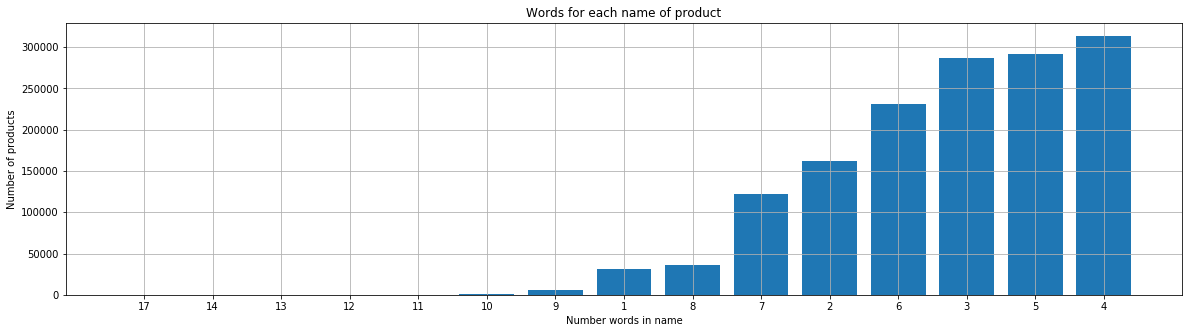

In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = data['name'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of products')
plt.xlabel('Number words in name')
plt.title('Words for each name of product')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()


### **Observation**
- The above plot is on name feature of data which shows the length of name and the number of product correspond to that length names 
- As it is expected that name of product should not be long that is should be shot and meaningfull as this plot also tells the same
- More than 3 million product have length of names equal to 4
-  Count of product with name length of 5 is greater than 2.5 million and less than 3 million
- Count of product with name length of 6 is greater than 2 million and less than 2.5 million
- From the above plote we can observe as length of names inceases the number of product decreases


In [ ]:
word_count

4     313585
5     291636
3     287424
6     231559
2     161912
7     121641
8      35970
1      31620
9       6385
10       722
11        67
12         7
13         5
17         1
14         1
Name: name, dtype: int64

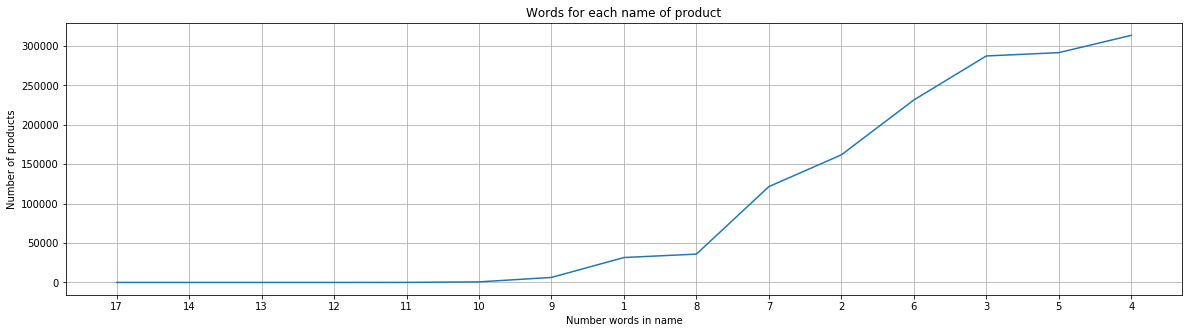

In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = data['name'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.plot(ind, list(word_dict.values()))
plt.ylabel('Number of products')
plt.xlabel('Number words in name')
plt.title('Words for each name of product')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()



### **OBSERVATION**
- Is clear as the length of product increase the curve steeps down which shows the name is short and precise.
- the longest length of name of product is 17 


# **Item_condition_id**

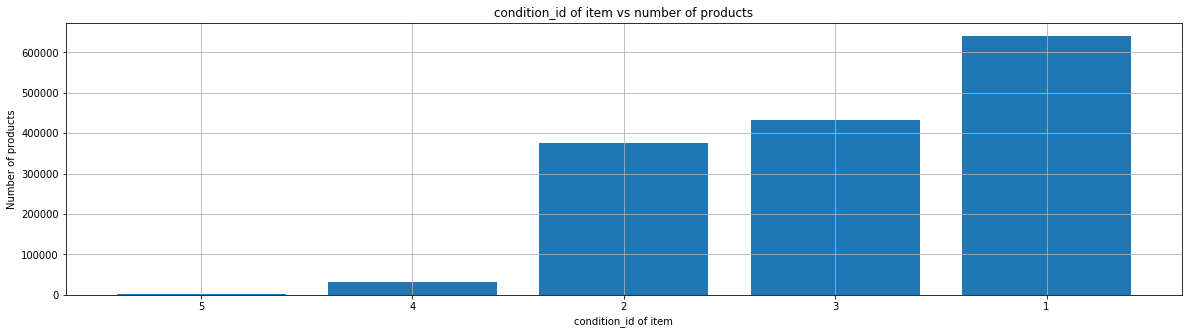

condition_id ,number of product
1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = data['item_condition_id'].value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of products')
plt.xlabel('condition_id of item')
plt.title('condition_id of item vs number of products')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()
print("condition_id ,number of product")
print(word_count)

### **Observation**
- So there are four categories 1,2,3,4 whchh describe the comdition of product 
- more than 6.5 million belongs to 1 in condition id
- Greater than 4 million and less than 5 million belong to 3 in condition id
- Around 4 million product belong to class 2 in condition id 
- We saw sudden drop in class 4 and 5 which is significant small

## **Category Name**

In [ ]:
data['category_name']

0                                          Men/Tops/T-shirts
1          Electronics/Computers & Tablets/Components & P...
2                                Women/Tops & Blouses/Blouse
3                         Home/Home Décor/Home Décor Accents
4                                    Women/Jewelry/Necklaces
                                 ...                        
1482530                               Women/Dresses/Mid-Calf
1482531                             Kids/Girls 2T-5T/Dresses
1482532       Sports & Outdoors/Exercise/Fitness accessories
1482533                   Home/Home Décor/Home Décor Accents
1482534                    Women/Women's Accessories/Wallets
Name: category_name, Length: 1482535, dtype: object

In [ ]:
#https://www.kaggle.com/marwanelghitany/mercari-with-eda
def split_categ(c):
        try:
            c1, c2, c3 = c.split("/")
            return c1, c2, c3
        except:
            return ("No label","No label","No label")
data['cat1'], data['cat2'], data['cat3']= zip(*data.category_name.apply(split_categ))


In [ ]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat1,cat2,cat3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


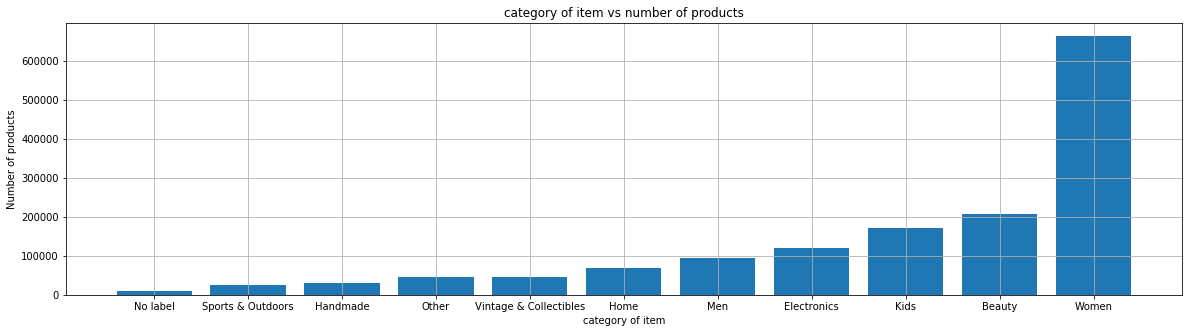

cate ,number of product
Women                     664385
Beauty                    207828
Kids                      171689
Electronics               119631
Men                        93363
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30840
Sports & Outdoors          24331
No label                   10716
Name: cat1, dtype: int64


In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = data['cat1'].value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of products')
plt.xlabel('category of item')
plt.title('category of item vs number of products')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()

print("cate ,number of product")
print(word_count)


### **Observation**
- The above plot is between categories and number of product belong to that categories
- It seems there are eleven broad categories
- the number of product belongs to category women is significantly higher than any other which is 664385
- the rest of categories along with the number of product under them are mentioned above.

### **Sub_category_level1**

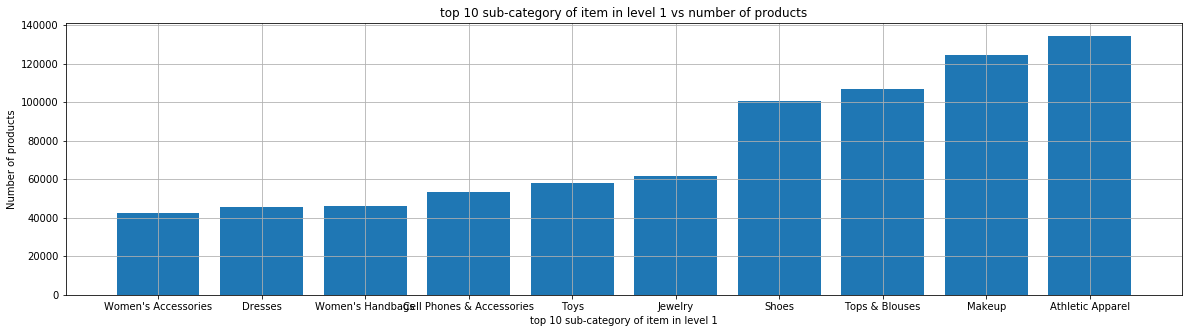

In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = data['cat2'].value_counts()[: 10]
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of products')
plt.xlabel('top 10 sub-category of item in level 1')
plt.title('top 10 sub-category of item in level 1 vs number of products')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()


In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = data['cat2'].value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
print("cate ,number of product")
print(word_count)

cate ,number of product
Athletic Apparel        134383
Makeup                  124624
Tops & Blouses          106960
Shoes                   100452
Jewelry                  61763
                         ...  
Candles                     64
Ceramics and Pottery        57
Dolls and Miniatures        49
Books and Zines             46
Quilts                      31
Name: cat2, Length: 114, dtype: int64


### **Observation**
- The plot if about between top 10 level 1 sub category and product count
- Just to make plot readable 10 most frequent occured sun_category is chosen
- The above curve seems to be unclear as their are 114 distinct elements or name available in this level of category 
- Athlete Apparel , Makeup, Tops and Blouses , Shoes the number are significantly higher than any of other .

### **Cate_ lavel 2**

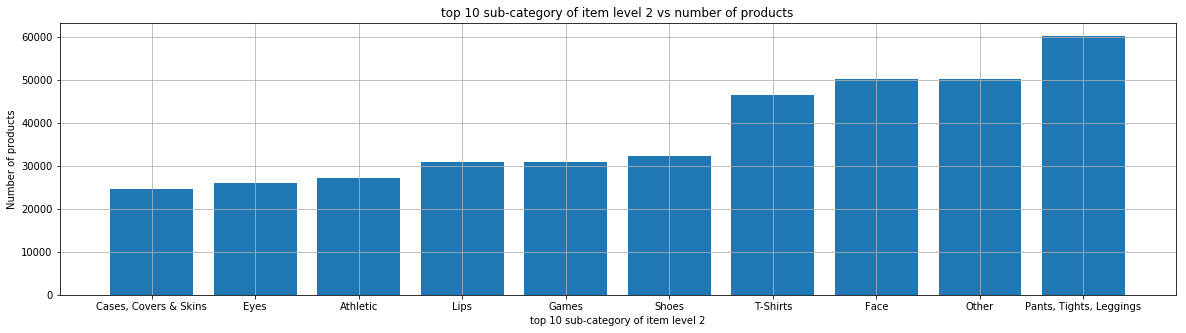

In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = data['cat3'].value_counts()[: 10]
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of products')
plt.xlabel('top 10 sub-category of item level 2')
plt.title('top 10 sub-category of item level 2 vs number of products')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()


In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = data['cat3'].value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))

print("cate ,number of product")
print(word_count)

cate ,number of product
Pants, Tights, Leggings    60177
Other                      50224
Face                       50171
T-Shirts                   46380
Shoes                      32168
                           ...  
Frames                         1
Nursery Furniture              1
Double Breasted                1
Child Friendly                 1
Pad                            1
Name: cat3, Length: 865, dtype: int64


### **Observation**
- The plot if about between top 10 level 2 sub category and product count
- The above curve seems to be unclear as their are 864 distinct elements or name available in this level of category so top 10 is choosen 
- We can observe that there is decrease in product count but decrease is not steep the statistics turnout to be quite close the lowest count are one and highest count is 60177 Pants, Tights, Leggings it is quite clear from above data 


##**Brand name**

In [ ]:
print("number of nan values in brand",data['brand_name'].isna().sum())
data['brand_name'].fillna('missing_name',inplace=True)

number of nan values in brand 632682


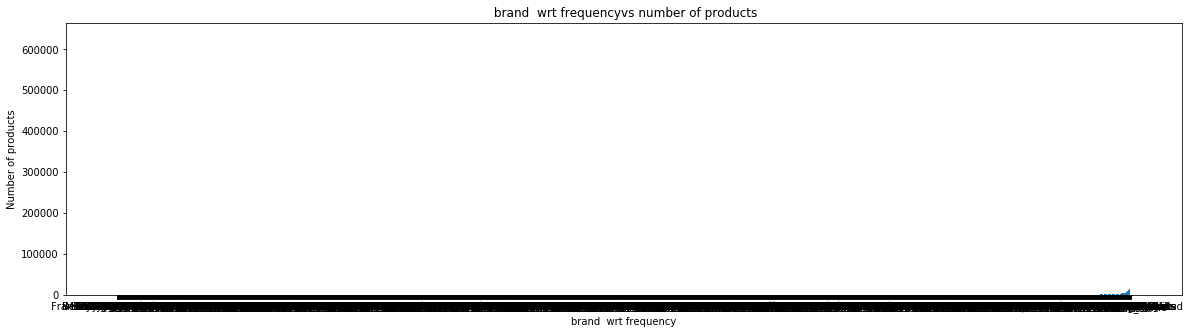

cate ,number of product
missing_name         632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
                      ...  
Point Zero                1
DecoLav                   1
Lipstick Bandit           1
Jil Sander                1
Jollychic.com             1
Name: brand_name, Length: 4810, dtype: int64


In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = data['brand_name'].value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of products')
plt.xlabel('brand  wrt frequency')
plt.title(' brand  wrt frequencyvs number of products')
plt.xticks(ind, list(word_dict.keys()))
plt.show()
print("cate ,number of product")
print(word_count)

### **Observation**
- The plot if about between brand top 10 wrt frequency and product count
- The above curve seems to be unclear as their are 4810 distinct elements or name available in this level of category 
- From the data above it is clear that their are 4810 unique bramnd names in this dataset including one as missing name


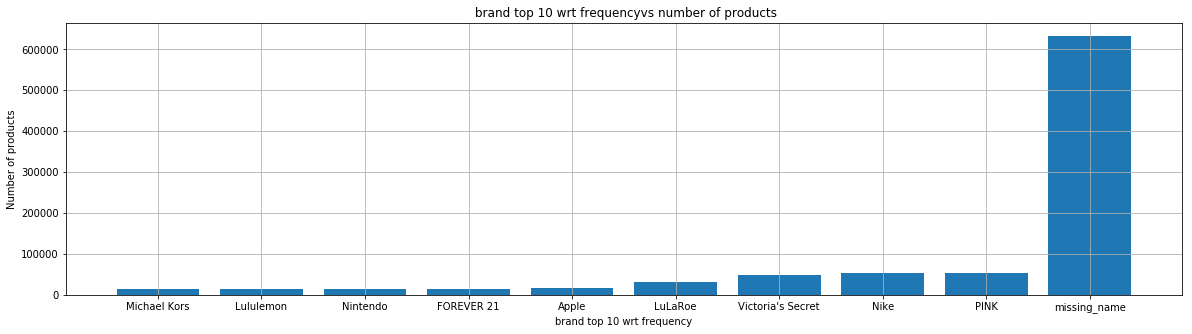

In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = data['brand_name'].value_counts()[:10]
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of products')
plt.xlabel('brand top 10 wrt frequency')
plt.title(' brand top 10 wrt frequencyvs number of products')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()


### **Observation**
- this is observation from above two plots
- The plot above is of about between top 10 brand   and product count

- From the data above it is clear that their are 4810 unique bramnd names in this dataset including one as missing name
- For the  analysis we chose to go through the top 10brands  and turned out that their is a very steep change in missing brand name and with brands pink brand products are highest in count after missing names but the difference is quite less 
- Also we have some brands which have only one product registered.

## **Shipping**

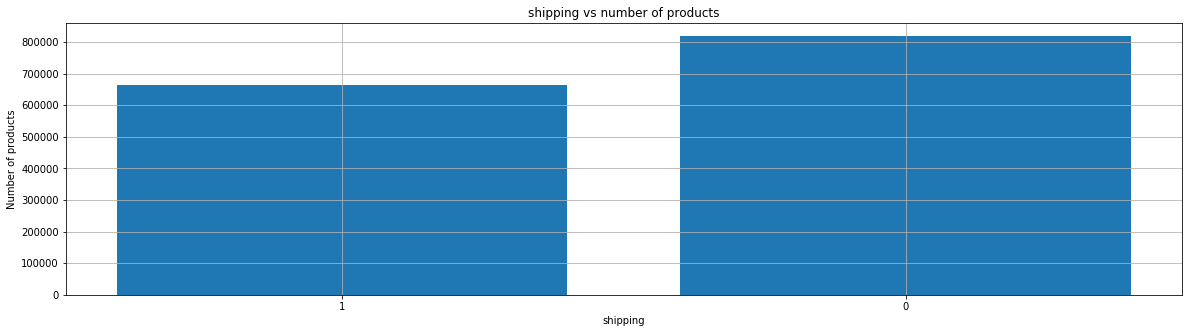

shipping ,number of product
0    819435
1    663100
Name: shipping, dtype: int64


In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = data['shipping'].value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of products')
plt.xlabel('shipping')
plt.title('shipping vs number of products')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()
print("shipping ,number of product")
print(word_count)

### **Observation**
- The above curve is between shipping and count of product
- number of product with shipped==0 is more than number of product shipped==1
- So this statictics might help to predict what price or range of price the shipped==0 or shipped ==1 in further analysis


## **Item Description**

In [ ]:
print("count of nan values",data['item_description'].isna().sum())
data['item_description'].fillna('missing_description',inplace=True)

count of nan values 4


In [ ]:
print("count of nan values",data['item_description'].isna().sum())

count of nan values 0


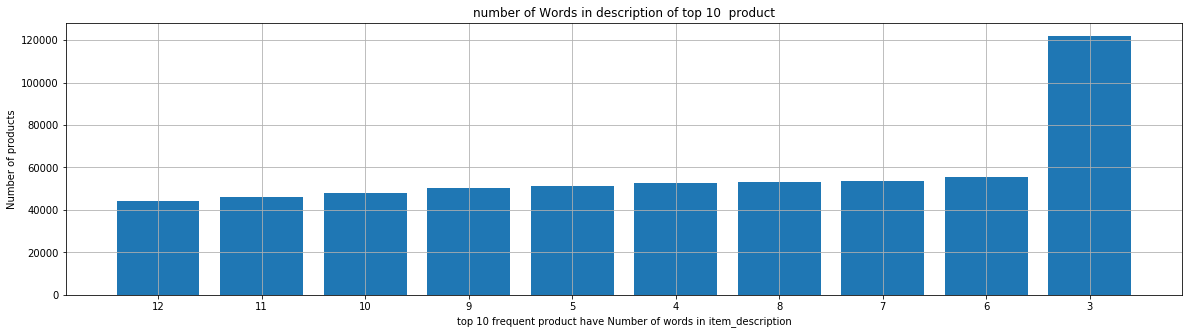

In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
## code used from aaic assignment donorchoose
word_count = data['item_description'].str.split().apply(len).value_counts()[:10]
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))
plt.ylabel('Number of products')
plt.xlabel('top 10 frequent product have Number of words in item_description')
plt.title('number of Words in description of top 10  product')
plt.xticks(ind, list(word_dict.keys()))
plt.grid();
plt.show()


In [ ]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
# code used from aaic assignment donorchoose
word_count = data['item_description'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))
print(word_count)

3      121909
6       55542
7       53822
8       53201
4       52640
        ...  
242         1
230         1
227         1
221         1
245         1
Name: item_description, Length: 228, dtype: int64


###**Observation**
- The above plot shows top 10 product with with word count  as to make plot tidy I considered only top 10 counts
- The range of length of description varies from 3 to 245 it is clear that the quantity of product with less words in description is more as comapre to more words in description
- There are 4 missing values in this columns 
In above only top 10 product count  is considered along with  their word count

## **Price**

In [ ]:
# price 0 or less
print("price less than zero ",(data["price"] < 0).sum())
print("price equal to zero ",(data["price"] == 0).sum())

price less than zero  0
price equal to zero  874


In [ ]:


# Filter all rows for which the player's 
# age is greater than or equal to 25 
data_new = data[data['price'] > 0] 

In [ ]:
# %age of data 
print("percentage of data remain=",(len(data_new)/len(data)) *100)

percentage of data remain= 99.94104692300688


In [ ]:
from math import log
k=[]
for i in data_new['price']:
  k.append(log(i))

In [ ]:
data_new['log']= k

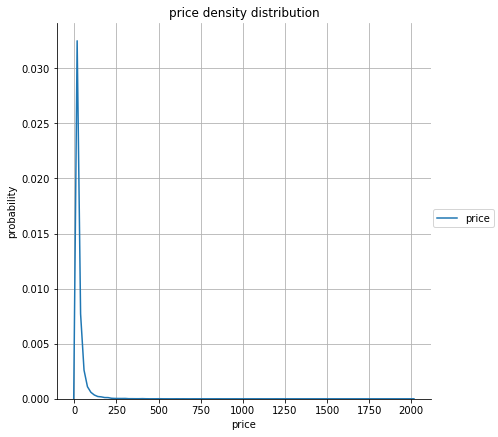

In [ ]:
sns.FacetGrid(data_new,size=6) \
    .map(sns.kdeplot,"price") \
    .add_legend();
plt.title('price density distribution')

plt.ylabel('probability')
plt.grid(); 

plt.show();

### **Observation**
- this is pdf of price
- lot of product range between 0 tp 250 according to above curve
- curve is steep with pointed tip not gaussian

[9.93147555e-01 5.58494824e-03 7.72106440e-04 2.65917777e-04
 1.18110688e-04 4.58944387e-05 2.96964015e-05 1.41732826e-05
 1.07986915e-05 1.07986915e-05]
[   3.   203.6  404.2  604.8  805.4 1006.  1206.6 1407.2 1607.8 1808.4
 2009. ]


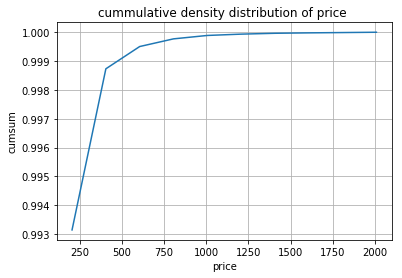

In [ ]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(data_new['price'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
#plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


plt.title('cummulative density distribution of price ')
plt.xlabel('price')
plt.ylabel('cumsum')
 
plt.grid();
plt.show();


### **Observation**
- we can observe in above cdf of price more than 99% of data price range 0 to 250 
- 0 to 1250 100% data product exist
- cdf tells how the range vary 0 to around 350 than the curvemove slow towards 1

## **Price with shipping_id**

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


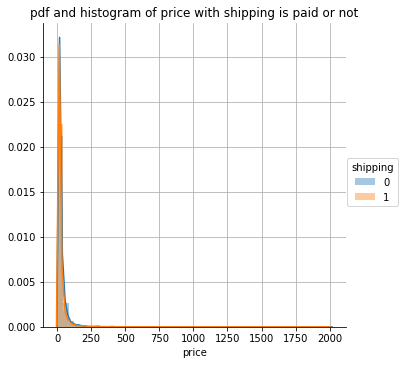

In [ ]:
# pdf and histogram of age
# code used from aaic assignment donorchoose
"""histogram=bar plot whose thickness show the interval it covers and height shows numb
er of elements
present in that interval"""
""" pdf=probablity density function which is formed by smoothening the histograph heigh
t tell the density"""
"""we use seaborn lib for ploting histogram and pdf and other plot"""
"""on feature age"""
sns.FacetGrid(data_new,hue="shipping",size=5)\
 .map(sns.distplot,"price",)\
 .add_legend();# to make graph more readable
plt.title('pdf and histogram of price with shipping is paid or not')
plt.grid();
plt.show();


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


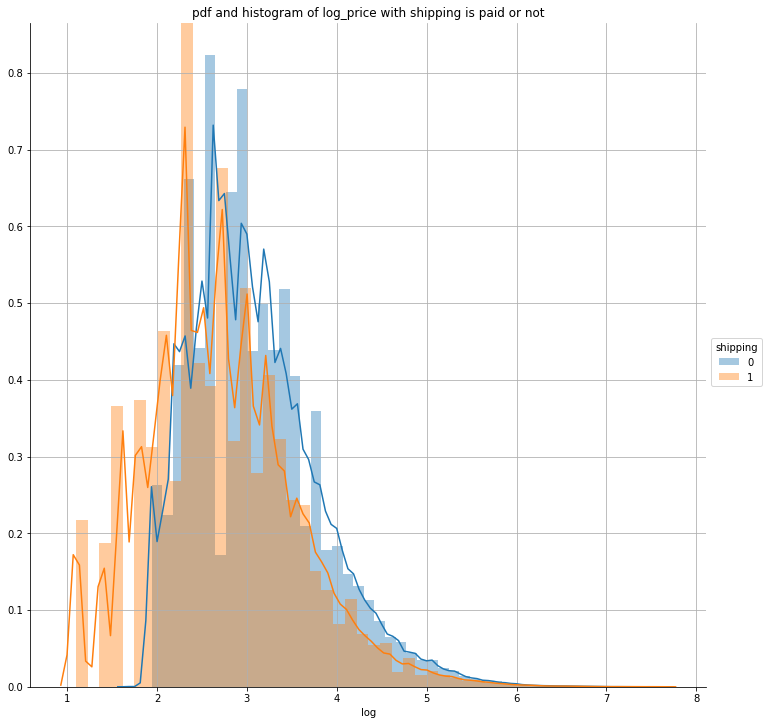

In [ ]:
# code used from aaic assignment donorchoose
'''log'''
sns.FacetGrid(data_new,hue="shipping",size=10) \
   .map(sns.distplot, "log") \
   .add_legend();
plt.title('pdf and histogram of log_price with shipping is paid or not')
plt.grid();
plt.show();

### **Observation**
- The above plot is pdf abd histogram of price with respect to shipping is paid or not
- Lot of overlapping can be observed between price range from 0 to 250 means is shipping may n ot alone able to prict the price this can be conclude from above curve.
- The log_price curve shows us clearly the amont of overlapping betwen shipping is paid or not 

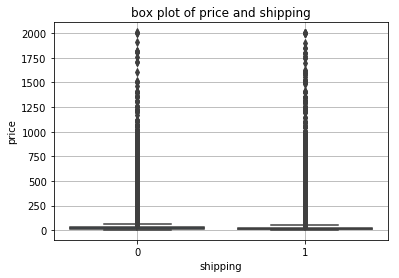

In [ ]:
#Box-plot can be visualized as a PDF on the side-ways.
# code used from aaic assignment donorchoose
sns.boxplot(x='shipping',y='price', data=data_new)
plt.title("box plot of price and shipping")
plt.grid();
plt.show()

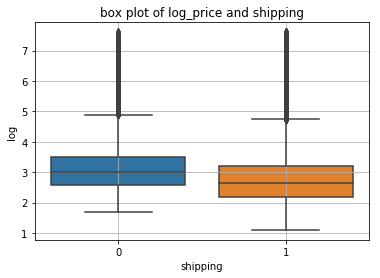

In [ ]:
#Box-plot can be visualized as a PDF on the side-ways.
# code used from aaic assignment donorchoose
sns.boxplot(x='shipping',y='log', data=data_new)
plt.title("box plot of log_price and shipping")
plt.grid();
plt.show()

### **Observation**
- This is boxplot between price and shipping
- The plot  tells us that both price categories are imseparable and very much overlapped 
- So above two experiments conclude price prediction doesnt matter whether shiping is paid or not
- the log_price boxplot with shipping is good enough to visualize the data and we can conclude that is feature alone is not usefull

## **Price with condition_id**

- 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

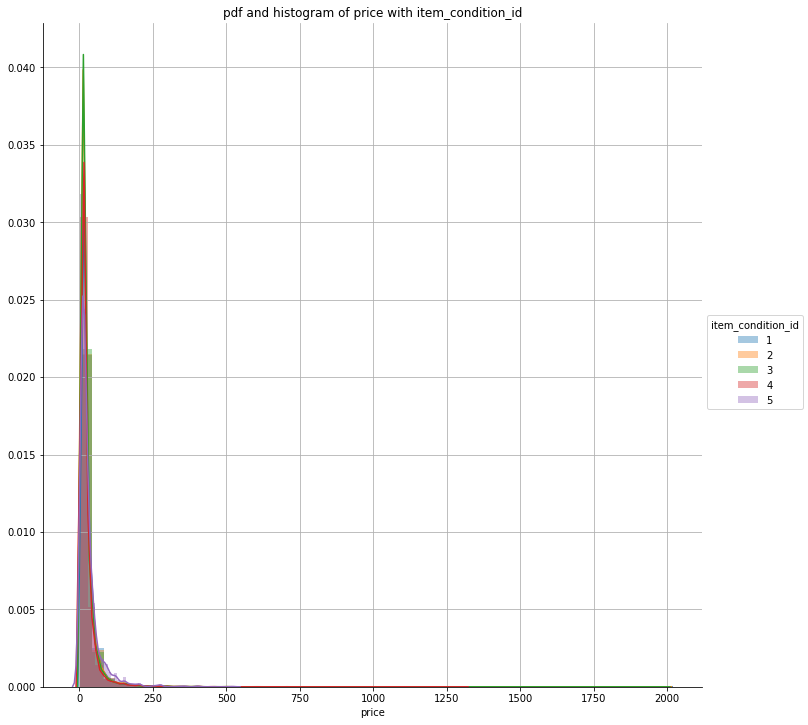

In [ ]:
# code used from aaic assignment donorchoose
sns.FacetGrid(data_new,hue="item_condition_id",size=10) \
   .map(sns.distplot, "price") \
   .add_legend();
plt.title('pdf and histogram of price with item_condition_id')
plt.grid();
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

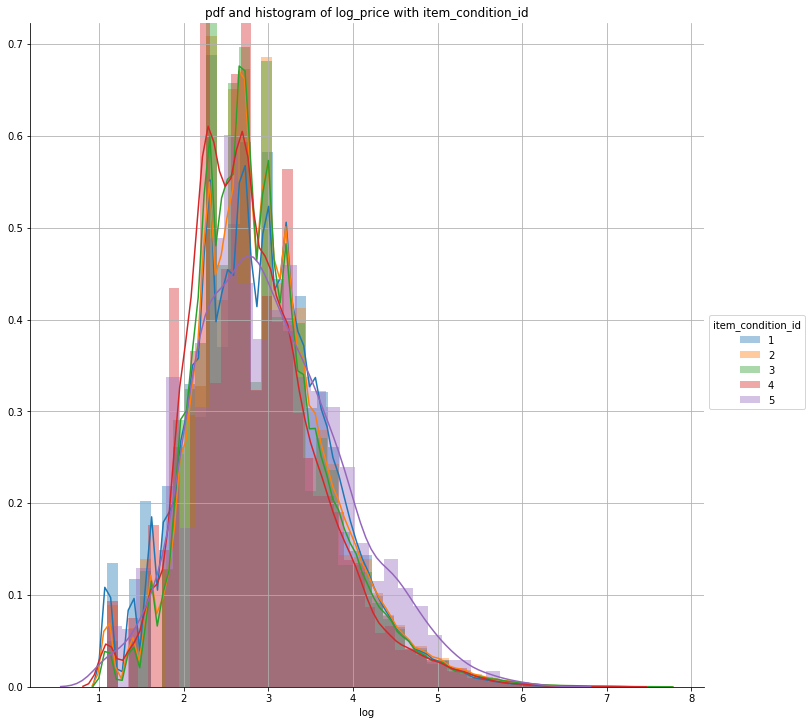

In [ ]:
# code used from aaic assignment donorchoose
sns.FacetGrid(data_new,hue="item_condition_id",size=10) \
   .map(sns.distplot, "log") \
   .add_legend();
plt.title('pdf and histogram of log_price with item_condition_id')
plt.grid();
plt.show();

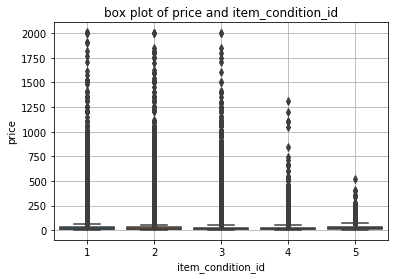

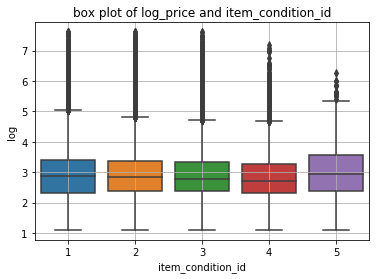

In [ ]:
#Box-plot can be visualized as a PDF on the side-ways.
# code used from aaic assignment donorchoose
sns.boxplot(x='item_condition_id',y='price', data=data_new)
plt.title("box plot of price and item_condition_id")
plt.grid();
plt.show()


#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='item_condition_id',y='log', data=data_new)
plt.title("box plot of log_price and item_condition_id")
plt.grid();
plt.show()

### **Observation**
- From above two plots it is confirmed that points are heavily overlapped 
- From the boxplot it can be visualize that price for condition_id =4 less than  1300 approximatly and for product with class 5 price is less than 750 
- This can be conclude from above boxplot and histogram and pdf are heavily overlapped
- the log_price is considered to visualize these observation more precisely 


## **Brand_name and price**


In [ ]:
#let us consider 0 as brand not present and one with brand present 
#so lets prepare points according to that observation

from tqdm import tqdm 
c=[]
for i in tqdm(data_new['brand_name']):
  if(i=='missing_name'):
    c.append(0)
  else:
    c.append(1)

100%|███████████████████████████████████████████████████████████████████| 1481661/1481661 [00:00<00:00, 1818667.70it/s]


In [ ]:
data_new['is_brand']=c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


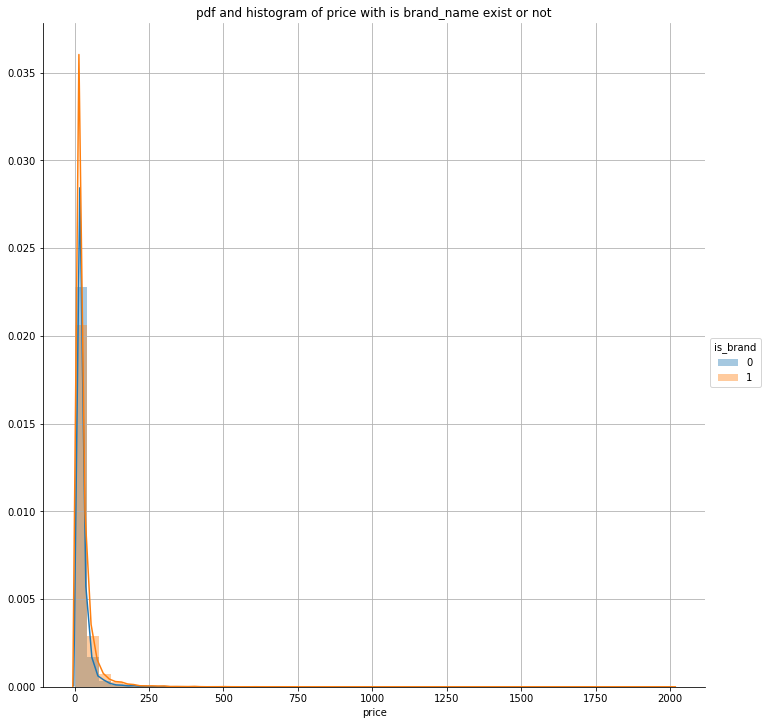

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


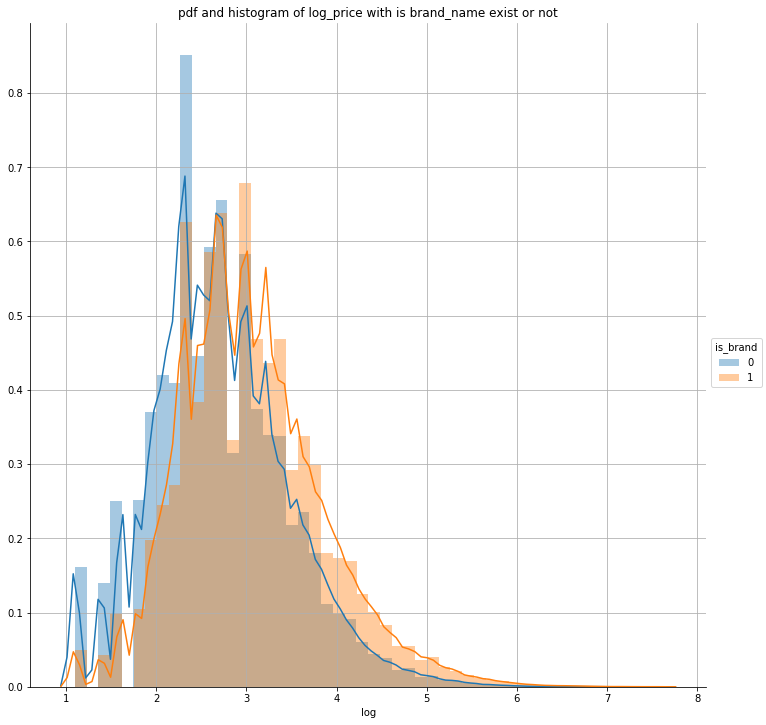

In [ ]:
# code used from aaic assignment donorchoose
sns.FacetGrid(data_new,hue="is_brand",size=10) \
   .map(sns.distplot, "price") \
   .add_legend();
plt.title('pdf and histogram of price with is brand_name exist or not')
plt.grid();
plt.show();

sns.FacetGrid(data_new,hue="is_brand",size=10) \
   .map(sns.distplot, "log") \
   .add_legend();
plt.title('pdf and histogram of log_price with is brand_name exist or not')
plt.grid();
plt.show();

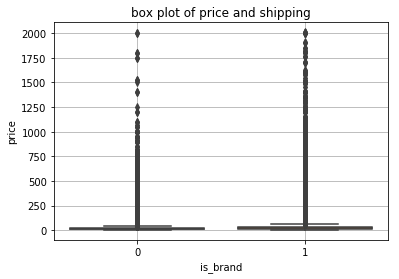

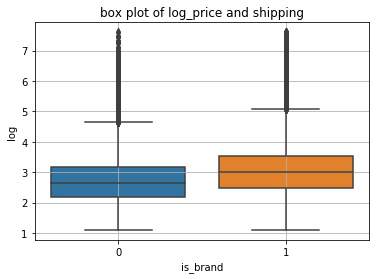

In [ ]:
#Box-plot can be visualized as a PDF on the side-ways.
# code used from aaic assignment donorchoose
sns.boxplot(x='is_brand',y='price', data=data_new)
plt.title("box plot of price and shipping")
plt.grid();
plt.show()

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='is_brand',y='log', data=data_new)
plt.title("box plot of log_price and shipping")
plt.grid();
plt.show()

### **Observation**
- Both experiemnt fails to predict the range of price for product with no brand name and with brand name
- As the data is highly overlapped so to distinguish product with no brand and with brand is highly difficult so this experiments also fail
- the log price curve also explains the same
- All above curve includes pdf box plot with and without log of price helps us to conclude this feature alone is not usefull

In [ ]:

data_new.drop(columns='is_brand',inplace=True)
#data_new.drop(columns='log',inplace=True)

In [ ]:
data_new.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'cat1', 'cat2', 'cat3', 'log'],
      dtype='object')

### **Conclusion**
- From above all analysis of data some of the conclusions are drawn 
- First is from considering one or two features the price cannot be predicted.
- The features like condition_id and a created features like is_brand cannot tell the product price 
- columns brand_name,categories,description consist of nan or missing values and are handled 
- Category name is a multilevel subcategorical features so preprocessing is done to break this hirarchy and then EDA was performed
- Most of price are in range (0,250]
- Plotting scatter plot was of no use as box plot and pdf shows the overlapping of data
- So it can be conclude to have simple model with if else condition cannot solve this problem and we need to take help from higher machine learning algorithms
- Next task is featurization or feature engineering

#**Featurization**

In [ ]:
Y=  np.log1p(data_new['price'])

#data_new.drop(columns='price',inplace=True)


In [ ]:
len(Y)

1481661

In [ ]:
data_new

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat1,cat2,cat3,log
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,missing_name,10.0,1,No description yet,Men,Tops,T-shirts,2.302585
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,3.951244
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,2.302585
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,missing_name,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,3.555348
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,missing_name,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,3.784190
...,...,...,...,...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl...",Women,Dresses,Mid-Calf,2.995732
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t,Kids,Girls 2T-5T,Dresses,2.639057
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,missing_name,12.0,0,"Used once or twice, still in great shape.",Sports & Outdoors,Exercise,Fitness accessories,2.484907
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,missing_name,45.0,1,There is 2 of each one that you see! So 2 red ...,Home,Home Décor,Home Décor Accents,3.806662


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_new, Y, test_size=0.33)


In [ ]:
print("train_data shape=",X_train.shape)

print("test_data shape=",X_test.shape)

train_data shape= (992712, 12)
test_data shape= (488949, 12)


In [ ]:
Y

0          2.397895
1          3.970292
2          2.397895
3          3.583519
4          3.806662
             ...   
1482530    3.044522
1482531    2.708050
1482532    2.564949
1482533    3.828641
1482534    3.135494
Name: price, Length: 1481661, dtype: float64

### **text_data**

In [ ]:
# loading weights for fasttext
model_fasttext = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False)
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
'''with open('drive/My Drive/glove_vectors', 'rb') as f:
    model_fasttext = pickle.load(f)
    glove_words =  set(model_fasttext.keys())'''

"with open('drive/My Drive/glove_vectors', 'rb') as f:\n    model_fasttext = pickle.load(f)\n    glove_words =  set(model_fasttext.keys())"

### **names**

In [ ]:
# code used from aaic assignment donorchoose
'''average word to vector train name using fasttext'''
avg_w2v_vectors_trainname = []; # the avg-w2v for each sentence/review is stored in this l
for sentence in tqdm(X_train['name']): # for each review/sentence
 vector = np.zeros(300) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sentence.split(): # for each word in a review/sentence
  if word in glove_words:
    vector += model_fasttext[word]
    cnt_words += 1
  if cnt_words != 0:
    vector /= cnt_words
 avg_w2v_vectors_trainname.append(vector)
print(len(avg_w2v_vectors_trainname))
print(len(avg_w2v_vectors_trainname[0]))


#test
'''average word to vector test_name '''
avg_w2v_vectors_testname = []; # the avg-w2v for each sentence/review is stored in this l
for sentence in tqdm(X_test['name']): # for each review/sentence
 vector = np.zeros(300) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sentence.split(): # for each word in a review/sentence
  if word in glove_words:
    vector += model_fasttext[word]
    cnt_words += 1
  if cnt_words != 0:
    vector /= cnt_words
 avg_w2v_vectors_testname.append(vector)
print(len(avg_w2v_vectors_testname))
print(len(avg_w2v_vectors_testname[0]))

  1%|          | 2839/488949 [00:00<00:17, 28383.12it/s]

992712
300


100%|██████████| 488949/488949 [00:18<00:00, 26048.51it/s]

488949
300


In [ ]:
# code used from aaic assignment donorchoose
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
'''names'''
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['name'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())
# compute average word2vec for each review.
'''tfidf_wrd2vect train names'''
tfidf_w2v_vectors_name_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['name']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in model_fasttext.vocab) and (word in tfidf_words):
            vec = model_fasttext[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_name_tr.append(vector)

print(len(tfidf_w2v_vectors_name_tr))
print(len(tfidf_w2v_vectors_name_tr[0]))








100%|███████████████████████████████████████████████████████████████████████| 992712/992712 [00:20<00:00, 48529.94it/s]

992712
300


In [ ]:
# average Word2Vec
## code used from aaic assignment donorchoose
# compute average word2vec for each review.
'''tfidf_word2vect on test names '''
tfidf_w2v_vectors_name_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['name']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in model_fasttext) and (word in tfidf_words):
            vec = model_fasttext[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_name_te.append(vector)

print(len(tfidf_w2v_vectors_name_te))
print(len(tfidf_w2v_vectors_name_te[0]))

100%|███████████████████████████████████████████████████████████████████████| 488949/488949 [00:10<00:00, 48586.15it/s]

488949
300


### **item_description**

In [ ]:
# code used from aaic assignment donorchoose
'''average word to vector item_description train '''
avg_w2v_vectors_traindescription = []; # the avg-w2v for each sentence/review is stored in this l
for sentence in tqdm(X_train['item_description']): # for each review/sentence
 vector = np.zeros(300) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sentence.split(): # for each word in a review/sentence
  if word in model_fasttext:
    vector += model_fasttext[word]
    cnt_words += 1
  if cnt_words != 0:
    vector /= cnt_words
 avg_w2v_vectors_traindescription.append(vector)
print(len(avg_w2v_vectors_traindescription))
print(len(avg_w2v_vectors_traindescription[0]))


#test
'''average word to vector item_description test '''
avg_w2v_vectors_testdescription = []; # the avg-w2v for each sentence/review is stored in this l
for sentence in tqdm(X_test['item_description']): # for each review/sentence
 vector = np.zeros(300) # as word vectors are of zero length
 cnt_words =0; # num of words with a valid vector in the sentence/review
 for word in sentence.split(): # for each word in a review/sentence
  if word in model_fasttext:
    vector += model_fasttext[word]
    cnt_words += 1
  if cnt_words != 0:
    vector /= cnt_words
 avg_w2v_vectors_testdescription.append(vector)
print(len(avg_w2v_vectors_testdescription))
print(len(avg_w2v_vectors_testdescription[0]))

 13%|█▎        | 132703/992712 [00:11<01:18, 10938.24it/s]

KeyboardInterrupt: ignored

In [ ]:
# code used from aaic assignment donorchoose
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
'''item_description'''
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['item_description'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [ ]:
# code used from aaic assignment donorchoose
# compute average word2vec for each review.
'''tfidf w2vect item_description train'''
tfidf_w2v_vectors_descr_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['item_description']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in model_fasttext.vocab) and (word in tfidf_words):
            vec = model_fasttext[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_descr_tr.append(vector)

print(len(tfidf_w2v_vectors_descr_tr))
print(len(tfidf_w2v_vectors_descr_tr[0]))




# average Word2Vec
# compute average word2vec for each review.
'''tfidf w2vect item_description test'''
tfidf_w2v_vectors_descr_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['item_description']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in model_fasttext.vocab) and (word in tfidf_words):
            vec = model_fasttext[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_descr_te.append(vector)

print(len(tfidf_w2v_vectors_descr_te))
print(len(tfidf_w2v_vectors_descr_te[0]))

  0%|                                                                           | 493/488949 [00:00<01:39, 4889.02it/s]

992712
300


100%|████████████████████████████████████████████████████████████████████████| 488949/488949 [01:48<00:00, 4507.82it/s]

488949
300


####**categorical and ordinal features**

In [ ]:
# item_condition ordinal


# transform for all
X_train_condition =(X_train['item_condition_id'].values.reshape(-1,1))
X_test_condition =(X_test['item_condition_id'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_condition.shape, y_train.shape)
print(X_test_condition.shape, y_test.shape)
print("="*100)

After vectorizations
(992712, 1) (992712,)
(488949, 1) (488949,)


In [ ]:
X_train.columns

Index(['train_id', 'name', 'item_condition_id', 'category_name', 'brand_name',
       'price', 'shipping', 'item_description', 'cat1', 'cat2', 'cat3', 'log'],
      dtype='object')

In [ ]:

'''encoding brand_name one hot'''
from collections import Counter
my_counter = Counter()
for word in X_train['brand_name'].values:
 my_counter.update(word.split(","))

brand_dict = dict(my_counter)
brand_dict = dict(sorted(brand_dict.items(), key=lambda kv: kv[1]))
enc2 = CountVectorizer(vocabulary=list(brand_dict.keys()), lowercase=False, binary=True)
enc2.fit(X_train['brand_name'].values) # fit has to happen only on trai
# we use the fitted CountVectorizer to convert the text to vector
X_train_brand = enc2.transform(X_train['brand_name'].values)
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np
X_test_brand = enc2.transform(X_test['brand_name'].values)
print("After vectorizations")
print(X_train_brand.shape, y_train.shape)
print(X_test_brand.shape, y_test.shape)

print("="*100)


After vectorizations
(992712, 4310) (992712,)
(488949, 4310) (488949,)


In [ ]:
'''encoding cat1 one hot'''
from collections import Counter
my_counter = Counter()
for word in X_train['cat1'].values:
 my_counter.update(word.split(","))

cat1_dict = dict(my_counter)
cat1_dict = dict(sorted(cat1_dict.items(), key=lambda kv: kv[1]))
enc3 = CountVectorizer(vocabulary=list(cat1_dict.keys()), lowercase=False, binary=True)
enc3.fit(X_train['cat1'].values) # fit has to happen only on trai
# we use the fitted CountVectorizer to convert the text to vector
X_train_cat1 = enc3.transform(X_train['cat1'].values)
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np
X_test_cat1 = enc3.transform(X_test['cat1'].values)
print("After vectorizations")
print(X_train_cat1.shape, y_train.shape)
print(X_test_cat1.shape, y_test.shape)

print("="*100)

After vectorizations
(992712, 11) (992712,)
(488949, 11) (488949,)


In [ ]:
'''encoding cat2 one hot'''
from collections import Counter
my_counter = Counter()
for word in X_train['cat2'].values:
 my_counter.update(word.split(","))

cat2_dict = dict(my_counter)
cat2_dict = dict(sorted(cat2_dict.items(), key=lambda kv: kv[1]))
enc4 = CountVectorizer(vocabulary=list(cat2_dict.keys()), lowercase=False, binary=True)
enc4.fit(X_train['cat2'].values) # fit has to happen only on trai
# we use the fitted CountVectorizer to convert the text to vector
X_train_cat2 = enc4.transform(X_train['cat2'].values)
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np
X_test_cat2 = enc4.transform(X_test['cat2'].values)
print("After vectorizations")
print(X_train_cat2.shape, y_train.shape)
print(X_test_cat2.shape, y_test.shape)

After vectorizations
(992712, 116) (992712,)
(488949, 116) (488949,)


In [ ]:
'''encoding cat3 one hot'''
from collections import Counter
my_counter = Counter()
for word in X_train['cat3'].values:
 my_counter.update(word.split(","))

cat3_dict = dict(my_counter)
cat3_dict = dict(sorted(cat3_dict.items(), key=lambda kv: kv[1]))
enc5 = CountVectorizer(vocabulary=list(cat3_dict.keys()), lowercase=False, binary=True)
enc5.fit(X_train['cat3'].values) # fit has to happen only on trai
# we use the fitted CountVectorizer to convert the text to vector
X_train_cat3 = enc5.transform(X_train['cat3'].values)
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np
X_test_cat3 = enc5.transform(X_test['cat3'].values)
print("After vectorizations")
print(X_train_cat3.shape, y_train.shape)
print(X_test_cat3.shape, y_test.shape)

After vectorizations
(992712, 872) (992712,)
(488949, 872) (488949,)


In [ ]:
Xtrain_shipping= X_train['shipping']
Xtrain_ship=np.array(Xtrain_shipping).reshape(-1,1)
Xtest_shipping=X_test['shipping']
Xtest_ship=np.array(Xtest_shipping).reshape(-1,1)

### **conclusion of featurization***
- text feature include name of product, item_description average word to vectors and tfidf word to vectors are performed using fasttext we going to use tfidf word to vector
- Categorical features are divided in to parts ordinal and nominal
- ordinal feature contain condition_id and encoded using nominalencoder
- nominal feature contain cat1,cat2,cat3,brand_name and encoded using one-hot-encoding
- shipping is considered as numerical feature so no feature engineering is required
- these all featurization are done and data matrix will be created by combining one of the feature from text  than ordinal,categorical, and numerical.


# **modelling**
## **knn**

In [ ]:
from scipy.sparse import hstack
X_tr = hstack((tfidf_w2v_vectors_name_tr, X_train_cat3, X_train_cat2, X_train_cat1, X_train_condition,X_train_brand,Xtrain_ship,tfidf_w2v_vectors_descr_tr)).tocsr()
#X_cr = hstack((tfidf_w2v_vectors_title_cv, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,tfidf_w2v_vectors_essay_cv,X_cv_subclean_cate_ohe,X_cv_clean_cate_ohe,X_cv_posted_norm)).tocsr()
X_te = hstack((tfidf_w2v_vectors_name_te, X_test_cat3, X_test_cat2, X_test_cat1, X_test_condition,X_test_brand,Xtest_ship,tfidf_w2v_vectors_descr_te)).tocsr()

In [ ]:
y_train

149786     2.079442
1138363    2.197225
240366     3.610918
1295005    3.433987
1357520    4.574711
             ...   
1130877    2.564949
433517     4.317488
758282     1.945910
533076     3.091042
638839     2.772589
Name: price, Length: 992712, dtype: float64

In [ ]:
type(X_te) 

scipy.sparse.csr.csr_matrix

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold

In [ ]:

model = CatBoostRegressor(task_type='GPU')

distributions = {'learning_rate': [10**-4,10**-2,10**-1],
        'depth': [4,8, 10],
        'l2_leaf_reg': [1, 3, 5]}

clf = RandomizedSearchCV(model, distributions, random_state=0,verbose=1)
search = clf.fit(X_tr, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.7381767	total: 22.7ms	remaining: 22.7s
1:	learn: 0.7310201	total: 49.1ms	remaining: 24.5s
2:	learn: 0.7252308	total: 72.9ms	remaining: 24.2s
3:	learn: 0.7201059	total: 97.8ms	remaining: 24.4s
4:	learn: 0.7162544	total: 122ms	remaining: 24.2s
5:	learn: 0.7127003	total: 147ms	remaining: 24.4s
6:	learn: 0.7099501	total: 170ms	remaining: 24.2s
7:	learn: 0.7071765	total: 194ms	remaining: 24.1s
8:	learn: 0.7042902	total: 218ms	remaining: 24s
9:	learn: 0.7015137	total: 241ms	remaining: 23.8s
10:	learn: 0.6998522	total: 260ms	remaining: 23.4s
11:	learn: 0.6979833	total: 286ms	remaining: 23.5s
12:	learn: 0.6965093	total: 308ms	remaining: 23.4s
13:	learn: 0.6951328	total: 329ms	remaining: 23.2s
14:	learn: 0.6939360	total: 349ms	remaining: 22.9s
15:	learn: 0.6918444	total: 372ms	remaining: 22.9s
16:	learn: 0.6907463	total: 392ms	remaining: 22.7s
17:	learn: 0.6893780	total: 416ms	remaining: 22.7s
18:	learn: 0.6879728	total: 4

168:	learn: 0.6351107	total: 3.55s	remaining: 17.4s
169:	learn: 0.6349597	total: 3.57s	remaining: 17.4s
170:	learn: 0.6347357	total: 3.59s	remaining: 17.4s
171:	learn: 0.6345998	total: 3.61s	remaining: 17.4s
172:	learn: 0.6344698	total: 3.63s	remaining: 17.4s
173:	learn: 0.6343442	total: 3.65s	remaining: 17.3s
174:	learn: 0.6342410	total: 3.67s	remaining: 17.3s
175:	learn: 0.6338451	total: 3.69s	remaining: 17.3s
176:	learn: 0.6337179	total: 3.71s	remaining: 17.3s
177:	learn: 0.6335520	total: 3.73s	remaining: 17.3s
178:	learn: 0.6333391	total: 3.75s	remaining: 17.2s
179:	learn: 0.6332370	total: 3.77s	remaining: 17.2s
180:	learn: 0.6331735	total: 3.79s	remaining: 17.2s
181:	learn: 0.6330785	total: 3.82s	remaining: 17.2s
182:	learn: 0.6329419	total: 3.84s	remaining: 17.1s
183:	learn: 0.6328424	total: 3.86s	remaining: 17.1s
184:	learn: 0.6327045	total: 3.88s	remaining: 17.1s
185:	learn: 0.6326130	total: 3.9s	remaining: 17.1s
186:	learn: 0.6325364	total: 3.92s	remaining: 17s
187:	learn: 0.6

327:	learn: 0.6195909	total: 6.84s	remaining: 14s
328:	learn: 0.6195239	total: 6.86s	remaining: 14s
329:	learn: 0.6195033	total: 6.88s	remaining: 14s
330:	learn: 0.6194600	total: 6.9s	remaining: 13.9s
331:	learn: 0.6193835	total: 6.92s	remaining: 13.9s
332:	learn: 0.6192999	total: 6.94s	remaining: 13.9s
333:	learn: 0.6191882	total: 6.96s	remaining: 13.9s
334:	learn: 0.6191480	total: 6.98s	remaining: 13.9s
335:	learn: 0.6191092	total: 7s	remaining: 13.8s
336:	learn: 0.6189570	total: 7.02s	remaining: 13.8s
337:	learn: 0.6189051	total: 7.04s	remaining: 13.8s
338:	learn: 0.6188424	total: 7.06s	remaining: 13.8s
339:	learn: 0.6187476	total: 7.08s	remaining: 13.7s
340:	learn: 0.6186808	total: 7.1s	remaining: 13.7s
341:	learn: 0.6186612	total: 7.12s	remaining: 13.7s
342:	learn: 0.6186041	total: 7.14s	remaining: 13.7s
343:	learn: 0.6184607	total: 7.16s	remaining: 13.7s
344:	learn: 0.6184206	total: 7.18s	remaining: 13.6s
345:	learn: 0.6182891	total: 7.2s	remaining: 13.6s
346:	learn: 0.6182352	to

487:	learn: 0.6119000	total: 9.97s	remaining: 10.5s
488:	learn: 0.6118599	total: 9.99s	remaining: 10.4s
489:	learn: 0.6117634	total: 10s	remaining: 10.4s
490:	learn: 0.6117392	total: 10s	remaining: 10.4s
491:	learn: 0.6117071	total: 10s	remaining: 10.4s
492:	learn: 0.6116828	total: 10.1s	remaining: 10.3s
493:	learn: 0.6116632	total: 10.1s	remaining: 10.3s
494:	learn: 0.6116434	total: 10.1s	remaining: 10.3s
495:	learn: 0.6116137	total: 10.1s	remaining: 10.3s
496:	learn: 0.6115529	total: 10.1s	remaining: 10.3s
497:	learn: 0.6115005	total: 10.2s	remaining: 10.2s
498:	learn: 0.6114829	total: 10.2s	remaining: 10.2s
499:	learn: 0.6114506	total: 10.2s	remaining: 10.2s
500:	learn: 0.6114288	total: 10.2s	remaining: 10.2s
501:	learn: 0.6114051	total: 10.2s	remaining: 10.1s
502:	learn: 0.6113640	total: 10.2s	remaining: 10.1s
503:	learn: 0.6113212	total: 10.3s	remaining: 10.1s
504:	learn: 0.6112972	total: 10.3s	remaining: 10.1s
505:	learn: 0.6112603	total: 10.3s	remaining: 10.1s
506:	learn: 0.6112

646:	learn: 0.6067670	total: 13.1s	remaining: 7.13s
647:	learn: 0.6067598	total: 13.1s	remaining: 7.11s
648:	learn: 0.6067534	total: 13.1s	remaining: 7.09s
649:	learn: 0.6067365	total: 13.1s	remaining: 7.07s
650:	learn: 0.6067138	total: 13.2s	remaining: 7.05s
651:	learn: 0.6067034	total: 13.2s	remaining: 7.03s
652:	learn: 0.6066974	total: 13.2s	remaining: 7.01s
653:	learn: 0.6066739	total: 13.2s	remaining: 6.99s
654:	learn: 0.6066627	total: 13.2s	remaining: 6.97s
655:	learn: 0.6066404	total: 13.2s	remaining: 6.95s
656:	learn: 0.6066116	total: 13.3s	remaining: 6.93s
657:	learn: 0.6065877	total: 13.3s	remaining: 6.91s
658:	learn: 0.6065809	total: 13.3s	remaining: 6.88s
659:	learn: 0.6065733	total: 13.3s	remaining: 6.86s
660:	learn: 0.6065636	total: 13.3s	remaining: 6.84s
661:	learn: 0.6065319	total: 13.4s	remaining: 6.82s
662:	learn: 0.6065238	total: 13.4s	remaining: 6.8s
663:	learn: 0.6065100	total: 13.4s	remaining: 6.78s
664:	learn: 0.6065026	total: 13.4s	remaining: 6.76s
665:	learn: 0

807:	learn: 0.6040017	total: 16.2s	remaining: 3.85s
808:	learn: 0.6039963	total: 16.2s	remaining: 3.83s
809:	learn: 0.6039785	total: 16.2s	remaining: 3.81s
810:	learn: 0.6039765	total: 16.3s	remaining: 3.79s
811:	learn: 0.6039566	total: 16.3s	remaining: 3.77s
812:	learn: 0.6039377	total: 16.3s	remaining: 3.75s
813:	learn: 0.6039233	total: 16.3s	remaining: 3.73s
814:	learn: 0.6039156	total: 16.3s	remaining: 3.71s
815:	learn: 0.6037945	total: 16.4s	remaining: 3.69s
816:	learn: 0.6037709	total: 16.4s	remaining: 3.67s
817:	learn: 0.6037635	total: 16.4s	remaining: 3.65s
818:	learn: 0.6037498	total: 16.4s	remaining: 3.63s
819:	learn: 0.6037347	total: 16.4s	remaining: 3.61s
820:	learn: 0.6037243	total: 16.5s	remaining: 3.59s
821:	learn: 0.6037034	total: 16.5s	remaining: 3.57s
822:	learn: 0.6036038	total: 16.5s	remaining: 3.55s
823:	learn: 0.6035974	total: 16.5s	remaining: 3.53s
824:	learn: 0.6035909	total: 16.5s	remaining: 3.51s
825:	learn: 0.6035788	total: 16.6s	remaining: 3.49s
826:	learn: 

970:	learn: 0.6026584	total: 19.5s	remaining: 583ms
971:	learn: 0.6026584	total: 19.5s	remaining: 563ms
972:	learn: 0.6026584	total: 19.5s	remaining: 542ms
973:	learn: 0.6026584	total: 19.6s	remaining: 522ms
974:	learn: 0.6026584	total: 19.6s	remaining: 502ms
975:	learn: 0.6026584	total: 19.6s	remaining: 482ms
976:	learn: 0.6026584	total: 19.6s	remaining: 462ms
977:	learn: 0.6026584	total: 19.6s	remaining: 442ms
978:	learn: 0.6026584	total: 19.7s	remaining: 422ms
979:	learn: 0.6026584	total: 19.7s	remaining: 402ms
980:	learn: 0.6026584	total: 19.7s	remaining: 382ms
981:	learn: 0.6026584	total: 19.7s	remaining: 362ms
982:	learn: 0.6026584	total: 19.7s	remaining: 341ms
983:	learn: 0.6026583	total: 19.8s	remaining: 321ms
984:	learn: 0.6026583	total: 19.8s	remaining: 301ms
985:	learn: 0.6026583	total: 19.8s	remaining: 281ms
986:	learn: 0.6026583	total: 19.8s	remaining: 261ms
987:	learn: 0.6026583	total: 19.8s	remaining: 241ms
988:	learn: 0.6026583	total: 19.9s	remaining: 221ms
989:	learn: 

136:	learn: 0.6411490	total: 2.98s	remaining: 18.7s
137:	learn: 0.6405732	total: 3s	remaining: 18.7s
138:	learn: 0.6404431	total: 3.02s	remaining: 18.7s
139:	learn: 0.6402937	total: 3.04s	remaining: 18.7s
140:	learn: 0.6401406	total: 3.06s	remaining: 18.6s
141:	learn: 0.6400656	total: 3.08s	remaining: 18.6s
142:	learn: 0.6397867	total: 3.1s	remaining: 18.6s
143:	learn: 0.6396902	total: 3.11s	remaining: 18.5s
144:	learn: 0.6396013	total: 3.13s	remaining: 18.5s
145:	learn: 0.6394822	total: 3.15s	remaining: 18.4s
146:	learn: 0.6392394	total: 3.17s	remaining: 18.4s
147:	learn: 0.6391119	total: 3.19s	remaining: 18.4s
148:	learn: 0.6389704	total: 3.21s	remaining: 18.4s
149:	learn: 0.6387875	total: 3.23s	remaining: 18.3s
150:	learn: 0.6386503	total: 3.25s	remaining: 18.3s
151:	learn: 0.6385406	total: 3.27s	remaining: 18.3s
152:	learn: 0.6382168	total: 3.29s	remaining: 18.2s
153:	learn: 0.6379915	total: 3.31s	remaining: 18.2s
154:	learn: 0.6379031	total: 3.33s	remaining: 18.2s
155:	learn: 0.63

296:	learn: 0.6218670	total: 6.33s	remaining: 15s
297:	learn: 0.6217443	total: 6.35s	remaining: 15s
298:	learn: 0.6217297	total: 6.37s	remaining: 14.9s
299:	learn: 0.6216960	total: 6.39s	remaining: 14.9s
300:	learn: 0.6216271	total: 6.41s	remaining: 14.9s
301:	learn: 0.6215726	total: 6.43s	remaining: 14.9s
302:	learn: 0.6213642	total: 6.45s	remaining: 14.8s
303:	learn: 0.6212941	total: 6.47s	remaining: 14.8s
304:	learn: 0.6211918	total: 6.49s	remaining: 14.8s
305:	learn: 0.6211504	total: 6.51s	remaining: 14.8s
306:	learn: 0.6211149	total: 6.53s	remaining: 14.7s
307:	learn: 0.6210318	total: 6.55s	remaining: 14.7s
308:	learn: 0.6209610	total: 6.57s	remaining: 14.7s
309:	learn: 0.6208925	total: 6.59s	remaining: 14.7s
310:	learn: 0.6208459	total: 6.61s	remaining: 14.7s
311:	learn: 0.6208200	total: 6.63s	remaining: 14.6s
312:	learn: 0.6207133	total: 6.65s	remaining: 14.6s
313:	learn: 0.6206514	total: 6.67s	remaining: 14.6s
314:	learn: 0.6205948	total: 6.7s	remaining: 14.6s
315:	learn: 0.620

464:	learn: 0.6134655	total: 9.87s	remaining: 11.4s
465:	learn: 0.6134261	total: 9.9s	remaining: 11.3s
466:	learn: 0.6133771	total: 9.92s	remaining: 11.3s
467:	learn: 0.6132969	total: 9.94s	remaining: 11.3s
468:	learn: 0.6132578	total: 9.96s	remaining: 11.3s
469:	learn: 0.6132117	total: 9.98s	remaining: 11.3s
470:	learn: 0.6131702	total: 10s	remaining: 11.2s
471:	learn: 0.6131338	total: 10s	remaining: 11.2s
472:	learn: 0.6131192	total: 10.1s	remaining: 11.2s
473:	learn: 0.6131069	total: 10.1s	remaining: 11.2s
474:	learn: 0.6130683	total: 10.1s	remaining: 11.2s
475:	learn: 0.6130229	total: 10.1s	remaining: 11.1s
476:	learn: 0.6129828	total: 10.1s	remaining: 11.1s
477:	learn: 0.6129245	total: 10.2s	remaining: 11.1s
478:	learn: 0.6128921	total: 10.2s	remaining: 11.1s
479:	learn: 0.6127739	total: 10.2s	remaining: 11s
480:	learn: 0.6127406	total: 10.2s	remaining: 11s
481:	learn: 0.6127328	total: 10.2s	remaining: 11s
482:	learn: 0.6127007	total: 10.3s	remaining: 11s
483:	learn: 0.6126895	tot

631:	learn: 0.6078994	total: 13.4s	remaining: 7.8s
632:	learn: 0.6078852	total: 13.4s	remaining: 7.78s
633:	learn: 0.6078669	total: 13.4s	remaining: 7.76s
634:	learn: 0.6078398	total: 13.5s	remaining: 7.74s
635:	learn: 0.6078247	total: 13.5s	remaining: 7.71s
636:	learn: 0.6078001	total: 13.5s	remaining: 7.69s
637:	learn: 0.6077871	total: 13.5s	remaining: 7.67s
638:	learn: 0.6077514	total: 13.5s	remaining: 7.65s
639:	learn: 0.6077093	total: 13.6s	remaining: 7.63s
640:	learn: 0.6076785	total: 13.6s	remaining: 7.61s
641:	learn: 0.6076673	total: 13.6s	remaining: 7.59s
642:	learn: 0.6076588	total: 13.6s	remaining: 7.57s
643:	learn: 0.6076496	total: 13.7s	remaining: 7.55s
644:	learn: 0.6076447	total: 13.7s	remaining: 7.53s
645:	learn: 0.6076352	total: 13.7s	remaining: 7.5s
646:	learn: 0.6076128	total: 13.7s	remaining: 7.48s
647:	learn: 0.6075872	total: 13.7s	remaining: 7.46s
648:	learn: 0.6075692	total: 13.8s	remaining: 7.44s
649:	learn: 0.6075670	total: 13.8s	remaining: 7.42s
650:	learn: 0.

795:	learn: 0.6055588	total: 17s	remaining: 4.37s
796:	learn: 0.6055588	total: 17.1s	remaining: 4.34s
797:	learn: 0.6055580	total: 17.1s	remaining: 4.32s
798:	learn: 0.6055579	total: 17.1s	remaining: 4.3s
799:	learn: 0.6055579	total: 17.1s	remaining: 4.28s
800:	learn: 0.6055578	total: 17.1s	remaining: 4.26s
801:	learn: 0.6055578	total: 17.2s	remaining: 4.24s
802:	learn: 0.6055578	total: 17.2s	remaining: 4.22s
803:	learn: 0.6055578	total: 17.2s	remaining: 4.2s
804:	learn: 0.6055578	total: 17.2s	remaining: 4.17s
805:	learn: 0.6055578	total: 17.3s	remaining: 4.15s
806:	learn: 0.6055578	total: 17.3s	remaining: 4.13s
807:	learn: 0.6055578	total: 17.3s	remaining: 4.11s
808:	learn: 0.6055577	total: 17.3s	remaining: 4.09s
809:	learn: 0.6055577	total: 17.3s	remaining: 4.07s
810:	learn: 0.6055577	total: 17.4s	remaining: 4.05s
811:	learn: 0.6055577	total: 17.4s	remaining: 4.03s
812:	learn: 0.6055577	total: 17.4s	remaining: 4s
813:	learn: 0.6055577	total: 17.4s	remaining: 3.98s
814:	learn: 0.60555

955:	learn: 0.6055577	total: 20.6s	remaining: 948ms
956:	learn: 0.6055577	total: 20.6s	remaining: 926ms
957:	learn: 0.6055577	total: 20.6s	remaining: 905ms
958:	learn: 0.6055577	total: 20.7s	remaining: 883ms
959:	learn: 0.6055577	total: 20.7s	remaining: 862ms
960:	learn: 0.6055577	total: 20.7s	remaining: 840ms
961:	learn: 0.6055577	total: 20.7s	remaining: 819ms
962:	learn: 0.6055577	total: 20.7s	remaining: 797ms
963:	learn: 0.6055577	total: 20.8s	remaining: 776ms
964:	learn: 0.6055577	total: 20.8s	remaining: 754ms
965:	learn: 0.6055577	total: 20.8s	remaining: 733ms
966:	learn: 0.6055577	total: 20.8s	remaining: 711ms
967:	learn: 0.6055577	total: 20.9s	remaining: 690ms
968:	learn: 0.6055577	total: 20.9s	remaining: 668ms
969:	learn: 0.6055577	total: 20.9s	remaining: 646ms
970:	learn: 0.6055577	total: 20.9s	remaining: 625ms
971:	learn: 0.6055577	total: 20.9s	remaining: 603ms
972:	learn: 0.6055577	total: 21s	remaining: 582ms
973:	learn: 0.6055577	total: 21s	remaining: 560ms
974:	learn: 0.60

116:	learn: 0.6436807	total: 2.56s	remaining: 19.3s
117:	learn: 0.6435137	total: 2.58s	remaining: 19.3s
118:	learn: 0.6433154	total: 2.6s	remaining: 19.3s
119:	learn: 0.6431392	total: 2.62s	remaining: 19.2s
120:	learn: 0.6429938	total: 2.64s	remaining: 19.2s
121:	learn: 0.6428217	total: 2.66s	remaining: 19.2s
122:	learn: 0.6426890	total: 2.68s	remaining: 19.1s
123:	learn: 0.6423678	total: 2.7s	remaining: 19.1s
124:	learn: 0.6421664	total: 2.72s	remaining: 19.1s
125:	learn: 0.6418436	total: 2.74s	remaining: 19s
126:	learn: 0.6417206	total: 2.76s	remaining: 19s
127:	learn: 0.6412822	total: 2.78s	remaining: 19s
128:	learn: 0.6411203	total: 2.81s	remaining: 19s
129:	learn: 0.6407843	total: 2.83s	remaining: 18.9s
130:	learn: 0.6404654	total: 2.85s	remaining: 18.9s
131:	learn: 0.6402656	total: 2.87s	remaining: 18.9s
132:	learn: 0.6401084	total: 2.9s	remaining: 18.9s
133:	learn: 0.6399214	total: 2.92s	remaining: 18.9s
134:	learn: 0.6397928	total: 2.94s	remaining: 18.9s
135:	learn: 0.6396286	t

284:	learn: 0.6222653	total: 6.14s	remaining: 15.4s
285:	learn: 0.6221801	total: 6.16s	remaining: 15.4s
286:	learn: 0.6220994	total: 6.18s	remaining: 15.4s
287:	learn: 0.6220456	total: 6.2s	remaining: 15.3s
288:	learn: 0.6219990	total: 6.22s	remaining: 15.3s
289:	learn: 0.6219112	total: 6.25s	remaining: 15.3s
290:	learn: 0.6218594	total: 6.27s	remaining: 15.3s
291:	learn: 0.6218415	total: 6.29s	remaining: 15.2s
292:	learn: 0.6218012	total: 6.31s	remaining: 15.2s
293:	learn: 0.6216861	total: 6.33s	remaining: 15.2s
294:	learn: 0.6216380	total: 6.35s	remaining: 15.2s
295:	learn: 0.6215272	total: 6.37s	remaining: 15.2s
296:	learn: 0.6214433	total: 6.39s	remaining: 15.1s
297:	learn: 0.6214004	total: 6.41s	remaining: 15.1s
298:	learn: 0.6213311	total: 6.43s	remaining: 15.1s
299:	learn: 0.6212518	total: 6.46s	remaining: 15.1s
300:	learn: 0.6212167	total: 6.48s	remaining: 15s
301:	learn: 0.6211936	total: 6.5s	remaining: 15s
302:	learn: 0.6211383	total: 6.52s	remaining: 15s
303:	learn: 0.621073

448:	learn: 0.6132006	total: 9.46s	remaining: 11.6s
449:	learn: 0.6131256	total: 9.48s	remaining: 11.6s
450:	learn: 0.6130143	total: 9.5s	remaining: 11.6s
451:	learn: 0.6129783	total: 9.52s	remaining: 11.5s
452:	learn: 0.6129701	total: 9.54s	remaining: 11.5s
453:	learn: 0.6129063	total: 9.57s	remaining: 11.5s
454:	learn: 0.6128611	total: 9.59s	remaining: 11.5s
455:	learn: 0.6128453	total: 9.61s	remaining: 11.5s
456:	learn: 0.6128355	total: 9.63s	remaining: 11.4s
457:	learn: 0.6128084	total: 9.65s	remaining: 11.4s
458:	learn: 0.6128041	total: 9.67s	remaining: 11.4s
459:	learn: 0.6127657	total: 9.69s	remaining: 11.4s
460:	learn: 0.6127415	total: 9.71s	remaining: 11.3s
461:	learn: 0.6125816	total: 9.72s	remaining: 11.3s
462:	learn: 0.6125608	total: 9.74s	remaining: 11.3s
463:	learn: 0.6125268	total: 9.76s	remaining: 11.3s
464:	learn: 0.6125011	total: 9.78s	remaining: 11.3s
465:	learn: 0.6124651	total: 9.8s	remaining: 11.2s
466:	learn: 0.6124194	total: 9.82s	remaining: 11.2s
467:	learn: 0.

608:	learn: 0.6089580	total: 12.8s	remaining: 8.22s
609:	learn: 0.6089217	total: 12.8s	remaining: 8.2s
610:	learn: 0.6089004	total: 12.8s	remaining: 8.18s
611:	learn: 0.6088139	total: 12.9s	remaining: 8.16s
612:	learn: 0.6087847	total: 12.9s	remaining: 8.14s
613:	learn: 0.6087560	total: 12.9s	remaining: 8.12s
614:	learn: 0.6087557	total: 12.9s	remaining: 8.1s
615:	learn: 0.6087457	total: 13s	remaining: 8.07s
616:	learn: 0.6087148	total: 13s	remaining: 8.05s
617:	learn: 0.6086872	total: 13s	remaining: 8.03s
618:	learn: 0.6086512	total: 13s	remaining: 8.01s
619:	learn: 0.6086452	total: 13s	remaining: 7.99s
620:	learn: 0.6086193	total: 13.1s	remaining: 7.97s
621:	learn: 0.6086136	total: 13.1s	remaining: 7.95s
622:	learn: 0.6086116	total: 13.1s	remaining: 7.92s
623:	learn: 0.6086004	total: 13.1s	remaining: 7.9s
624:	learn: 0.6085989	total: 13.1s	remaining: 7.88s
625:	learn: 0.6085925	total: 13.2s	remaining: 7.86s
626:	learn: 0.6085799	total: 13.2s	remaining: 7.84s
627:	learn: 0.6085589	tot

771:	learn: 0.6071710	total: 16.4s	remaining: 4.83s
772:	learn: 0.6071710	total: 16.4s	remaining: 4.81s
773:	learn: 0.6071710	total: 16.4s	remaining: 4.79s
774:	learn: 0.6071710	total: 16.4s	remaining: 4.77s
775:	learn: 0.6071710	total: 16.4s	remaining: 4.75s
776:	learn: 0.6071710	total: 16.5s	remaining: 4.72s
777:	learn: 0.6071710	total: 16.5s	remaining: 4.7s
778:	learn: 0.6071710	total: 16.5s	remaining: 4.68s
779:	learn: 0.6071710	total: 16.5s	remaining: 4.66s
780:	learn: 0.6071710	total: 16.6s	remaining: 4.64s
781:	learn: 0.6071710	total: 16.6s	remaining: 4.62s
782:	learn: 0.6071710	total: 16.6s	remaining: 4.6s
783:	learn: 0.6071710	total: 16.6s	remaining: 4.58s
784:	learn: 0.6071710	total: 16.6s	remaining: 4.56s
785:	learn: 0.6071710	total: 16.7s	remaining: 4.54s
786:	learn: 0.6071710	total: 16.7s	remaining: 4.52s
787:	learn: 0.6071710	total: 16.7s	remaining: 4.5s
788:	learn: 0.6071710	total: 16.7s	remaining: 4.48s
789:	learn: 0.6071710	total: 16.8s	remaining: 4.46s
790:	learn: 0.6

933:	learn: 0.6071710	total: 20s	remaining: 1.41s
934:	learn: 0.6071710	total: 20s	remaining: 1.39s
935:	learn: 0.6071710	total: 20s	remaining: 1.37s
936:	learn: 0.6071710	total: 20s	remaining: 1.35s
937:	learn: 0.6071710	total: 20.1s	remaining: 1.32s
938:	learn: 0.6071710	total: 20.1s	remaining: 1.3s
939:	learn: 0.6071710	total: 20.1s	remaining: 1.28s
940:	learn: 0.6071710	total: 20.1s	remaining: 1.26s
941:	learn: 0.6071710	total: 20.1s	remaining: 1.24s
942:	learn: 0.6071710	total: 20.2s	remaining: 1.22s
943:	learn: 0.6071710	total: 20.2s	remaining: 1.2s
944:	learn: 0.6071710	total: 20.2s	remaining: 1.18s
945:	learn: 0.6071710	total: 20.2s	remaining: 1.15s
946:	learn: 0.6071710	total: 20.3s	remaining: 1.13s
947:	learn: 0.6071710	total: 20.3s	remaining: 1.11s
948:	learn: 0.6071710	total: 20.3s	remaining: 1.09s
949:	learn: 0.6071710	total: 20.3s	remaining: 1.07s
950:	learn: 0.6071710	total: 20.3s	remaining: 1.05s
951:	learn: 0.6071710	total: 20.4s	remaining: 1.03s
952:	learn: 0.6071710	

94:	learn: 0.7459268	total: 12.5s	remaining: 1m 58s
95:	learn: 0.7459139	total: 12.6s	remaining: 1m 58s
96:	learn: 0.7459005	total: 12.7s	remaining: 1m 58s
97:	learn: 0.7458871	total: 12.9s	remaining: 1m 58s
98:	learn: 0.7458734	total: 13s	remaining: 1m 58s
99:	learn: 0.7458604	total: 13.1s	remaining: 1m 58s
100:	learn: 0.7458469	total: 13.3s	remaining: 1m 58s
101:	learn: 0.7458343	total: 13.4s	remaining: 1m 57s
102:	learn: 0.7458212	total: 13.5s	remaining: 1m 57s
103:	learn: 0.7458075	total: 13.7s	remaining: 1m 57s
104:	learn: 0.7457937	total: 13.8s	remaining: 1m 57s
105:	learn: 0.7457803	total: 13.9s	remaining: 1m 57s
106:	learn: 0.7457670	total: 14.1s	remaining: 1m 57s
107:	learn: 0.7457539	total: 14.2s	remaining: 1m 57s
108:	learn: 0.7457408	total: 14.3s	remaining: 1m 57s
109:	learn: 0.7457268	total: 14.5s	remaining: 1m 57s
110:	learn: 0.7457137	total: 14.6s	remaining: 1m 57s
111:	learn: 0.7457006	total: 14.7s	remaining: 1m 56s
112:	learn: 0.7456874	total: 14.9s	remaining: 1m 56s
1

250:	learn: 0.7438661	total: 32.9s	remaining: 1m 38s
251:	learn: 0.7438535	total: 33s	remaining: 1m 37s
252:	learn: 0.7438404	total: 33.1s	remaining: 1m 37s
253:	learn: 0.7438278	total: 33.2s	remaining: 1m 37s
254:	learn: 0.7438158	total: 33.4s	remaining: 1m 37s
255:	learn: 0.7438033	total: 33.5s	remaining: 1m 37s
256:	learn: 0.7437902	total: 33.6s	remaining: 1m 37s
257:	learn: 0.7437777	total: 33.8s	remaining: 1m 37s
258:	learn: 0.7437645	total: 33.9s	remaining: 1m 36s
259:	learn: 0.7437513	total: 34s	remaining: 1m 36s
260:	learn: 0.7437378	total: 34.2s	remaining: 1m 36s
261:	learn: 0.7437246	total: 34.3s	remaining: 1m 36s
262:	learn: 0.7437129	total: 34.4s	remaining: 1m 36s
263:	learn: 0.7436999	total: 34.6s	remaining: 1m 36s
264:	learn: 0.7436870	total: 34.7s	remaining: 1m 36s
265:	learn: 0.7436742	total: 34.8s	remaining: 1m 36s
266:	learn: 0.7436613	total: 35s	remaining: 1m 35s
267:	learn: 0.7436479	total: 35.1s	remaining: 1m 35s
268:	learn: 0.7436355	total: 35.2s	remaining: 1m 35s

406:	learn: 0.7418759	total: 53.4s	remaining: 1m 17s
407:	learn: 0.7418631	total: 53.5s	remaining: 1m 17s
408:	learn: 0.7418507	total: 53.7s	remaining: 1m 17s
409:	learn: 0.7418380	total: 53.8s	remaining: 1m 17s
410:	learn: 0.7418255	total: 53.9s	remaining: 1m 17s
411:	learn: 0.7418134	total: 54.1s	remaining: 1m 17s
412:	learn: 0.7418004	total: 54.2s	remaining: 1m 17s
413:	learn: 0.7417873	total: 54.3s	remaining: 1m 16s
414:	learn: 0.7417743	total: 54.5s	remaining: 1m 16s
415:	learn: 0.7417617	total: 54.6s	remaining: 1m 16s
416:	learn: 0.7417487	total: 54.7s	remaining: 1m 16s
417:	learn: 0.7417364	total: 54.9s	remaining: 1m 16s
418:	learn: 0.7417235	total: 55s	remaining: 1m 16s
419:	learn: 0.7417104	total: 55.1s	remaining: 1m 16s
420:	learn: 0.7416978	total: 55.3s	remaining: 1m 15s
421:	learn: 0.7416860	total: 55.4s	remaining: 1m 15s
422:	learn: 0.7416732	total: 55.5s	remaining: 1m 15s
423:	learn: 0.7416607	total: 55.7s	remaining: 1m 15s
424:	learn: 0.7416480	total: 55.8s	remaining: 1m

564:	learn: 0.7398822	total: 1m 14s	remaining: 57s
565:	learn: 0.7398697	total: 1m 14s	remaining: 56.9s
566:	learn: 0.7398571	total: 1m 14s	remaining: 56.8s
567:	learn: 0.7398447	total: 1m 14s	remaining: 56.6s
568:	learn: 0.7398319	total: 1m 14s	remaining: 56.5s
569:	learn: 0.7398206	total: 1m 14s	remaining: 56.4s
570:	learn: 0.7398081	total: 1m 14s	remaining: 56.2s
571:	learn: 0.7397962	total: 1m 14s	remaining: 56.1s
572:	learn: 0.7397839	total: 1m 15s	remaining: 56s
573:	learn: 0.7397717	total: 1m 15s	remaining: 55.9s
574:	learn: 0.7397596	total: 1m 15s	remaining: 55.7s
575:	learn: 0.7397470	total: 1m 15s	remaining: 55.6s
576:	learn: 0.7397341	total: 1m 15s	remaining: 55.5s
577:	learn: 0.7397216	total: 1m 15s	remaining: 55.3s
578:	learn: 0.7397095	total: 1m 15s	remaining: 55.2s
579:	learn: 0.7396961	total: 1m 16s	remaining: 55.1s
580:	learn: 0.7396837	total: 1m 16s	remaining: 55s
581:	learn: 0.7396709	total: 1m 16s	remaining: 54.8s
582:	learn: 0.7396594	total: 1m 16s	remaining: 54.7s

720:	learn: 0.7379774	total: 1m 34s	remaining: 36.6s
721:	learn: 0.7379649	total: 1m 34s	remaining: 36.5s
722:	learn: 0.7379529	total: 1m 34s	remaining: 36.3s
723:	learn: 0.7379413	total: 1m 34s	remaining: 36.2s
724:	learn: 0.7379298	total: 1m 35s	remaining: 36.1s
725:	learn: 0.7379179	total: 1m 35s	remaining: 35.9s
726:	learn: 0.7379067	total: 1m 35s	remaining: 35.8s
727:	learn: 0.7378944	total: 1m 35s	remaining: 35.7s
728:	learn: 0.7378818	total: 1m 35s	remaining: 35.5s
729:	learn: 0.7378701	total: 1m 35s	remaining: 35.4s
730:	learn: 0.7378576	total: 1m 35s	remaining: 35.3s
731:	learn: 0.7378452	total: 1m 35s	remaining: 35.1s
732:	learn: 0.7378327	total: 1m 36s	remaining: 35s
733:	learn: 0.7378211	total: 1m 36s	remaining: 34.9s
734:	learn: 0.7378087	total: 1m 36s	remaining: 34.7s
735:	learn: 0.7377964	total: 1m 36s	remaining: 34.6s
736:	learn: 0.7377849	total: 1m 36s	remaining: 34.5s
737:	learn: 0.7377729	total: 1m 36s	remaining: 34.4s
738:	learn: 0.7377610	total: 1m 36s	remaining: 3

876:	learn: 0.7361179	total: 1m 54s	remaining: 16.1s
877:	learn: 0.7361060	total: 1m 55s	remaining: 16s
878:	learn: 0.7360949	total: 1m 55s	remaining: 15.9s
879:	learn: 0.7360836	total: 1m 55s	remaining: 15.7s
880:	learn: 0.7360720	total: 1m 55s	remaining: 15.6s
881:	learn: 0.7360609	total: 1m 55s	remaining: 15.5s
882:	learn: 0.7360490	total: 1m 55s	remaining: 15.3s
883:	learn: 0.7360365	total: 1m 55s	remaining: 15.2s
884:	learn: 0.7360255	total: 1m 55s	remaining: 15.1s
885:	learn: 0.7360145	total: 1m 56s	remaining: 14.9s
886:	learn: 0.7360027	total: 1m 56s	remaining: 14.8s
887:	learn: 0.7359909	total: 1m 56s	remaining: 14.7s
888:	learn: 0.7359789	total: 1m 56s	remaining: 14.5s
889:	learn: 0.7359673	total: 1m 56s	remaining: 14.4s
890:	learn: 0.7359553	total: 1m 56s	remaining: 14.3s
891:	learn: 0.7359445	total: 1m 56s	remaining: 14.1s
892:	learn: 0.7359326	total: 1m 56s	remaining: 14s
893:	learn: 0.7359215	total: 1m 57s	remaining: 13.9s
894:	learn: 0.7359098	total: 1m 57s	remaining: 13.

36:	learn: 0.7448482	total: 4.81s	remaining: 2m 5s
37:	learn: 0.7448350	total: 4.93s	remaining: 2m 4s
38:	learn: 0.7448222	total: 5.06s	remaining: 2m 4s
39:	learn: 0.7448083	total: 5.18s	remaining: 2m 4s
40:	learn: 0.7447953	total: 5.31s	remaining: 2m 4s
41:	learn: 0.7447813	total: 5.43s	remaining: 2m 3s
42:	learn: 0.7447686	total: 5.56s	remaining: 2m 3s
43:	learn: 0.7447552	total: 5.68s	remaining: 2m 3s
44:	learn: 0.7447423	total: 5.81s	remaining: 2m 3s
45:	learn: 0.7447289	total: 5.95s	remaining: 2m 3s
46:	learn: 0.7447162	total: 6.08s	remaining: 2m 3s
47:	learn: 0.7447026	total: 6.21s	remaining: 2m 3s
48:	learn: 0.7446887	total: 6.34s	remaining: 2m 3s
49:	learn: 0.7446755	total: 6.47s	remaining: 2m 2s
50:	learn: 0.7446617	total: 6.59s	remaining: 2m 2s
51:	learn: 0.7446487	total: 6.72s	remaining: 2m 2s
52:	learn: 0.7446355	total: 6.85s	remaining: 2m 2s
53:	learn: 0.7446218	total: 6.98s	remaining: 2m 2s
54:	learn: 0.7446086	total: 7.11s	remaining: 2m 2s
55:	learn: 0.7445950	total: 7.2

194:	learn: 0.7427704	total: 25.2s	remaining: 1m 43s
195:	learn: 0.7427574	total: 25.3s	remaining: 1m 43s
196:	learn: 0.7427436	total: 25.4s	remaining: 1m 43s
197:	learn: 0.7427304	total: 25.6s	remaining: 1m 43s
198:	learn: 0.7427174	total: 25.7s	remaining: 1m 43s
199:	learn: 0.7427045	total: 25.8s	remaining: 1m 43s
200:	learn: 0.7426912	total: 26s	remaining: 1m 43s
201:	learn: 0.7426779	total: 26.1s	remaining: 1m 43s
202:	learn: 0.7426651	total: 26.2s	remaining: 1m 42s
203:	learn: 0.7426527	total: 26.4s	remaining: 1m 42s
204:	learn: 0.7426391	total: 26.5s	remaining: 1m 42s
205:	learn: 0.7426255	total: 26.6s	remaining: 1m 42s
206:	learn: 0.7426128	total: 26.7s	remaining: 1m 42s
207:	learn: 0.7425996	total: 26.9s	remaining: 1m 42s
208:	learn: 0.7425864	total: 27s	remaining: 1m 42s
209:	learn: 0.7425731	total: 27.1s	remaining: 1m 42s
210:	learn: 0.7425603	total: 27.2s	remaining: 1m 41s
211:	learn: 0.7425471	total: 27.4s	remaining: 1m 41s
212:	learn: 0.7425338	total: 27.5s	remaining: 1m 4

350:	learn: 0.7407711	total: 45.1s	remaining: 1m 23s
351:	learn: 0.7407586	total: 45.3s	remaining: 1m 23s
352:	learn: 0.7407459	total: 45.4s	remaining: 1m 23s
353:	learn: 0.7407335	total: 45.5s	remaining: 1m 23s
354:	learn: 0.7407204	total: 45.6s	remaining: 1m 22s
355:	learn: 0.7407083	total: 45.8s	remaining: 1m 22s
356:	learn: 0.7406958	total: 45.9s	remaining: 1m 22s
357:	learn: 0.7406827	total: 46s	remaining: 1m 22s
358:	learn: 0.7406700	total: 46.1s	remaining: 1m 22s
359:	learn: 0.7406571	total: 46.3s	remaining: 1m 22s
360:	learn: 0.7406446	total: 46.4s	remaining: 1m 22s
361:	learn: 0.7406318	total: 46.5s	remaining: 1m 21s
362:	learn: 0.7406189	total: 46.6s	remaining: 1m 21s
363:	learn: 0.7406063	total: 46.8s	remaining: 1m 21s
364:	learn: 0.7405929	total: 46.9s	remaining: 1m 21s
365:	learn: 0.7405797	total: 47s	remaining: 1m 21s
366:	learn: 0.7405674	total: 47.2s	remaining: 1m 21s
367:	learn: 0.7405550	total: 47.3s	remaining: 1m 21s
368:	learn: 0.7405422	total: 47.4s	remaining: 1m 2

508:	learn: 0.7388061	total: 1m 5s	remaining: 1m 3s
509:	learn: 0.7387938	total: 1m 5s	remaining: 1m 2s
510:	learn: 0.7387813	total: 1m 5s	remaining: 1m 2s
511:	learn: 0.7387683	total: 1m 5s	remaining: 1m 2s
512:	learn: 0.7387556	total: 1m 5s	remaining: 1m 2s
513:	learn: 0.7387434	total: 1m 6s	remaining: 1m 2s
514:	learn: 0.7387313	total: 1m 6s	remaining: 1m 2s
515:	learn: 0.7387193	total: 1m 6s	remaining: 1m 2s
516:	learn: 0.7387065	total: 1m 6s	remaining: 1m 2s
517:	learn: 0.7386943	total: 1m 6s	remaining: 1m 1s
518:	learn: 0.7386816	total: 1m 6s	remaining: 1m 1s
519:	learn: 0.7386690	total: 1m 6s	remaining: 1m 1s
520:	learn: 0.7386561	total: 1m 6s	remaining: 1m 1s
521:	learn: 0.7386434	total: 1m 7s	remaining: 1m 1s
522:	learn: 0.7386308	total: 1m 7s	remaining: 1m 1s
523:	learn: 0.7386187	total: 1m 7s	remaining: 1m 1s
524:	learn: 0.7386061	total: 1m 7s	remaining: 1m 1s
525:	learn: 0.7385939	total: 1m 7s	remaining: 1m
526:	learn: 0.7385823	total: 1m 7s	remaining: 1m
527:	learn: 0.7385

666:	learn: 0.7368643	total: 1m 25s	remaining: 42.7s
667:	learn: 0.7368518	total: 1m 25s	remaining: 42.6s
668:	learn: 0.7368392	total: 1m 25s	remaining: 42.5s
669:	learn: 0.7368273	total: 1m 25s	remaining: 42.4s
670:	learn: 0.7368157	total: 1m 26s	remaining: 42.2s
671:	learn: 0.7368029	total: 1m 26s	remaining: 42.1s
672:	learn: 0.7367905	total: 1m 26s	remaining: 42s
673:	learn: 0.7367792	total: 1m 26s	remaining: 41.8s
674:	learn: 0.7367672	total: 1m 26s	remaining: 41.7s
675:	learn: 0.7367550	total: 1m 26s	remaining: 41.6s
676:	learn: 0.7367429	total: 1m 26s	remaining: 41.5s
677:	learn: 0.7367316	total: 1m 27s	remaining: 41.3s
678:	learn: 0.7367192	total: 1m 27s	remaining: 41.2s
679:	learn: 0.7367077	total: 1m 27s	remaining: 41.1s
680:	learn: 0.7366955	total: 1m 27s	remaining: 41s
681:	learn: 0.7366832	total: 1m 27s	remaining: 40.8s
682:	learn: 0.7366707	total: 1m 27s	remaining: 40.7s
683:	learn: 0.7366585	total: 1m 27s	remaining: 40.6s
684:	learn: 0.7366470	total: 1m 27s	remaining: 40.

822:	learn: 0.7350099	total: 1m 45s	remaining: 22.7s
823:	learn: 0.7349976	total: 1m 45s	remaining: 22.6s
824:	learn: 0.7349863	total: 1m 45s	remaining: 22.5s
825:	learn: 0.7349744	total: 1m 46s	remaining: 22.3s
826:	learn: 0.7349622	total: 1m 46s	remaining: 22.2s
827:	learn: 0.7349504	total: 1m 46s	remaining: 22.1s
828:	learn: 0.7349392	total: 1m 46s	remaining: 22s
829:	learn: 0.7349276	total: 1m 46s	remaining: 21.8s
830:	learn: 0.7349161	total: 1m 46s	remaining: 21.7s
831:	learn: 0.7349047	total: 1m 46s	remaining: 21.6s
832:	learn: 0.7348930	total: 1m 46s	remaining: 21.4s
833:	learn: 0.7348812	total: 1m 47s	remaining: 21.3s
834:	learn: 0.7348693	total: 1m 47s	remaining: 21.2s
835:	learn: 0.7348580	total: 1m 47s	remaining: 21.1s
836:	learn: 0.7348463	total: 1m 47s	remaining: 20.9s
837:	learn: 0.7348341	total: 1m 47s	remaining: 20.8s
838:	learn: 0.7348225	total: 1m 47s	remaining: 20.7s
839:	learn: 0.7348110	total: 1m 47s	remaining: 20.5s
840:	learn: 0.7347995	total: 1m 48s	remaining: 2

980:	learn: 0.7331941	total: 2m 6s	remaining: 2.44s
981:	learn: 0.7331827	total: 2m 6s	remaining: 2.32s
982:	learn: 0.7331710	total: 2m 6s	remaining: 2.19s
983:	learn: 0.7331594	total: 2m 6s	remaining: 2.06s
984:	learn: 0.7331477	total: 2m 6s	remaining: 1.93s
985:	learn: 0.7331361	total: 2m 6s	remaining: 1.8s
986:	learn: 0.7331251	total: 2m 6s	remaining: 1.67s
987:	learn: 0.7331140	total: 2m 7s	remaining: 1.54s
988:	learn: 0.7331023	total: 2m 7s	remaining: 1.42s
989:	learn: 0.7330912	total: 2m 7s	remaining: 1.29s
990:	learn: 0.7330800	total: 2m 7s	remaining: 1.16s
991:	learn: 0.7330684	total: 2m 7s	remaining: 1.03s
992:	learn: 0.7330570	total: 2m 7s	remaining: 901ms
993:	learn: 0.7330451	total: 2m 7s	remaining: 772ms
994:	learn: 0.7330333	total: 2m 8s	remaining: 644ms
995:	learn: 0.7330229	total: 2m 8s	remaining: 515ms
996:	learn: 0.7330117	total: 2m 8s	remaining: 386ms
997:	learn: 0.7330002	total: 2m 8s	remaining: 257ms
998:	learn: 0.7329887	total: 2m 8s	remaining: 129ms
999:	learn: 0

140:	learn: 0.7438153	total: 18.5s	remaining: 1m 52s
141:	learn: 0.7438017	total: 18.7s	remaining: 1m 52s
142:	learn: 0.7437885	total: 18.8s	remaining: 1m 52s
143:	learn: 0.7437751	total: 18.9s	remaining: 1m 52s
144:	learn: 0.7437621	total: 19.1s	remaining: 1m 52s
145:	learn: 0.7437500	total: 19.2s	remaining: 1m 52s
146:	learn: 0.7437373	total: 19.3s	remaining: 1m 52s
147:	learn: 0.7437240	total: 19.5s	remaining: 1m 52s
148:	learn: 0.7437104	total: 19.6s	remaining: 1m 51s
149:	learn: 0.7436973	total: 19.7s	remaining: 1m 51s
150:	learn: 0.7436852	total: 19.8s	remaining: 1m 51s
151:	learn: 0.7436723	total: 20s	remaining: 1m 51s
152:	learn: 0.7436597	total: 20.1s	remaining: 1m 51s
153:	learn: 0.7436467	total: 20.2s	remaining: 1m 51s
154:	learn: 0.7436331	total: 20.3s	remaining: 1m 50s
155:	learn: 0.7436212	total: 20.5s	remaining: 1m 50s
156:	learn: 0.7436083	total: 20.6s	remaining: 1m 50s
157:	learn: 0.7435959	total: 20.7s	remaining: 1m 50s
158:	learn: 0.7435830	total: 20.8s	remaining: 1m

296:	learn: 0.7418025	total: 38.7s	remaining: 1m 31s
297:	learn: 0.7417896	total: 38.9s	remaining: 1m 31s
298:	learn: 0.7417768	total: 39s	remaining: 1m 31s
299:	learn: 0.7417640	total: 39.1s	remaining: 1m 31s
300:	learn: 0.7417519	total: 39.3s	remaining: 1m 31s
301:	learn: 0.7417395	total: 39.4s	remaining: 1m 31s
302:	learn: 0.7417267	total: 39.5s	remaining: 1m 30s
303:	learn: 0.7417144	total: 39.7s	remaining: 1m 30s
304:	learn: 0.7417020	total: 39.8s	remaining: 1m 30s
305:	learn: 0.7416892	total: 39.9s	remaining: 1m 30s
306:	learn: 0.7416764	total: 40.1s	remaining: 1m 30s
307:	learn: 0.7416634	total: 40.2s	remaining: 1m 30s
308:	learn: 0.7416507	total: 40.4s	remaining: 1m 30s
309:	learn: 0.7416378	total: 40.5s	remaining: 1m 30s
310:	learn: 0.7416256	total: 40.6s	remaining: 1m 29s
311:	learn: 0.7416136	total: 40.7s	remaining: 1m 29s
312:	learn: 0.7416010	total: 40.9s	remaining: 1m 29s
313:	learn: 0.7415886	total: 41s	remaining: 1m 29s
314:	learn: 0.7415767	total: 41.1s	remaining: 1m 2

452:	learn: 0.7398611	total: 59.1s	remaining: 1m 11s
453:	learn: 0.7398489	total: 59.3s	remaining: 1m 11s
454:	learn: 0.7398365	total: 59.4s	remaining: 1m 11s
455:	learn: 0.7398235	total: 59.5s	remaining: 1m 11s
456:	learn: 0.7398119	total: 59.7s	remaining: 1m 10s
457:	learn: 0.7397995	total: 59.8s	remaining: 1m 10s
458:	learn: 0.7397870	total: 59.9s	remaining: 1m 10s
459:	learn: 0.7397754	total: 1m	remaining: 1m 10s
460:	learn: 0.7397635	total: 1m	remaining: 1m 10s
461:	learn: 0.7397514	total: 1m	remaining: 1m 10s
462:	learn: 0.7397389	total: 1m	remaining: 1m 10s
463:	learn: 0.7397270	total: 1m	remaining: 1m 9s
464:	learn: 0.7397143	total: 1m	remaining: 1m 9s
465:	learn: 0.7397021	total: 1m	remaining: 1m 9s
466:	learn: 0.7396898	total: 1m 1s	remaining: 1m 9s
467:	learn: 0.7396772	total: 1m 1s	remaining: 1m 9s
468:	learn: 0.7396651	total: 1m 1s	remaining: 1m 9s
469:	learn: 0.7396532	total: 1m 1s	remaining: 1m 9s
470:	learn: 0.7396411	total: 1m 1s	remaining: 1m 9s
471:	learn: 0.7396287	

610:	learn: 0.7379240	total: 1m 19s	remaining: 50.7s
611:	learn: 0.7379118	total: 1m 19s	remaining: 50.6s
612:	learn: 0.7378997	total: 1m 19s	remaining: 50.5s
613:	learn: 0.7378871	total: 1m 20s	remaining: 50.4s
614:	learn: 0.7378743	total: 1m 20s	remaining: 50.2s
615:	learn: 0.7378617	total: 1m 20s	remaining: 50.1s
616:	learn: 0.7378492	total: 1m 20s	remaining: 50s
617:	learn: 0.7378371	total: 1m 20s	remaining: 49.8s
618:	learn: 0.7378251	total: 1m 20s	remaining: 49.7s
619:	learn: 0.7378122	total: 1m 20s	remaining: 49.6s
620:	learn: 0.7377998	total: 1m 21s	remaining: 49.5s
621:	learn: 0.7377876	total: 1m 21s	remaining: 49.3s
622:	learn: 0.7377750	total: 1m 21s	remaining: 49.2s
623:	learn: 0.7377631	total: 1m 21s	remaining: 49.1s
624:	learn: 0.7377507	total: 1m 21s	remaining: 48.9s
625:	learn: 0.7377388	total: 1m 21s	remaining: 48.8s
626:	learn: 0.7377265	total: 1m 21s	remaining: 48.7s
627:	learn: 0.7377149	total: 1m 21s	remaining: 48.6s
628:	learn: 0.7377030	total: 1m 22s	remaining: 4

766:	learn: 0.7360613	total: 1m 40s	remaining: 30.4s
767:	learn: 0.7360493	total: 1m 40s	remaining: 30.3s
768:	learn: 0.7360370	total: 1m 40s	remaining: 30.2s
769:	learn: 0.7360251	total: 1m 40s	remaining: 30.1s
770:	learn: 0.7360133	total: 1m 40s	remaining: 29.9s
771:	learn: 0.7360013	total: 1m 40s	remaining: 29.8s
772:	learn: 0.7359889	total: 1m 41s	remaining: 29.7s
773:	learn: 0.7359775	total: 1m 41s	remaining: 29.5s
774:	learn: 0.7359656	total: 1m 41s	remaining: 29.4s
775:	learn: 0.7359540	total: 1m 41s	remaining: 29.3s
776:	learn: 0.7359422	total: 1m 41s	remaining: 29.1s
777:	learn: 0.7359308	total: 1m 41s	remaining: 29s
778:	learn: 0.7359192	total: 1m 41s	remaining: 28.9s
779:	learn: 0.7359075	total: 1m 41s	remaining: 28.7s
780:	learn: 0.7358962	total: 1m 42s	remaining: 28.6s
781:	learn: 0.7358844	total: 1m 42s	remaining: 28.5s
782:	learn: 0.7358724	total: 1m 42s	remaining: 28.4s
783:	learn: 0.7358611	total: 1m 42s	remaining: 28.2s
784:	learn: 0.7358492	total: 1m 42s	remaining: 2

922:	learn: 0.7342544	total: 2m	remaining: 10.1s
923:	learn: 0.7342429	total: 2m	remaining: 9.94s
924:	learn: 0.7342313	total: 2m 1s	remaining: 9.81s
925:	learn: 0.7342199	total: 2m 1s	remaining: 9.68s
926:	learn: 0.7342088	total: 2m 1s	remaining: 9.55s
927:	learn: 0.7341971	total: 2m 1s	remaining: 9.42s
928:	learn: 0.7341862	total: 2m 1s	remaining: 9.29s
929:	learn: 0.7341751	total: 2m 1s	remaining: 9.16s
930:	learn: 0.7341643	total: 2m 1s	remaining: 9.03s
931:	learn: 0.7341535	total: 2m 1s	remaining: 8.9s
932:	learn: 0.7341422	total: 2m 2s	remaining: 8.77s
933:	learn: 0.7341311	total: 2m 2s	remaining: 8.64s
934:	learn: 0.7341193	total: 2m 2s	remaining: 8.51s
935:	learn: 0.7341077	total: 2m 2s	remaining: 8.38s
936:	learn: 0.7340965	total: 2m 2s	remaining: 8.25s
937:	learn: 0.7340857	total: 2m 2s	remaining: 8.12s
938:	learn: 0.7340749	total: 2m 2s	remaining: 7.99s
939:	learn: 0.7340635	total: 2m 3s	remaining: 7.86s
940:	learn: 0.7340527	total: 2m 3s	remaining: 7.72s
941:	learn: 0.73404

85:	learn: 0.6310633	total: 4.58s	remaining: 48.7s
86:	learn: 0.6308356	total: 4.63s	remaining: 48.6s
87:	learn: 0.6306054	total: 4.68s	remaining: 48.5s
88:	learn: 0.6303298	total: 4.73s	remaining: 48.4s
89:	learn: 0.6301236	total: 4.79s	remaining: 48.4s
90:	learn: 0.6298299	total: 4.84s	remaining: 48.3s
91:	learn: 0.6296156	total: 4.9s	remaining: 48.4s
92:	learn: 0.6293972	total: 4.96s	remaining: 48.3s
93:	learn: 0.6291261	total: 5.01s	remaining: 48.3s
94:	learn: 0.6288752	total: 5.07s	remaining: 48.3s
95:	learn: 0.6286831	total: 5.12s	remaining: 48.2s
96:	learn: 0.6284963	total: 5.18s	remaining: 48.3s
97:	learn: 0.6280049	total: 5.24s	remaining: 48.2s
98:	learn: 0.6277562	total: 5.29s	remaining: 48.2s
99:	learn: 0.6274423	total: 5.34s	remaining: 48.1s
100:	learn: 0.6272781	total: 5.4s	remaining: 48.1s
101:	learn: 0.6270996	total: 5.46s	remaining: 48s
102:	learn: 0.6269701	total: 5.51s	remaining: 48s
103:	learn: 0.6266366	total: 5.57s	remaining: 48s
104:	learn: 0.6264950	total: 5.62s	

247:	learn: 0.6046190	total: 13.7s	remaining: 41.5s
248:	learn: 0.6045336	total: 13.7s	remaining: 41.4s
249:	learn: 0.6044776	total: 13.8s	remaining: 41.4s
250:	learn: 0.6044153	total: 13.8s	remaining: 41.3s
251:	learn: 0.6043607	total: 13.9s	remaining: 41.3s
252:	learn: 0.6042699	total: 14s	remaining: 41.2s
253:	learn: 0.6041958	total: 14s	remaining: 41.1s
254:	learn: 0.6040691	total: 14.1s	remaining: 41.1s
255:	learn: 0.6040039	total: 14.1s	remaining: 41s
256:	learn: 0.6039333	total: 14.2s	remaining: 41s
257:	learn: 0.6038738	total: 14.2s	remaining: 40.9s
258:	learn: 0.6038234	total: 14.3s	remaining: 40.8s
259:	learn: 0.6037089	total: 14.3s	remaining: 40.8s
260:	learn: 0.6035310	total: 14.4s	remaining: 40.7s
261:	learn: 0.6034735	total: 14.4s	remaining: 40.6s
262:	learn: 0.6032674	total: 14.5s	remaining: 40.6s
263:	learn: 0.6032189	total: 14.5s	remaining: 40.5s
264:	learn: 0.6031255	total: 14.6s	remaining: 40.5s
265:	learn: 0.6030685	total: 14.6s	remaining: 40.4s
266:	learn: 0.602969

409:	learn: 0.5943028	total: 22.7s	remaining: 32.6s
410:	learn: 0.5942693	total: 22.7s	remaining: 32.6s
411:	learn: 0.5942127	total: 22.8s	remaining: 32.5s
412:	learn: 0.5941676	total: 22.8s	remaining: 32.5s
413:	learn: 0.5941266	total: 22.9s	remaining: 32.4s
414:	learn: 0.5940903	total: 23s	remaining: 32.4s
415:	learn: 0.5940652	total: 23s	remaining: 32.3s
416:	learn: 0.5940357	total: 23.1s	remaining: 32.3s
417:	learn: 0.5939753	total: 23.1s	remaining: 32.2s
418:	learn: 0.5939530	total: 23.2s	remaining: 32.1s
419:	learn: 0.5939377	total: 23.2s	remaining: 32.1s
420:	learn: 0.5938897	total: 23.3s	remaining: 32s
421:	learn: 0.5938134	total: 23.3s	remaining: 32s
422:	learn: 0.5937745	total: 23.4s	remaining: 31.9s
423:	learn: 0.5937663	total: 23.4s	remaining: 31.8s
424:	learn: 0.5937323	total: 23.5s	remaining: 31.8s
425:	learn: 0.5936997	total: 23.6s	remaining: 31.7s
426:	learn: 0.5936283	total: 23.6s	remaining: 31.7s
427:	learn: 0.5935868	total: 23.7s	remaining: 31.6s
428:	learn: 0.593543

569:	learn: 0.5883427	total: 31.8s	remaining: 24s
570:	learn: 0.5883119	total: 31.9s	remaining: 24s
571:	learn: 0.5882910	total: 32s	remaining: 23.9s
572:	learn: 0.5882606	total: 32s	remaining: 23.9s
573:	learn: 0.5882377	total: 32.1s	remaining: 23.8s
574:	learn: 0.5882131	total: 32.1s	remaining: 23.8s
575:	learn: 0.5881831	total: 32.2s	remaining: 23.7s
576:	learn: 0.5881573	total: 32.3s	remaining: 23.7s
577:	learn: 0.5881260	total: 32.3s	remaining: 23.6s
578:	learn: 0.5880979	total: 32.4s	remaining: 23.5s
579:	learn: 0.5880741	total: 32.4s	remaining: 23.5s
580:	learn: 0.5880380	total: 32.5s	remaining: 23.4s
581:	learn: 0.5879795	total: 32.6s	remaining: 23.4s
582:	learn: 0.5879673	total: 32.6s	remaining: 23.3s
583:	learn: 0.5879443	total: 32.7s	remaining: 23.3s
584:	learn: 0.5879190	total: 32.7s	remaining: 23.2s
585:	learn: 0.5878855	total: 32.8s	remaining: 23.1s
586:	learn: 0.5878473	total: 32.8s	remaining: 23.1s
587:	learn: 0.5878172	total: 32.9s	remaining: 23s
588:	learn: 0.5877927	

728:	learn: 0.5837044	total: 41.3s	remaining: 15.3s
729:	learn: 0.5836780	total: 41.3s	remaining: 15.3s
730:	learn: 0.5836534	total: 41.4s	remaining: 15.2s
731:	learn: 0.5836195	total: 41.4s	remaining: 15.2s
732:	learn: 0.5835762	total: 41.5s	remaining: 15.1s
733:	learn: 0.5835235	total: 41.5s	remaining: 15.1s
734:	learn: 0.5834733	total: 41.6s	remaining: 15s
735:	learn: 0.5834069	total: 41.7s	remaining: 14.9s
736:	learn: 0.5833754	total: 41.7s	remaining: 14.9s
737:	learn: 0.5833531	total: 41.8s	remaining: 14.8s
738:	learn: 0.5833140	total: 41.9s	remaining: 14.8s
739:	learn: 0.5832900	total: 41.9s	remaining: 14.7s
740:	learn: 0.5832504	total: 42s	remaining: 14.7s
741:	learn: 0.5832154	total: 42.1s	remaining: 14.6s
742:	learn: 0.5831970	total: 42.1s	remaining: 14.6s
743:	learn: 0.5831791	total: 42.2s	remaining: 14.5s
744:	learn: 0.5831492	total: 42.2s	remaining: 14.5s
745:	learn: 0.5831190	total: 42.3s	remaining: 14.4s
746:	learn: 0.5830950	total: 42.3s	remaining: 14.3s
747:	learn: 0.58

889:	learn: 0.5795565	total: 50.7s	remaining: 6.26s
890:	learn: 0.5795323	total: 50.8s	remaining: 6.21s
891:	learn: 0.5795074	total: 50.8s	remaining: 6.15s
892:	learn: 0.5794819	total: 50.9s	remaining: 6.09s
893:	learn: 0.5794552	total: 50.9s	remaining: 6.04s
894:	learn: 0.5794305	total: 51s	remaining: 5.98s
895:	learn: 0.5794105	total: 51.1s	remaining: 5.92s
896:	learn: 0.5793841	total: 51.1s	remaining: 5.87s
897:	learn: 0.5793550	total: 51.2s	remaining: 5.81s
898:	learn: 0.5793347	total: 51.2s	remaining: 5.75s
899:	learn: 0.5793154	total: 51.3s	remaining: 5.7s
900:	learn: 0.5792993	total: 51.3s	remaining: 5.64s
901:	learn: 0.5792828	total: 51.4s	remaining: 5.58s
902:	learn: 0.5792596	total: 51.5s	remaining: 5.53s
903:	learn: 0.5792465	total: 51.5s	remaining: 5.47s
904:	learn: 0.5792165	total: 51.6s	remaining: 5.41s
905:	learn: 0.5791990	total: 51.6s	remaining: 5.36s
906:	learn: 0.5791615	total: 51.7s	remaining: 5.3s
907:	learn: 0.5791355	total: 51.8s	remaining: 5.25s
908:	learn: 0.57

50:	learn: 0.6427766	total: 2.88s	remaining: 53.7s
51:	learn: 0.6423978	total: 2.93s	remaining: 53.5s
52:	learn: 0.6421445	total: 2.99s	remaining: 53.4s
53:	learn: 0.6417547	total: 3.04s	remaining: 53.3s
54:	learn: 0.6412242	total: 3.09s	remaining: 53.1s
55:	learn: 0.6406785	total: 3.15s	remaining: 53s
56:	learn: 0.6402453	total: 3.2s	remaining: 52.9s
57:	learn: 0.6399127	total: 3.25s	remaining: 52.8s
58:	learn: 0.6390277	total: 3.31s	remaining: 52.7s
59:	learn: 0.6385263	total: 3.36s	remaining: 52.6s
60:	learn: 0.6381960	total: 3.41s	remaining: 52.5s
61:	learn: 0.6378637	total: 3.46s	remaining: 52.4s
62:	learn: 0.6375618	total: 3.53s	remaining: 52.4s
63:	learn: 0.6373229	total: 3.58s	remaining: 52.3s
64:	learn: 0.6370581	total: 3.63s	remaining: 52.2s
65:	learn: 0.6367374	total: 3.68s	remaining: 52.1s
66:	learn: 0.6364831	total: 3.74s	remaining: 52.1s
67:	learn: 0.6361746	total: 3.8s	remaining: 52.1s
68:	learn: 0.6358996	total: 3.86s	remaining: 52.1s
69:	learn: 0.6356474	total: 3.91s	r

211:	learn: 0.6092111	total: 11.7s	remaining: 43.4s
212:	learn: 0.6090969	total: 11.7s	remaining: 43.4s
213:	learn: 0.6089617	total: 11.8s	remaining: 43.3s
214:	learn: 0.6087989	total: 11.8s	remaining: 43.2s
215:	learn: 0.6087152	total: 11.9s	remaining: 43.2s
216:	learn: 0.6086126	total: 12s	remaining: 43.1s
217:	learn: 0.6085082	total: 12s	remaining: 43.1s
218:	learn: 0.6083192	total: 12.1s	remaining: 43s
219:	learn: 0.6080543	total: 12.1s	remaining: 43s
220:	learn: 0.6079520	total: 12.2s	remaining: 42.9s
221:	learn: 0.6078449	total: 12.2s	remaining: 42.9s
222:	learn: 0.6076975	total: 12.3s	remaining: 42.8s
223:	learn: 0.6076021	total: 12.4s	remaining: 42.8s
224:	learn: 0.6074606	total: 12.4s	remaining: 42.7s
225:	learn: 0.6073100	total: 12.5s	remaining: 42.7s
226:	learn: 0.6072206	total: 12.5s	remaining: 42.6s
227:	learn: 0.6070598	total: 12.6s	remaining: 42.6s
228:	learn: 0.6069911	total: 12.6s	remaining: 42.5s
229:	learn: 0.6069612	total: 12.7s	remaining: 42.4s
230:	learn: 0.606889

370:	learn: 0.5968383	total: 20.5s	remaining: 34.8s
371:	learn: 0.5967886	total: 20.6s	remaining: 34.7s
372:	learn: 0.5966576	total: 20.6s	remaining: 34.7s
373:	learn: 0.5966064	total: 20.7s	remaining: 34.6s
374:	learn: 0.5965504	total: 20.7s	remaining: 34.6s
375:	learn: 0.5965004	total: 20.8s	remaining: 34.5s
376:	learn: 0.5964272	total: 20.9s	remaining: 34.5s
377:	learn: 0.5964045	total: 20.9s	remaining: 34.4s
378:	learn: 0.5963596	total: 21s	remaining: 34.4s
379:	learn: 0.5963231	total: 21s	remaining: 34.3s
380:	learn: 0.5962731	total: 21.1s	remaining: 34.3s
381:	learn: 0.5962414	total: 21.2s	remaining: 34.2s
382:	learn: 0.5961941	total: 21.2s	remaining: 34.2s
383:	learn: 0.5961574	total: 21.3s	remaining: 34.1s
384:	learn: 0.5961281	total: 21.3s	remaining: 34.1s
385:	learn: 0.5960647	total: 21.4s	remaining: 34s
386:	learn: 0.5960316	total: 21.4s	remaining: 33.9s
387:	learn: 0.5959704	total: 21.5s	remaining: 33.9s
388:	learn: 0.5959276	total: 21.5s	remaining: 33.8s
389:	learn: 0.5958

529:	learn: 0.5903095	total: 29.5s	remaining: 26.2s
530:	learn: 0.5902734	total: 29.6s	remaining: 26.1s
531:	learn: 0.5902446	total: 29.6s	remaining: 26.1s
532:	learn: 0.5901945	total: 29.7s	remaining: 26s
533:	learn: 0.5901804	total: 29.7s	remaining: 25.9s
534:	learn: 0.5901562	total: 29.8s	remaining: 25.9s
535:	learn: 0.5901085	total: 29.8s	remaining: 25.8s
536:	learn: 0.5900841	total: 29.9s	remaining: 25.8s
537:	learn: 0.5900549	total: 29.9s	remaining: 25.7s
538:	learn: 0.5900310	total: 30s	remaining: 25.7s
539:	learn: 0.5899708	total: 30.1s	remaining: 25.6s
540:	learn: 0.5899536	total: 30.1s	remaining: 25.6s
541:	learn: 0.5899224	total: 30.2s	remaining: 25.5s
542:	learn: 0.5898959	total: 30.2s	remaining: 25.4s
543:	learn: 0.5898660	total: 30.3s	remaining: 25.4s
544:	learn: 0.5897939	total: 30.3s	remaining: 25.3s
545:	learn: 0.5897248	total: 30.4s	remaining: 25.3s
546:	learn: 0.5896845	total: 30.5s	remaining: 25.2s
547:	learn: 0.5896681	total: 30.5s	remaining: 25.2s
548:	learn: 0.58

689:	learn: 0.5855861	total: 38.6s	remaining: 17.4s
690:	learn: 0.5855716	total: 38.7s	remaining: 17.3s
691:	learn: 0.5855580	total: 38.7s	remaining: 17.2s
692:	learn: 0.5855416	total: 38.8s	remaining: 17.2s
693:	learn: 0.5855134	total: 38.9s	remaining: 17.1s
694:	learn: 0.5855062	total: 38.9s	remaining: 17.1s
695:	learn: 0.5854802	total: 39s	remaining: 17s
696:	learn: 0.5854681	total: 39s	remaining: 17s
697:	learn: 0.5854446	total: 39.1s	remaining: 16.9s
698:	learn: 0.5853998	total: 39.2s	remaining: 16.9s
699:	learn: 0.5853796	total: 39.2s	remaining: 16.8s
700:	learn: 0.5853406	total: 39.3s	remaining: 16.8s
701:	learn: 0.5853064	total: 39.3s	remaining: 16.7s
702:	learn: 0.5852908	total: 39.4s	remaining: 16.6s
703:	learn: 0.5852655	total: 39.5s	remaining: 16.6s
704:	learn: 0.5852410	total: 39.5s	remaining: 16.5s
705:	learn: 0.5852208	total: 39.6s	remaining: 16.5s
706:	learn: 0.5852017	total: 39.6s	remaining: 16.4s
707:	learn: 0.5851785	total: 39.7s	remaining: 16.4s
708:	learn: 0.585151

851:	learn: 0.5812552	total: 48.5s	remaining: 8.42s
852:	learn: 0.5812169	total: 48.6s	remaining: 8.37s
853:	learn: 0.5811918	total: 48.6s	remaining: 8.31s
854:	learn: 0.5811625	total: 48.7s	remaining: 8.26s
855:	learn: 0.5811257	total: 48.8s	remaining: 8.2s
856:	learn: 0.5811100	total: 48.8s	remaining: 8.15s
857:	learn: 0.5810723	total: 48.9s	remaining: 8.09s
858:	learn: 0.5810488	total: 49s	remaining: 8.04s
859:	learn: 0.5810264	total: 49s	remaining: 7.98s
860:	learn: 0.5809903	total: 49.1s	remaining: 7.92s
861:	learn: 0.5809719	total: 49.1s	remaining: 7.87s
862:	learn: 0.5809489	total: 49.2s	remaining: 7.81s
863:	learn: 0.5809339	total: 49.3s	remaining: 7.75s
864:	learn: 0.5809100	total: 49.3s	remaining: 7.7s
865:	learn: 0.5808796	total: 49.4s	remaining: 7.64s
866:	learn: 0.5808601	total: 49.5s	remaining: 7.59s
867:	learn: 0.5808393	total: 49.5s	remaining: 7.53s
868:	learn: 0.5808235	total: 49.6s	remaining: 7.47s
869:	learn: 0.5808042	total: 49.6s	remaining: 7.42s
870:	learn: 0.5807

12:	learn: 0.6778853	total: 785ms	remaining: 59.6s
13:	learn: 0.6761592	total: 841ms	remaining: 59.2s
14:	learn: 0.6739917	total: 899ms	remaining: 59s
15:	learn: 0.6717929	total: 961ms	remaining: 59.1s
16:	learn: 0.6702650	total: 1.02s	remaining: 58.9s
17:	learn: 0.6689682	total: 1.08s	remaining: 58.9s
18:	learn: 0.6679178	total: 1.14s	remaining: 58.8s
19:	learn: 0.6667736	total: 1.2s	remaining: 58.6s
20:	learn: 0.6656340	total: 1.25s	remaining: 58.4s
21:	learn: 0.6640249	total: 1.31s	remaining: 58.2s
22:	learn: 0.6631634	total: 1.37s	remaining: 58.3s
23:	learn: 0.6618753	total: 1.43s	remaining: 58.2s
24:	learn: 0.6608175	total: 1.49s	remaining: 58.3s
25:	learn: 0.6598221	total: 1.54s	remaining: 57.9s
26:	learn: 0.6588276	total: 1.6s	remaining: 57.7s
27:	learn: 0.6581169	total: 1.65s	remaining: 57.4s
28:	learn: 0.6571576	total: 1.71s	remaining: 57.2s
29:	learn: 0.6562031	total: 1.76s	remaining: 56.9s
30:	learn: 0.6553380	total: 1.82s	remaining: 57s
31:	learn: 0.6548366	total: 1.88s	rem

174:	learn: 0.6130518	total: 9.61s	remaining: 45.3s
175:	learn: 0.6128157	total: 9.67s	remaining: 45.3s
176:	learn: 0.6126974	total: 9.72s	remaining: 45.2s
177:	learn: 0.6125916	total: 9.78s	remaining: 45.1s
178:	learn: 0.6124240	total: 9.82s	remaining: 45.1s
179:	learn: 0.6120654	total: 9.88s	remaining: 45s
180:	learn: 0.6119716	total: 9.93s	remaining: 44.9s
181:	learn: 0.6119270	total: 9.98s	remaining: 44.9s
182:	learn: 0.6118292	total: 10s	remaining: 44.8s
183:	learn: 0.6116822	total: 10.1s	remaining: 44.8s
184:	learn: 0.6114763	total: 10.2s	remaining: 44.7s
185:	learn: 0.6112943	total: 10.2s	remaining: 44.7s
186:	learn: 0.6111859	total: 10.3s	remaining: 44.6s
187:	learn: 0.6110899	total: 10.3s	remaining: 44.6s
188:	learn: 0.6109639	total: 10.4s	remaining: 44.5s
189:	learn: 0.6108546	total: 10.4s	remaining: 44.4s
190:	learn: 0.6107453	total: 10.5s	remaining: 44.4s
191:	learn: 0.6106497	total: 10.5s	remaining: 44.3s
192:	learn: 0.6104700	total: 10.6s	remaining: 44.2s
193:	learn: 0.61

334:	learn: 0.5989008	total: 18.5s	remaining: 36.6s
335:	learn: 0.5988512	total: 18.5s	remaining: 36.6s
336:	learn: 0.5987986	total: 18.6s	remaining: 36.5s
337:	learn: 0.5987626	total: 18.6s	remaining: 36.5s
338:	learn: 0.5986318	total: 18.7s	remaining: 36.4s
339:	learn: 0.5985989	total: 18.7s	remaining: 36.4s
340:	learn: 0.5985730	total: 18.8s	remaining: 36.3s
341:	learn: 0.5984261	total: 18.9s	remaining: 36.3s
342:	learn: 0.5983804	total: 18.9s	remaining: 36.2s
343:	learn: 0.5983375	total: 19s	remaining: 36.1s
344:	learn: 0.5983022	total: 19s	remaining: 36.1s
345:	learn: 0.5982601	total: 19.1s	remaining: 36s
346:	learn: 0.5981889	total: 19.1s	remaining: 36s
347:	learn: 0.5981396	total: 19.2s	remaining: 35.9s
348:	learn: 0.5980847	total: 19.2s	remaining: 35.9s
349:	learn: 0.5980144	total: 19.3s	remaining: 35.8s
350:	learn: 0.5979388	total: 19.3s	remaining: 35.7s
351:	learn: 0.5979130	total: 19.4s	remaining: 35.7s
352:	learn: 0.5978720	total: 19.4s	remaining: 35.6s
353:	learn: 0.597838

494:	learn: 0.5914768	total: 27.3s	remaining: 27.8s
495:	learn: 0.5914514	total: 27.3s	remaining: 27.8s
496:	learn: 0.5914254	total: 27.4s	remaining: 27.7s
497:	learn: 0.5914161	total: 27.5s	remaining: 27.7s
498:	learn: 0.5914014	total: 27.5s	remaining: 27.6s
499:	learn: 0.5913929	total: 27.6s	remaining: 27.6s
500:	learn: 0.5913693	total: 27.6s	remaining: 27.5s
501:	learn: 0.5913394	total: 27.7s	remaining: 27.4s
502:	learn: 0.5912826	total: 27.7s	remaining: 27.4s
503:	learn: 0.5912551	total: 27.8s	remaining: 27.3s
504:	learn: 0.5912254	total: 27.8s	remaining: 27.3s
505:	learn: 0.5911925	total: 27.9s	remaining: 27.2s
506:	learn: 0.5911402	total: 28s	remaining: 27.2s
507:	learn: 0.5911126	total: 28s	remaining: 27.1s
508:	learn: 0.5910747	total: 28.1s	remaining: 27.1s
509:	learn: 0.5910501	total: 28.2s	remaining: 27s
510:	learn: 0.5910343	total: 28.2s	remaining: 27s
511:	learn: 0.5910016	total: 28.3s	remaining: 26.9s
512:	learn: 0.5909579	total: 28.3s	remaining: 26.9s
513:	learn: 0.590922

654:	learn: 0.5868692	total: 36.4s	remaining: 19.2s
655:	learn: 0.5868331	total: 36.5s	remaining: 19.1s
656:	learn: 0.5868054	total: 36.5s	remaining: 19.1s
657:	learn: 0.5867694	total: 36.6s	remaining: 19s
658:	learn: 0.5867312	total: 36.7s	remaining: 19s
659:	learn: 0.5867188	total: 36.7s	remaining: 18.9s
660:	learn: 0.5866974	total: 36.8s	remaining: 18.9s
661:	learn: 0.5866441	total: 36.8s	remaining: 18.8s
662:	learn: 0.5866047	total: 36.9s	remaining: 18.8s
663:	learn: 0.5865818	total: 37s	remaining: 18.7s
664:	learn: 0.5865589	total: 37s	remaining: 18.7s
665:	learn: 0.5865400	total: 37.1s	remaining: 18.6s
666:	learn: 0.5865194	total: 37.2s	remaining: 18.5s
667:	learn: 0.5865028	total: 37.2s	remaining: 18.5s
668:	learn: 0.5864556	total: 37.3s	remaining: 18.4s
669:	learn: 0.5864245	total: 37.3s	remaining: 18.4s
670:	learn: 0.5863966	total: 37.4s	remaining: 18.3s
671:	learn: 0.5863796	total: 37.4s	remaining: 18.3s
672:	learn: 0.5863614	total: 37.5s	remaining: 18.2s
673:	learn: 0.586339

814:	learn: 0.5829831	total: 46.1s	remaining: 10.5s
815:	learn: 0.5829640	total: 46.2s	remaining: 10.4s
816:	learn: 0.5829484	total: 46.2s	remaining: 10.4s
817:	learn: 0.5829281	total: 46.3s	remaining: 10.3s
818:	learn: 0.5829057	total: 46.4s	remaining: 10.2s
819:	learn: 0.5828915	total: 46.4s	remaining: 10.2s
820:	learn: 0.5828689	total: 46.5s	remaining: 10.1s
821:	learn: 0.5828439	total: 46.6s	remaining: 10.1s
822:	learn: 0.5828160	total: 46.6s	remaining: 10s
823:	learn: 0.5827956	total: 46.7s	remaining: 9.97s
824:	learn: 0.5827677	total: 46.7s	remaining: 9.92s
825:	learn: 0.5827404	total: 46.8s	remaining: 9.86s
826:	learn: 0.5827135	total: 46.9s	remaining: 9.8s
827:	learn: 0.5826973	total: 46.9s	remaining: 9.75s
828:	learn: 0.5826820	total: 47s	remaining: 9.69s
829:	learn: 0.5826671	total: 47.1s	remaining: 9.64s
830:	learn: 0.5826527	total: 47.1s	remaining: 9.58s
831:	learn: 0.5826374	total: 47.2s	remaining: 9.53s
832:	learn: 0.5825996	total: 47.3s	remaining: 9.47s
833:	learn: 0.582

973:	learn: 0.5794808	total: 55.9s	remaining: 1.49s
974:	learn: 0.5794599	total: 55.9s	remaining: 1.43s
975:	learn: 0.5794481	total: 56s	remaining: 1.38s
976:	learn: 0.5794144	total: 56s	remaining: 1.32s
977:	learn: 0.5793867	total: 56.1s	remaining: 1.26s
978:	learn: 0.5793580	total: 56.2s	remaining: 1.2s
979:	learn: 0.5793356	total: 56.2s	remaining: 1.15s
980:	learn: 0.5793132	total: 56.3s	remaining: 1.09s
981:	learn: 0.5792994	total: 56.3s	remaining: 1.03s
982:	learn: 0.5792878	total: 56.4s	remaining: 975ms
983:	learn: 0.5792746	total: 56.4s	remaining: 918ms
984:	learn: 0.5792649	total: 56.5s	remaining: 860ms
985:	learn: 0.5792510	total: 56.6s	remaining: 803ms
986:	learn: 0.5792430	total: 56.6s	remaining: 746ms
987:	learn: 0.5792339	total: 56.7s	remaining: 688ms
988:	learn: 0.5792036	total: 56.7s	remaining: 631ms
989:	learn: 0.5791782	total: 56.8s	remaining: 573ms
990:	learn: 0.5791550	total: 56.8s	remaining: 516ms
991:	learn: 0.5791408	total: 56.9s	remaining: 459ms
992:	learn: 0.579

136:	learn: 0.6188458	total: 7.54s	remaining: 47.5s
137:	learn: 0.6186768	total: 7.59s	remaining: 47.4s
138:	learn: 0.6185337	total: 7.64s	remaining: 47.3s
139:	learn: 0.6182403	total: 7.7s	remaining: 47.3s
140:	learn: 0.6181351	total: 7.75s	remaining: 47.2s
141:	learn: 0.6179479	total: 7.81s	remaining: 47.2s
142:	learn: 0.6178126	total: 7.86s	remaining: 47.1s
143:	learn: 0.6176014	total: 7.92s	remaining: 47.1s
144:	learn: 0.6174083	total: 7.97s	remaining: 47s
145:	learn: 0.6173563	total: 8.02s	remaining: 46.9s
146:	learn: 0.6171254	total: 8.08s	remaining: 46.9s
147:	learn: 0.6168602	total: 8.15s	remaining: 46.9s
148:	learn: 0.6167167	total: 8.21s	remaining: 46.9s
149:	learn: 0.6165545	total: 8.27s	remaining: 46.8s
150:	learn: 0.6163904	total: 8.32s	remaining: 46.8s
151:	learn: 0.6162710	total: 8.38s	remaining: 46.8s
152:	learn: 0.6160798	total: 8.44s	remaining: 46.7s
153:	learn: 0.6158318	total: 8.5s	remaining: 46.7s
154:	learn: 0.6157647	total: 8.56s	remaining: 46.7s
155:	learn: 0.61

295:	learn: 0.6009731	total: 16.5s	remaining: 39.2s
296:	learn: 0.6009408	total: 16.5s	remaining: 39.1s
297:	learn: 0.6008914	total: 16.6s	remaining: 39s
298:	learn: 0.6008138	total: 16.6s	remaining: 39s
299:	learn: 0.6007197	total: 16.7s	remaining: 39s
300:	learn: 0.6006267	total: 16.8s	remaining: 38.9s
301:	learn: 0.6005602	total: 16.8s	remaining: 38.9s
302:	learn: 0.6005041	total: 16.9s	remaining: 38.8s
303:	learn: 0.6004365	total: 16.9s	remaining: 38.7s
304:	learn: 0.6003691	total: 17s	remaining: 38.7s
305:	learn: 0.6003365	total: 17s	remaining: 38.6s
306:	learn: 0.6002769	total: 17.1s	remaining: 38.6s
307:	learn: 0.6001985	total: 17.1s	remaining: 38.5s
308:	learn: 0.6001478	total: 17.2s	remaining: 38.5s
309:	learn: 0.6000845	total: 17.3s	remaining: 38.4s
310:	learn: 0.5999844	total: 17.3s	remaining: 38.4s
311:	learn: 0.5999048	total: 17.4s	remaining: 38.3s
312:	learn: 0.5998440	total: 17.4s	remaining: 38.3s
313:	learn: 0.5997409	total: 17.5s	remaining: 38.3s
314:	learn: 0.5997072	

455:	learn: 0.5924516	total: 25.6s	remaining: 30.5s
456:	learn: 0.5924101	total: 25.6s	remaining: 30.5s
457:	learn: 0.5923774	total: 25.7s	remaining: 30.4s
458:	learn: 0.5923448	total: 25.7s	remaining: 30.3s
459:	learn: 0.5923130	total: 25.8s	remaining: 30.3s
460:	learn: 0.5922650	total: 25.9s	remaining: 30.2s
461:	learn: 0.5921983	total: 25.9s	remaining: 30.2s
462:	learn: 0.5921812	total: 26s	remaining: 30.1s
463:	learn: 0.5921481	total: 26s	remaining: 30.1s
464:	learn: 0.5921137	total: 26.1s	remaining: 30s
465:	learn: 0.5920968	total: 26.1s	remaining: 29.9s
466:	learn: 0.5920601	total: 26.2s	remaining: 29.9s
467:	learn: 0.5920388	total: 26.2s	remaining: 29.8s
468:	learn: 0.5919574	total: 26.3s	remaining: 29.8s
469:	learn: 0.5918989	total: 26.3s	remaining: 29.7s
470:	learn: 0.5918699	total: 26.4s	remaining: 29.6s
471:	learn: 0.5917943	total: 26.4s	remaining: 29.6s
472:	learn: 0.5917607	total: 26.5s	remaining: 29.5s
473:	learn: 0.5916976	total: 26.6s	remaining: 29.5s
474:	learn: 0.5916

615:	learn: 0.5866793	total: 35s	remaining: 21.8s
616:	learn: 0.5866605	total: 35s	remaining: 21.7s
617:	learn: 0.5866334	total: 35.1s	remaining: 21.7s
618:	learn: 0.5866206	total: 35.1s	remaining: 21.6s
619:	learn: 0.5865971	total: 35.2s	remaining: 21.6s
620:	learn: 0.5865663	total: 35.2s	remaining: 21.5s
621:	learn: 0.5865383	total: 35.3s	remaining: 21.5s
622:	learn: 0.5865083	total: 35.4s	remaining: 21.4s
623:	learn: 0.5864786	total: 35.4s	remaining: 21.3s
624:	learn: 0.5864554	total: 35.5s	remaining: 21.3s
625:	learn: 0.5864222	total: 35.5s	remaining: 21.2s
626:	learn: 0.5864034	total: 35.6s	remaining: 21.2s
627:	learn: 0.5863754	total: 35.7s	remaining: 21.1s
628:	learn: 0.5863438	total: 35.7s	remaining: 21.1s
629:	learn: 0.5863111	total: 35.8s	remaining: 21s
630:	learn: 0.5862907	total: 35.8s	remaining: 21s
631:	learn: 0.5862614	total: 35.9s	remaining: 20.9s
632:	learn: 0.5862316	total: 36s	remaining: 20.8s
633:	learn: 0.5861987	total: 36s	remaining: 20.8s
634:	learn: 0.5861695	to

777:	learn: 0.5822947	total: 44.5s	remaining: 12.7s
778:	learn: 0.5822592	total: 44.6s	remaining: 12.6s
779:	learn: 0.5822358	total: 44.6s	remaining: 12.6s
780:	learn: 0.5822175	total: 44.7s	remaining: 12.5s
781:	learn: 0.5821945	total: 44.7s	remaining: 12.5s
782:	learn: 0.5821697	total: 44.8s	remaining: 12.4s
783:	learn: 0.5821549	total: 44.9s	remaining: 12.4s
784:	learn: 0.5821314	total: 44.9s	remaining: 12.3s
785:	learn: 0.5821043	total: 45s	remaining: 12.2s
786:	learn: 0.5820894	total: 45s	remaining: 12.2s
787:	learn: 0.5820675	total: 45.1s	remaining: 12.1s
788:	learn: 0.5820429	total: 45.1s	remaining: 12.1s
789:	learn: 0.5820305	total: 45.2s	remaining: 12s
790:	learn: 0.5820174	total: 45.3s	remaining: 12s
791:	learn: 0.5819961	total: 45.3s	remaining: 11.9s
792:	learn: 0.5819612	total: 45.4s	remaining: 11.8s
793:	learn: 0.5819306	total: 45.5s	remaining: 11.8s
794:	learn: 0.5819078	total: 45.5s	remaining: 11.7s
795:	learn: 0.5818726	total: 45.6s	remaining: 11.7s
796:	learn: 0.581842

937:	learn: 0.5785018	total: 54.2s	remaining: 3.58s
938:	learn: 0.5784748	total: 54.2s	remaining: 3.52s
939:	learn: 0.5784441	total: 54.3s	remaining: 3.46s
940:	learn: 0.5784202	total: 54.3s	remaining: 3.41s
941:	learn: 0.5783965	total: 54.4s	remaining: 3.35s
942:	learn: 0.5783767	total: 54.4s	remaining: 3.29s
943:	learn: 0.5783563	total: 54.5s	remaining: 3.23s
944:	learn: 0.5783339	total: 54.6s	remaining: 3.17s
945:	learn: 0.5783108	total: 54.6s	remaining: 3.12s
946:	learn: 0.5782915	total: 54.7s	remaining: 3.06s
947:	learn: 0.5782751	total: 54.7s	remaining: 3s
948:	learn: 0.5782496	total: 54.8s	remaining: 2.94s
949:	learn: 0.5782203	total: 54.9s	remaining: 2.89s
950:	learn: 0.5782013	total: 54.9s	remaining: 2.83s
951:	learn: 0.5781787	total: 55s	remaining: 2.77s
952:	learn: 0.5781476	total: 55s	remaining: 2.71s
953:	learn: 0.5781193	total: 55.1s	remaining: 2.66s
954:	learn: 0.5781008	total: 55.2s	remaining: 2.6s
955:	learn: 0.5780698	total: 55.2s	remaining: 2.54s
956:	learn: 0.578050

99:	learn: 0.6271130	total: 5.41s	remaining: 48.7s
100:	learn: 0.6265356	total: 5.46s	remaining: 48.6s
101:	learn: 0.6262606	total: 5.52s	remaining: 48.6s
102:	learn: 0.6260482	total: 5.58s	remaining: 48.6s
103:	learn: 0.6256790	total: 5.63s	remaining: 48.5s
104:	learn: 0.6254681	total: 5.69s	remaining: 48.5s
105:	learn: 0.6252928	total: 5.75s	remaining: 48.5s
106:	learn: 0.6251573	total: 5.8s	remaining: 48.4s
107:	learn: 0.6249326	total: 5.85s	remaining: 48.3s
108:	learn: 0.6246894	total: 5.91s	remaining: 48.3s
109:	learn: 0.6244878	total: 5.97s	remaining: 48.3s
110:	learn: 0.6243405	total: 6.02s	remaining: 48.2s
111:	learn: 0.6241289	total: 6.07s	remaining: 48.1s
112:	learn: 0.6239136	total: 6.12s	remaining: 48.1s
113:	learn: 0.6237693	total: 6.18s	remaining: 48s
114:	learn: 0.6234895	total: 6.23s	remaining: 48s
115:	learn: 0.6232875	total: 6.28s	remaining: 47.9s
116:	learn: 0.6229501	total: 6.34s	remaining: 47.8s
117:	learn: 0.6227746	total: 6.39s	remaining: 47.8s
118:	learn: 0.6227

260:	learn: 0.6041248	total: 14.2s	remaining: 40.1s
261:	learn: 0.6040504	total: 14.2s	remaining: 40s
262:	learn: 0.6039693	total: 14.3s	remaining: 40s
263:	learn: 0.6038953	total: 14.3s	remaining: 40s
264:	learn: 0.6038304	total: 14.4s	remaining: 39.9s
265:	learn: 0.6037154	total: 14.5s	remaining: 39.9s
266:	learn: 0.6036121	total: 14.5s	remaining: 39.8s
267:	learn: 0.6035601	total: 14.6s	remaining: 39.8s
268:	learn: 0.6033678	total: 14.6s	remaining: 39.7s
269:	learn: 0.6033158	total: 14.7s	remaining: 39.7s
270:	learn: 0.6032207	total: 14.7s	remaining: 39.6s
271:	learn: 0.6031058	total: 14.8s	remaining: 39.6s
272:	learn: 0.6029916	total: 14.8s	remaining: 39.5s
273:	learn: 0.6029122	total: 14.9s	remaining: 39.5s
274:	learn: 0.6028611	total: 15s	remaining: 39.4s
275:	learn: 0.6028136	total: 15s	remaining: 39.4s
276:	learn: 0.6026950	total: 15.1s	remaining: 39.3s
277:	learn: 0.6026067	total: 15.1s	remaining: 39.2s
278:	learn: 0.6025522	total: 15.2s	remaining: 39.2s
279:	learn: 0.6025159	

422:	learn: 0.5942426	total: 23.2s	remaining: 31.7s
423:	learn: 0.5942036	total: 23.3s	remaining: 31.6s
424:	learn: 0.5941706	total: 23.4s	remaining: 31.6s
425:	learn: 0.5941513	total: 23.4s	remaining: 31.5s
426:	learn: 0.5940499	total: 23.5s	remaining: 31.5s
427:	learn: 0.5940133	total: 23.5s	remaining: 31.4s
428:	learn: 0.5938987	total: 23.6s	remaining: 31.4s
429:	learn: 0.5938646	total: 23.6s	remaining: 31.3s
430:	learn: 0.5938422	total: 23.7s	remaining: 31.3s
431:	learn: 0.5938163	total: 23.8s	remaining: 31.2s
432:	learn: 0.5937978	total: 23.8s	remaining: 31.2s
433:	learn: 0.5937646	total: 23.9s	remaining: 31.1s
434:	learn: 0.5937481	total: 23.9s	remaining: 31.1s
435:	learn: 0.5937299	total: 24s	remaining: 31s
436:	learn: 0.5936960	total: 24s	remaining: 31s
437:	learn: 0.5936737	total: 24.1s	remaining: 30.9s
438:	learn: 0.5936375	total: 24.2s	remaining: 30.9s
439:	learn: 0.5935915	total: 24.2s	remaining: 30.8s
440:	learn: 0.5935523	total: 24.3s	remaining: 30.8s
441:	learn: 0.593525

584:	learn: 0.5885568	total: 32.4s	remaining: 23s
585:	learn: 0.5885040	total: 32.5s	remaining: 23s
586:	learn: 0.5884736	total: 32.6s	remaining: 22.9s
587:	learn: 0.5884292	total: 32.6s	remaining: 22.8s
588:	learn: 0.5883884	total: 32.7s	remaining: 22.8s
589:	learn: 0.5883464	total: 32.7s	remaining: 22.7s
590:	learn: 0.5883260	total: 32.8s	remaining: 22.7s
591:	learn: 0.5882980	total: 32.8s	remaining: 22.6s
592:	learn: 0.5882866	total: 32.9s	remaining: 22.6s
593:	learn: 0.5882677	total: 32.9s	remaining: 22.5s
594:	learn: 0.5882176	total: 33s	remaining: 22.5s
595:	learn: 0.5881846	total: 33.1s	remaining: 22.4s
596:	learn: 0.5881380	total: 33.1s	remaining: 22.3s
597:	learn: 0.5881017	total: 33.2s	remaining: 22.3s
598:	learn: 0.5880621	total: 33.2s	remaining: 22.2s
599:	learn: 0.5880103	total: 33.3s	remaining: 22.2s
600:	learn: 0.5879810	total: 33.4s	remaining: 22.1s
601:	learn: 0.5879099	total: 33.4s	remaining: 22.1s
602:	learn: 0.5878710	total: 33.5s	remaining: 22s
603:	learn: 0.587840

744:	learn: 0.5838712	total: 42s	remaining: 14.4s
745:	learn: 0.5838568	total: 42s	remaining: 14.3s
746:	learn: 0.5838485	total: 42.1s	remaining: 14.3s
747:	learn: 0.5838350	total: 42.1s	remaining: 14.2s
748:	learn: 0.5838226	total: 42.2s	remaining: 14.1s
749:	learn: 0.5838125	total: 42.3s	remaining: 14.1s
750:	learn: 0.5837874	total: 42.3s	remaining: 14s
751:	learn: 0.5837761	total: 42.4s	remaining: 14s
752:	learn: 0.5837641	total: 42.4s	remaining: 13.9s
753:	learn: 0.5837499	total: 42.5s	remaining: 13.9s
754:	learn: 0.5837409	total: 42.5s	remaining: 13.8s
755:	learn: 0.5837331	total: 42.6s	remaining: 13.8s
756:	learn: 0.5837006	total: 42.7s	remaining: 13.7s
757:	learn: 0.5836922	total: 42.7s	remaining: 13.6s
758:	learn: 0.5836743	total: 42.8s	remaining: 13.6s
759:	learn: 0.5836411	total: 42.8s	remaining: 13.5s
760:	learn: 0.5836250	total: 42.9s	remaining: 13.5s
761:	learn: 0.5836058	total: 43s	remaining: 13.4s
762:	learn: 0.5835844	total: 43s	remaining: 13.4s
763:	learn: 0.5835511	to

905:	learn: 0.5805381	total: 51.4s	remaining: 5.33s
906:	learn: 0.5805130	total: 51.5s	remaining: 5.28s
907:	learn: 0.5805016	total: 51.5s	remaining: 5.22s
908:	learn: 0.5804798	total: 51.6s	remaining: 5.16s
909:	learn: 0.5804521	total: 51.6s	remaining: 5.11s
910:	learn: 0.5804342	total: 51.7s	remaining: 5.05s
911:	learn: 0.5804093	total: 51.7s	remaining: 4.99s
912:	learn: 0.5803946	total: 51.8s	remaining: 4.94s
913:	learn: 0.5803516	total: 51.9s	remaining: 4.88s
914:	learn: 0.5803342	total: 51.9s	remaining: 4.82s
915:	learn: 0.5803195	total: 52s	remaining: 4.77s
916:	learn: 0.5803037	total: 52s	remaining: 4.71s
917:	learn: 0.5802909	total: 52.1s	remaining: 4.65s
918:	learn: 0.5802859	total: 52.2s	remaining: 4.6s
919:	learn: 0.5802731	total: 52.2s	remaining: 4.54s
920:	learn: 0.5802582	total: 52.3s	remaining: 4.48s
921:	learn: 0.5802455	total: 52.3s	remaining: 4.43s
922:	learn: 0.5802364	total: 52.4s	remaining: 4.37s
923:	learn: 0.5802251	total: 52.5s	remaining: 4.31s
924:	learn: 0.580

66:	learn: 0.6366757	total: 3.7s	remaining: 51.5s
67:	learn: 0.6363360	total: 3.75s	remaining: 51.4s
68:	learn: 0.6359643	total: 3.81s	remaining: 51.3s
69:	learn: 0.6355959	total: 3.86s	remaining: 51.3s
70:	learn: 0.6352320	total: 3.91s	remaining: 51.2s
71:	learn: 0.6347556	total: 3.97s	remaining: 51.1s
72:	learn: 0.6345574	total: 4.02s	remaining: 51s
73:	learn: 0.6343374	total: 4.07s	remaining: 50.9s
74:	learn: 0.6340175	total: 4.12s	remaining: 50.9s
75:	learn: 0.6336530	total: 4.18s	remaining: 50.8s
76:	learn: 0.6333719	total: 4.23s	remaining: 50.7s
77:	learn: 0.6328568	total: 4.29s	remaining: 50.7s
78:	learn: 0.6326957	total: 4.34s	remaining: 50.6s
79:	learn: 0.6324489	total: 4.4s	remaining: 50.6s
80:	learn: 0.6321815	total: 4.46s	remaining: 50.6s
81:	learn: 0.6320789	total: 4.51s	remaining: 50.5s
82:	learn: 0.6315839	total: 4.57s	remaining: 50.5s
83:	learn: 0.6313578	total: 4.62s	remaining: 50.3s
84:	learn: 0.6312022	total: 4.67s	remaining: 50.3s
85:	learn: 0.6308212	total: 4.72s	r

229:	learn: 0.6071230	total: 12.6s	remaining: 42.1s
230:	learn: 0.6069759	total: 12.6s	remaining: 42.1s
231:	learn: 0.6069247	total: 12.7s	remaining: 42.1s
232:	learn: 0.6068666	total: 12.8s	remaining: 42s
233:	learn: 0.6067772	total: 12.8s	remaining: 42s
234:	learn: 0.6067318	total: 12.9s	remaining: 41.9s
235:	learn: 0.6066111	total: 12.9s	remaining: 41.9s
236:	learn: 0.6065559	total: 13s	remaining: 41.8s
237:	learn: 0.6064772	total: 13s	remaining: 41.8s
238:	learn: 0.6064078	total: 13.1s	remaining: 41.7s
239:	learn: 0.6062595	total: 13.2s	remaining: 41.7s
240:	learn: 0.6061103	total: 13.2s	remaining: 41.6s
241:	learn: 0.6060957	total: 13.3s	remaining: 41.6s
242:	learn: 0.6059449	total: 13.3s	remaining: 41.5s
243:	learn: 0.6058487	total: 13.4s	remaining: 41.5s
244:	learn: 0.6057762	total: 13.5s	remaining: 41.5s
245:	learn: 0.6056787	total: 13.5s	remaining: 41.4s
246:	learn: 0.6056150	total: 13.6s	remaining: 41.4s
247:	learn: 0.6055213	total: 13.6s	remaining: 41.3s
248:	learn: 0.605391

390:	learn: 0.5963189	total: 21.8s	remaining: 34s
391:	learn: 0.5962895	total: 21.9s	remaining: 33.9s
392:	learn: 0.5962488	total: 21.9s	remaining: 33.9s
393:	learn: 0.5961860	total: 22s	remaining: 33.8s
394:	learn: 0.5961612	total: 22.1s	remaining: 33.8s
395:	learn: 0.5961250	total: 22.1s	remaining: 33.7s
396:	learn: 0.5960982	total: 22.2s	remaining: 33.7s
397:	learn: 0.5960613	total: 22.2s	remaining: 33.6s
398:	learn: 0.5959874	total: 22.3s	remaining: 33.6s
399:	learn: 0.5959425	total: 22.4s	remaining: 33.5s
400:	learn: 0.5958747	total: 22.4s	remaining: 33.5s
401:	learn: 0.5957760	total: 22.5s	remaining: 33.4s
402:	learn: 0.5957124	total: 22.5s	remaining: 33.4s
403:	learn: 0.5956433	total: 22.6s	remaining: 33.3s
404:	learn: 0.5956017	total: 22.7s	remaining: 33.3s
405:	learn: 0.5955872	total: 22.7s	remaining: 33.2s
406:	learn: 0.5955474	total: 22.8s	remaining: 33.2s
407:	learn: 0.5955239	total: 22.8s	remaining: 33.1s
408:	learn: 0.5954927	total: 22.9s	remaining: 33.1s
409:	learn: 0.59

549:	learn: 0.5901537	total: 30.7s	remaining: 25.2s
550:	learn: 0.5901263	total: 30.8s	remaining: 25.1s
551:	learn: 0.5900698	total: 30.9s	remaining: 25s
552:	learn: 0.5900373	total: 30.9s	remaining: 25s
553:	learn: 0.5900253	total: 31s	remaining: 24.9s
554:	learn: 0.5899764	total: 31s	remaining: 24.9s
555:	learn: 0.5898953	total: 31.1s	remaining: 24.8s
556:	learn: 0.5898687	total: 31.2s	remaining: 24.8s
557:	learn: 0.5898478	total: 31.2s	remaining: 24.7s
558:	learn: 0.5897585	total: 31.3s	remaining: 24.7s
559:	learn: 0.5897138	total: 31.3s	remaining: 24.6s
560:	learn: 0.5896774	total: 31.4s	remaining: 24.6s
561:	learn: 0.5896346	total: 31.5s	remaining: 24.5s
562:	learn: 0.5896140	total: 31.5s	remaining: 24.5s
563:	learn: 0.5895947	total: 31.6s	remaining: 24.4s
564:	learn: 0.5895454	total: 31.7s	remaining: 24.4s
565:	learn: 0.5895186	total: 31.7s	remaining: 24.3s
566:	learn: 0.5894794	total: 31.8s	remaining: 24.3s
567:	learn: 0.5894005	total: 31.8s	remaining: 24.2s
568:	learn: 0.589374

709:	learn: 0.5851474	total: 40.4s	remaining: 16.5s
710:	learn: 0.5850834	total: 40.5s	remaining: 16.5s
711:	learn: 0.5850601	total: 40.6s	remaining: 16.4s
712:	learn: 0.5850234	total: 40.6s	remaining: 16.3s
713:	learn: 0.5849886	total: 40.7s	remaining: 16.3s
714:	learn: 0.5849618	total: 40.7s	remaining: 16.2s
715:	learn: 0.5849441	total: 40.8s	remaining: 16.2s
716:	learn: 0.5849135	total: 40.9s	remaining: 16.1s
717:	learn: 0.5848868	total: 40.9s	remaining: 16.1s
718:	learn: 0.5848585	total: 41s	remaining: 16s
719:	learn: 0.5848310	total: 41.1s	remaining: 16s
720:	learn: 0.5847917	total: 41.1s	remaining: 15.9s
721:	learn: 0.5847544	total: 41.2s	remaining: 15.9s
722:	learn: 0.5847291	total: 41.3s	remaining: 15.8s
723:	learn: 0.5847054	total: 41.3s	remaining: 15.8s
724:	learn: 0.5846793	total: 41.4s	remaining: 15.7s
725:	learn: 0.5846537	total: 41.5s	remaining: 15.6s
726:	learn: 0.5846244	total: 41.5s	remaining: 15.6s
727:	learn: 0.5845993	total: 41.6s	remaining: 15.5s
728:	learn: 0.5845

868:	learn: 0.5812684	total: 50.6s	remaining: 7.62s
869:	learn: 0.5812378	total: 50.6s	remaining: 7.57s
870:	learn: 0.5812373	total: 50.7s	remaining: 7.51s
871:	learn: 0.5812219	total: 50.8s	remaining: 7.45s
872:	learn: 0.5812214	total: 50.8s	remaining: 7.39s
873:	learn: 0.5811909	total: 50.9s	remaining: 7.34s
874:	learn: 0.5811741	total: 51s	remaining: 7.28s
875:	learn: 0.5811546	total: 51s	remaining: 7.22s
876:	learn: 0.5811541	total: 51.1s	remaining: 7.17s
877:	learn: 0.5811394	total: 51.2s	remaining: 7.11s
878:	learn: 0.5811278	total: 51.2s	remaining: 7.05s
879:	learn: 0.5811048	total: 51.3s	remaining: 6.99s
880:	learn: 0.5810815	total: 51.4s	remaining: 6.94s
881:	learn: 0.5810560	total: 51.4s	remaining: 6.88s
882:	learn: 0.5810269	total: 51.5s	remaining: 6.82s
883:	learn: 0.5810136	total: 51.6s	remaining: 6.76s
884:	learn: 0.5810133	total: 51.6s	remaining: 6.71s
885:	learn: 0.5809973	total: 51.7s	remaining: 6.65s
886:	learn: 0.5809832	total: 51.8s	remaining: 6.59s
887:	learn: 0.58

28:	learn: 0.6781409	total: 674ms	remaining: 22.6s
29:	learn: 0.6770364	total: 697ms	remaining: 22.5s
30:	learn: 0.6761468	total: 720ms	remaining: 22.5s
31:	learn: 0.6752316	total: 743ms	remaining: 22.5s
32:	learn: 0.6738599	total: 768ms	remaining: 22.5s
33:	learn: 0.6733479	total: 790ms	remaining: 22.4s
34:	learn: 0.6727148	total: 814ms	remaining: 22.4s
35:	learn: 0.6722366	total: 838ms	remaining: 22.4s
36:	learn: 0.6713979	total: 859ms	remaining: 22.4s
37:	learn: 0.6709109	total: 881ms	remaining: 22.3s
38:	learn: 0.6702673	total: 905ms	remaining: 22.3s
39:	learn: 0.6697547	total: 928ms	remaining: 22.3s
40:	learn: 0.6686193	total: 952ms	remaining: 22.3s
41:	learn: 0.6681651	total: 975ms	remaining: 22.2s
42:	learn: 0.6675407	total: 996ms	remaining: 22.2s
43:	learn: 0.6669777	total: 1.02s	remaining: 22.2s
44:	learn: 0.6664828	total: 1.04s	remaining: 22.1s
45:	learn: 0.6659794	total: 1.06s	remaining: 22.1s
46:	learn: 0.6656468	total: 1.09s	remaining: 22s
47:	learn: 0.6652380	total: 1.11s

193:	learn: 0.6312628	total: 4.27s	remaining: 17.7s
194:	learn: 0.6311744	total: 4.29s	remaining: 17.7s
195:	learn: 0.6310737	total: 4.32s	remaining: 17.7s
196:	learn: 0.6308161	total: 4.34s	remaining: 17.7s
197:	learn: 0.6306531	total: 4.36s	remaining: 17.7s
198:	learn: 0.6305587	total: 4.38s	remaining: 17.6s
199:	learn: 0.6304411	total: 4.4s	remaining: 17.6s
200:	learn: 0.6300898	total: 4.42s	remaining: 17.6s
201:	learn: 0.6300016	total: 4.44s	remaining: 17.6s
202:	learn: 0.6298848	total: 4.46s	remaining: 17.5s
203:	learn: 0.6297778	total: 4.49s	remaining: 17.5s
204:	learn: 0.6296499	total: 4.51s	remaining: 17.5s
205:	learn: 0.6295209	total: 4.53s	remaining: 17.5s
206:	learn: 0.6293775	total: 4.55s	remaining: 17.4s
207:	learn: 0.6291761	total: 4.57s	remaining: 17.4s
208:	learn: 0.6290709	total: 4.59s	remaining: 17.4s
209:	learn: 0.6290045	total: 4.62s	remaining: 17.4s
210:	learn: 0.6289034	total: 4.63s	remaining: 17.3s
211:	learn: 0.6288244	total: 4.66s	remaining: 17.3s
212:	learn: 0

358:	learn: 0.6166717	total: 7.86s	remaining: 14s
359:	learn: 0.6166166	total: 7.88s	remaining: 14s
360:	learn: 0.6165684	total: 7.91s	remaining: 14s
361:	learn: 0.6165059	total: 7.93s	remaining: 14s
362:	learn: 0.6164824	total: 7.95s	remaining: 13.9s
363:	learn: 0.6164472	total: 7.97s	remaining: 13.9s
364:	learn: 0.6163996	total: 7.99s	remaining: 13.9s
365:	learn: 0.6163194	total: 8.01s	remaining: 13.9s
366:	learn: 0.6162554	total: 8.03s	remaining: 13.9s
367:	learn: 0.6162357	total: 8.05s	remaining: 13.8s
368:	learn: 0.6161970	total: 8.08s	remaining: 13.8s
369:	learn: 0.6161548	total: 8.1s	remaining: 13.8s
370:	learn: 0.6161024	total: 8.12s	remaining: 13.8s
371:	learn: 0.6160350	total: 8.14s	remaining: 13.7s
372:	learn: 0.6159981	total: 8.16s	remaining: 13.7s
373:	learn: 0.6159431	total: 8.19s	remaining: 13.7s
374:	learn: 0.6159013	total: 8.21s	remaining: 13.7s
375:	learn: 0.6158653	total: 8.23s	remaining: 13.7s
376:	learn: 0.6158489	total: 8.25s	remaining: 13.6s
377:	learn: 0.6158353

522:	learn: 0.6100059	total: 11.5s	remaining: 10.4s
523:	learn: 0.6099648	total: 11.5s	remaining: 10.4s
524:	learn: 0.6099441	total: 11.5s	remaining: 10.4s
525:	learn: 0.6099111	total: 11.5s	remaining: 10.4s
526:	learn: 0.6098537	total: 11.5s	remaining: 10.4s
527:	learn: 0.6098110	total: 11.6s	remaining: 10.3s
528:	learn: 0.6097833	total: 11.6s	remaining: 10.3s
529:	learn: 0.6097663	total: 11.6s	remaining: 10.3s
530:	learn: 0.6097476	total: 11.6s	remaining: 10.3s
531:	learn: 0.6097142	total: 11.6s	remaining: 10.2s
532:	learn: 0.6096993	total: 11.7s	remaining: 10.2s
533:	learn: 0.6096773	total: 11.7s	remaining: 10.2s
534:	learn: 0.6096560	total: 11.7s	remaining: 10.2s
535:	learn: 0.6096287	total: 11.7s	remaining: 10.2s
536:	learn: 0.6095990	total: 11.8s	remaining: 10.1s
537:	learn: 0.6095690	total: 11.8s	remaining: 10.1s
538:	learn: 0.6095571	total: 11.8s	remaining: 10.1s
539:	learn: 0.6095380	total: 11.8s	remaining: 10.1s
540:	learn: 0.6095057	total: 11.8s	remaining: 10s
541:	learn: 0.

682:	learn: 0.6059357	total: 15s	remaining: 6.95s
683:	learn: 0.6059237	total: 15s	remaining: 6.93s
684:	learn: 0.6059136	total: 15s	remaining: 6.91s
685:	learn: 0.6058974	total: 15s	remaining: 6.88s
686:	learn: 0.6058825	total: 15.1s	remaining: 6.86s
687:	learn: 0.6058727	total: 15.1s	remaining: 6.84s
688:	learn: 0.6058681	total: 15.1s	remaining: 6.82s
689:	learn: 0.6058491	total: 15.1s	remaining: 6.8s
690:	learn: 0.6058239	total: 15.2s	remaining: 6.78s
691:	learn: 0.6058142	total: 15.2s	remaining: 6.76s
692:	learn: 0.6058059	total: 15.2s	remaining: 6.74s
693:	learn: 0.6057858	total: 15.2s	remaining: 6.72s
694:	learn: 0.6057633	total: 15.3s	remaining: 6.7s
695:	learn: 0.6057566	total: 15.3s	remaining: 6.67s
696:	learn: 0.6057398	total: 15.3s	remaining: 6.65s
697:	learn: 0.6056276	total: 15.3s	remaining: 6.63s
698:	learn: 0.6056111	total: 15.4s	remaining: 6.61s
699:	learn: 0.6056002	total: 15.4s	remaining: 6.59s
700:	learn: 0.6055890	total: 15.4s	remaining: 6.57s
701:	learn: 0.6055769	

847:	learn: 0.6043381	total: 18.5s	remaining: 3.32s
848:	learn: 0.6043373	total: 18.5s	remaining: 3.3s
849:	learn: 0.6043373	total: 18.6s	remaining: 3.27s
850:	learn: 0.6043297	total: 18.6s	remaining: 3.25s
851:	learn: 0.6043296	total: 18.6s	remaining: 3.23s
852:	learn: 0.6043296	total: 18.6s	remaining: 3.21s
853:	learn: 0.6043085	total: 18.6s	remaining: 3.19s
854:	learn: 0.6043079	total: 18.7s	remaining: 3.17s
855:	learn: 0.6042795	total: 18.7s	remaining: 3.14s
856:	learn: 0.6042753	total: 18.7s	remaining: 3.12s
857:	learn: 0.6042694	total: 18.7s	remaining: 3.1s
858:	learn: 0.6042689	total: 18.8s	remaining: 3.08s
859:	learn: 0.6042675	total: 18.8s	remaining: 3.06s
860:	learn: 0.6042630	total: 18.8s	remaining: 3.03s
861:	learn: 0.6042625	total: 18.8s	remaining: 3.01s
862:	learn: 0.6042596	total: 18.8s	remaining: 2.99s
863:	learn: 0.6042577	total: 18.9s	remaining: 2.97s
864:	learn: 0.6042572	total: 18.9s	remaining: 2.95s
865:	learn: 0.6042568	total: 18.9s	remaining: 2.92s
866:	learn: 0.

9:	learn: 0.7003904	total: 240ms	remaining: 23.8s
10:	learn: 0.6982841	total: 263ms	remaining: 23.6s
11:	learn: 0.6966141	total: 285ms	remaining: 23.5s
12:	learn: 0.6950042	total: 308ms	remaining: 23.3s
13:	learn: 0.6932963	total: 331ms	remaining: 23.3s
14:	learn: 0.6921182	total: 352ms	remaining: 23.1s
15:	learn: 0.6909683	total: 373ms	remaining: 22.9s
16:	learn: 0.6895458	total: 398ms	remaining: 23s
17:	learn: 0.6886004	total: 419ms	remaining: 22.9s
18:	learn: 0.6868740	total: 443ms	remaining: 22.9s
19:	learn: 0.6859260	total: 465ms	remaining: 22.8s
20:	learn: 0.6843927	total: 490ms	remaining: 22.9s
21:	learn: 0.6835102	total: 510ms	remaining: 22.7s
22:	learn: 0.6826540	total: 531ms	remaining: 22.6s
23:	learn: 0.6818546	total: 553ms	remaining: 22.5s
24:	learn: 0.6810109	total: 573ms	remaining: 22.4s
25:	learn: 0.6801926	total: 598ms	remaining: 22.4s
26:	learn: 0.6785085	total: 620ms	remaining: 22.4s
27:	learn: 0.6778225	total: 640ms	remaining: 22.2s
28:	learn: 0.6766457	total: 663ms	

170:	learn: 0.6348391	total: 3.83s	remaining: 18.6s
171:	learn: 0.6347020	total: 3.86s	remaining: 18.6s
172:	learn: 0.6346716	total: 3.88s	remaining: 18.5s
173:	learn: 0.6345251	total: 3.9s	remaining: 18.5s
174:	learn: 0.6344424	total: 3.92s	remaining: 18.5s
175:	learn: 0.6340512	total: 3.95s	remaining: 18.5s
176:	learn: 0.6338296	total: 3.97s	remaining: 18.5s
177:	learn: 0.6337393	total: 4s	remaining: 18.4s
178:	learn: 0.6334020	total: 4.02s	remaining: 18.4s
179:	learn: 0.6333234	total: 4.04s	remaining: 18.4s
180:	learn: 0.6332177	total: 4.06s	remaining: 18.4s
181:	learn: 0.6331114	total: 4.09s	remaining: 18.4s
182:	learn: 0.6330284	total: 4.11s	remaining: 18.4s
183:	learn: 0.6328997	total: 4.13s	remaining: 18.3s
184:	learn: 0.6328001	total: 4.16s	remaining: 18.3s
185:	learn: 0.6327174	total: 4.18s	remaining: 18.3s
186:	learn: 0.6326077	total: 4.21s	remaining: 18.3s
187:	learn: 0.6325164	total: 4.23s	remaining: 18.3s
188:	learn: 0.6324259	total: 4.25s	remaining: 18.3s
189:	learn: 0.63

338:	learn: 0.6191018	total: 7.57s	remaining: 14.8s
339:	learn: 0.6190306	total: 7.59s	remaining: 14.7s
340:	learn: 0.6190019	total: 7.61s	remaining: 14.7s
341:	learn: 0.6189423	total: 7.63s	remaining: 14.7s
342:	learn: 0.6188799	total: 7.65s	remaining: 14.7s
343:	learn: 0.6188442	total: 7.67s	remaining: 14.6s
344:	learn: 0.6188016	total: 7.69s	remaining: 14.6s
345:	learn: 0.6187613	total: 7.71s	remaining: 14.6s
346:	learn: 0.6187246	total: 7.74s	remaining: 14.6s
347:	learn: 0.6186084	total: 7.76s	remaining: 14.5s
348:	learn: 0.6185795	total: 7.78s	remaining: 14.5s
349:	learn: 0.6185558	total: 7.8s	remaining: 14.5s
350:	learn: 0.6184957	total: 7.82s	remaining: 14.5s
351:	learn: 0.6184010	total: 7.85s	remaining: 14.4s
352:	learn: 0.6183838	total: 7.87s	remaining: 14.4s
353:	learn: 0.6183047	total: 7.89s	remaining: 14.4s
354:	learn: 0.6181973	total: 7.91s	remaining: 14.4s
355:	learn: 0.6181574	total: 7.94s	remaining: 14.4s
356:	learn: 0.6181309	total: 7.96s	remaining: 14.3s
357:	learn: 0

507:	learn: 0.6122535	total: 11.1s	remaining: 10.8s
508:	learn: 0.6122161	total: 11.1s	remaining: 10.7s
509:	learn: 0.6121953	total: 11.1s	remaining: 10.7s
510:	learn: 0.6121700	total: 11.2s	remaining: 10.7s
511:	learn: 0.6121337	total: 11.2s	remaining: 10.7s
512:	learn: 0.6121190	total: 11.2s	remaining: 10.6s
513:	learn: 0.6121102	total: 11.2s	remaining: 10.6s
514:	learn: 0.6120871	total: 11.2s	remaining: 10.6s
515:	learn: 0.6120661	total: 11.3s	remaining: 10.6s
516:	learn: 0.6120638	total: 11.3s	remaining: 10.5s
517:	learn: 0.6120487	total: 11.3s	remaining: 10.5s
518:	learn: 0.6120362	total: 11.3s	remaining: 10.5s
519:	learn: 0.6119908	total: 11.3s	remaining: 10.5s
520:	learn: 0.6119728	total: 11.4s	remaining: 10.4s
521:	learn: 0.6119430	total: 11.4s	remaining: 10.4s
522:	learn: 0.6118136	total: 11.4s	remaining: 10.4s
523:	learn: 0.6117761	total: 11.4s	remaining: 10.4s
524:	learn: 0.6117571	total: 11.4s	remaining: 10.3s
525:	learn: 0.6117482	total: 11.4s	remaining: 10.3s
526:	learn: 

670:	learn: 0.6083046	total: 14.2s	remaining: 6.96s
671:	learn: 0.6082879	total: 14.2s	remaining: 6.94s
672:	learn: 0.6082786	total: 14.2s	remaining: 6.92s
673:	learn: 0.6082654	total: 14.3s	remaining: 6.89s
674:	learn: 0.6082559	total: 14.3s	remaining: 6.87s
675:	learn: 0.6082358	total: 14.3s	remaining: 6.85s
676:	learn: 0.6082012	total: 14.3s	remaining: 6.83s
677:	learn: 0.6081947	total: 14.3s	remaining: 6.81s
678:	learn: 0.6081639	total: 14.3s	remaining: 6.78s
679:	learn: 0.6081606	total: 14.4s	remaining: 6.76s
680:	learn: 0.6081453	total: 14.4s	remaining: 6.74s
681:	learn: 0.6081334	total: 14.4s	remaining: 6.72s
682:	learn: 0.6081025	total: 14.4s	remaining: 6.69s
683:	learn: 0.6080831	total: 14.4s	remaining: 6.67s
684:	learn: 0.6080636	total: 14.5s	remaining: 6.65s
685:	learn: 0.6079604	total: 14.5s	remaining: 6.63s
686:	learn: 0.6079483	total: 14.5s	remaining: 6.61s
687:	learn: 0.6077549	total: 14.5s	remaining: 6.58s
688:	learn: 0.6077265	total: 14.5s	remaining: 6.56s
689:	learn: 

838:	learn: 0.6047388	total: 17.5s	remaining: 3.35s
839:	learn: 0.6047273	total: 17.5s	remaining: 3.33s
840:	learn: 0.6047182	total: 17.5s	remaining: 3.31s
841:	learn: 0.6047032	total: 17.5s	remaining: 3.29s
842:	learn: 0.6046986	total: 17.5s	remaining: 3.27s
843:	learn: 0.6046900	total: 17.6s	remaining: 3.25s
844:	learn: 0.6046557	total: 17.6s	remaining: 3.22s
845:	learn: 0.6046487	total: 17.6s	remaining: 3.2s
846:	learn: 0.6046473	total: 17.6s	remaining: 3.18s
847:	learn: 0.6046414	total: 17.6s	remaining: 3.16s
848:	learn: 0.6046277	total: 17.7s	remaining: 3.14s
849:	learn: 0.6046210	total: 17.7s	remaining: 3.12s
850:	learn: 0.6045869	total: 17.7s	remaining: 3.1s
851:	learn: 0.6045845	total: 17.7s	remaining: 3.08s
852:	learn: 0.6045706	total: 17.7s	remaining: 3.06s
853:	learn: 0.6045632	total: 17.8s	remaining: 3.04s
854:	learn: 0.6045572	total: 17.8s	remaining: 3.01s
855:	learn: 0.6045495	total: 17.8s	remaining: 2.99s
856:	learn: 0.6045456	total: 17.8s	remaining: 2.97s
857:	learn: 0.

0:	learn: 0.7367706	total: 24.7ms	remaining: 24.7s
1:	learn: 0.7302314	total: 52.9ms	remaining: 26.4s
2:	learn: 0.7243597	total: 80.7ms	remaining: 26.8s
3:	learn: 0.7190250	total: 110ms	remaining: 27.3s
4:	learn: 0.7150783	total: 138ms	remaining: 27.4s
5:	learn: 0.7112166	total: 167ms	remaining: 27.6s
6:	learn: 0.7078258	total: 194ms	remaining: 27.6s
7:	learn: 0.7055034	total: 220ms	remaining: 27.3s
8:	learn: 0.7029580	total: 249ms	remaining: 27.5s
9:	learn: 0.7008585	total: 278ms	remaining: 27.5s
10:	learn: 0.6992885	total: 303ms	remaining: 27.2s
11:	learn: 0.6975106	total: 329ms	remaining: 27.1s
12:	learn: 0.6959885	total: 355ms	remaining: 27s
13:	learn: 0.6941946	total: 381ms	remaining: 26.9s
14:	learn: 0.6930079	total: 406ms	remaining: 26.7s
15:	learn: 0.6918812	total: 431ms	remaining: 26.5s
16:	learn: 0.6902598	total: 463ms	remaining: 26.8s
17:	learn: 0.6891201	total: 490ms	remaining: 26.7s
18:	learn: 0.6877163	total: 516ms	remaining: 26.6s
19:	learn: 0.6868821	total: 541ms	remain

168:	learn: 0.6343747	total: 4.03s	remaining: 19.8s
169:	learn: 0.6342679	total: 4.06s	remaining: 19.8s
170:	learn: 0.6341341	total: 4.08s	remaining: 19.8s
171:	learn: 0.6340091	total: 4.11s	remaining: 19.8s
172:	learn: 0.6336248	total: 4.13s	remaining: 19.7s
173:	learn: 0.6335366	total: 4.15s	remaining: 19.7s
174:	learn: 0.6333374	total: 4.18s	remaining: 19.7s
175:	learn: 0.6331225	total: 4.2s	remaining: 19.7s
176:	learn: 0.6329468	total: 4.23s	remaining: 19.7s
177:	learn: 0.6327554	total: 4.25s	remaining: 19.6s
178:	learn: 0.6326434	total: 4.28s	remaining: 19.6s
179:	learn: 0.6325399	total: 4.3s	remaining: 19.6s
180:	learn: 0.6323510	total: 4.32s	remaining: 19.6s
181:	learn: 0.6322223	total: 4.35s	remaining: 19.5s
182:	learn: 0.6321464	total: 4.37s	remaining: 19.5s
183:	learn: 0.6320223	total: 4.39s	remaining: 19.5s
184:	learn: 0.6319732	total: 4.42s	remaining: 19.5s
185:	learn: 0.6317865	total: 4.44s	remaining: 19.4s
186:	learn: 0.6316841	total: 4.46s	remaining: 19.4s
187:	learn: 0.

334:	learn: 0.6188925	total: 7.82s	remaining: 15.5s
335:	learn: 0.6188581	total: 7.84s	remaining: 15.5s
336:	learn: 0.6187874	total: 7.86s	remaining: 15.5s
337:	learn: 0.6187320	total: 7.88s	remaining: 15.4s
338:	learn: 0.6186916	total: 7.9s	remaining: 15.4s
339:	learn: 0.6186394	total: 7.92s	remaining: 15.4s
340:	learn: 0.6185436	total: 7.95s	remaining: 15.4s
341:	learn: 0.6184967	total: 7.97s	remaining: 15.3s
342:	learn: 0.6184720	total: 7.99s	remaining: 15.3s
343:	learn: 0.6184094	total: 8.01s	remaining: 15.3s
344:	learn: 0.6181553	total: 8.03s	remaining: 15.3s
345:	learn: 0.6180290	total: 8.05s	remaining: 15.2s
346:	learn: 0.6179939	total: 8.07s	remaining: 15.2s
347:	learn: 0.6179321	total: 8.1s	remaining: 15.2s
348:	learn: 0.6178520	total: 8.12s	remaining: 15.1s
349:	learn: 0.6177762	total: 8.14s	remaining: 15.1s
350:	learn: 0.6176687	total: 8.16s	remaining: 15.1s
351:	learn: 0.6176273	total: 8.18s	remaining: 15.1s
352:	learn: 0.6176016	total: 8.2s	remaining: 15s
353:	learn: 0.617

500:	learn: 0.6111307	total: 11.3s	remaining: 11.3s
501:	learn: 0.6111044	total: 11.3s	remaining: 11.3s
502:	learn: 0.6110687	total: 11.4s	remaining: 11.2s
503:	learn: 0.6110653	total: 11.4s	remaining: 11.2s
504:	learn: 0.6110637	total: 11.4s	remaining: 11.2s
505:	learn: 0.6110459	total: 11.4s	remaining: 11.2s
506:	learn: 0.6110380	total: 11.5s	remaining: 11.1s
507:	learn: 0.6110229	total: 11.5s	remaining: 11.1s
508:	learn: 0.6110176	total: 11.5s	remaining: 11.1s
509:	learn: 0.6109845	total: 11.5s	remaining: 11.1s
510:	learn: 0.6109586	total: 11.6s	remaining: 11.1s
511:	learn: 0.6109513	total: 11.6s	remaining: 11s
512:	learn: 0.6109456	total: 11.6s	remaining: 11s
513:	learn: 0.6109391	total: 11.6s	remaining: 11s
514:	learn: 0.6109343	total: 11.6s	remaining: 11s
515:	learn: 0.6109071	total: 11.7s	remaining: 10.9s
516:	learn: 0.6109038	total: 11.7s	remaining: 10.9s
517:	learn: 0.6109012	total: 11.7s	remaining: 10.9s
518:	learn: 0.6108679	total: 11.7s	remaining: 10.9s
519:	learn: 0.610822

661:	learn: 0.6081494	total: 14.9s	remaining: 7.6s
662:	learn: 0.6081494	total: 14.9s	remaining: 7.58s
663:	learn: 0.6081493	total: 14.9s	remaining: 7.55s
664:	learn: 0.6081493	total: 14.9s	remaining: 7.53s
665:	learn: 0.6081494	total: 15s	remaining: 7.5s
666:	learn: 0.6081494	total: 15s	remaining: 7.48s
667:	learn: 0.6081494	total: 15s	remaining: 7.46s
668:	learn: 0.6081494	total: 15s	remaining: 7.44s
669:	learn: 0.6081494	total: 15.1s	remaining: 7.41s
670:	learn: 0.6081494	total: 15.1s	remaining: 7.39s
671:	learn: 0.6081494	total: 15.1s	remaining: 7.37s
672:	learn: 0.6081494	total: 15.1s	remaining: 7.35s
673:	learn: 0.6081494	total: 15.1s	remaining: 7.32s
674:	learn: 0.6081494	total: 15.2s	remaining: 7.3s
675:	learn: 0.6081494	total: 15.2s	remaining: 7.28s
676:	learn: 0.6081494	total: 15.2s	remaining: 7.25s
677:	learn: 0.6081494	total: 15.2s	remaining: 7.23s
678:	learn: 0.6081494	total: 15.2s	remaining: 7.21s
679:	learn: 0.6081494	total: 15.3s	remaining: 7.18s
680:	learn: 0.6081494	t

825:	learn: 0.6081494	total: 18.5s	remaining: 3.9s
826:	learn: 0.6081494	total: 18.5s	remaining: 3.87s
827:	learn: 0.6081494	total: 18.5s	remaining: 3.85s
828:	learn: 0.6081494	total: 18.6s	remaining: 3.83s
829:	learn: 0.6081494	total: 18.6s	remaining: 3.8s
830:	learn: 0.6081494	total: 18.6s	remaining: 3.78s
831:	learn: 0.6081494	total: 18.6s	remaining: 3.76s
832:	learn: 0.6081494	total: 18.6s	remaining: 3.74s
833:	learn: 0.6081494	total: 18.7s	remaining: 3.71s
834:	learn: 0.6081494	total: 18.7s	remaining: 3.69s
835:	learn: 0.6081494	total: 18.7s	remaining: 3.67s
836:	learn: 0.6081494	total: 18.7s	remaining: 3.65s
837:	learn: 0.6081494	total: 18.7s	remaining: 3.62s
838:	learn: 0.6081494	total: 18.8s	remaining: 3.6s
839:	learn: 0.6081494	total: 18.8s	remaining: 3.58s
840:	learn: 0.6081494	total: 18.8s	remaining: 3.56s
841:	learn: 0.6081494	total: 18.8s	remaining: 3.53s
842:	learn: 0.6081494	total: 18.9s	remaining: 3.51s
843:	learn: 0.6081494	total: 18.9s	remaining: 3.49s
844:	learn: 0.6

988:	learn: 0.6081494	total: 22.1s	remaining: 245ms
989:	learn: 0.6081494	total: 22.1s	remaining: 223ms
990:	learn: 0.6081494	total: 22.1s	remaining: 201ms
991:	learn: 0.6081494	total: 22.1s	remaining: 179ms
992:	learn: 0.6081494	total: 22.2s	remaining: 156ms
993:	learn: 0.6081494	total: 22.2s	remaining: 134ms
994:	learn: 0.6081494	total: 22.2s	remaining: 112ms
995:	learn: 0.6081494	total: 22.2s	remaining: 89.3ms
996:	learn: 0.6081494	total: 22.3s	remaining: 67ms
997:	learn: 0.6081494	total: 22.3s	remaining: 44.6ms
998:	learn: 0.6081494	total: 22.3s	remaining: 22.3ms
999:	learn: 0.6081494	total: 22.3s	remaining: 0us
0:	learn: 0.7349396	total: 58.6ms	remaining: 58.5s
1:	learn: 0.7245047	total: 119ms	remaining: 59.5s
2:	learn: 0.7163800	total: 180ms	remaining: 59.9s
3:	learn: 0.7098125	total: 242ms	remaining: 1m
4:	learn: 0.7038763	total: 301ms	remaining: 59.9s
5:	learn: 0.6989961	total: 360ms	remaining: 59.7s
6:	learn: 0.6950003	total: 415ms	remaining: 58.9s
7:	learn: 0.6915525	total: 4

151:	learn: 0.6163440	total: 8.23s	remaining: 45.9s
152:	learn: 0.6162379	total: 8.28s	remaining: 45.8s
153:	learn: 0.6161170	total: 8.34s	remaining: 45.8s
154:	learn: 0.6160129	total: 8.38s	remaining: 45.7s
155:	learn: 0.6157913	total: 8.44s	remaining: 45.6s
156:	learn: 0.6154957	total: 8.49s	remaining: 45.6s
157:	learn: 0.6153311	total: 8.55s	remaining: 45.5s
158:	learn: 0.6152256	total: 8.6s	remaining: 45.5s
159:	learn: 0.6151176	total: 8.65s	remaining: 45.4s
160:	learn: 0.6148461	total: 8.7s	remaining: 45.4s
161:	learn: 0.6147161	total: 8.76s	remaining: 45.3s
162:	learn: 0.6145748	total: 8.81s	remaining: 45.2s
163:	learn: 0.6142654	total: 8.86s	remaining: 45.2s
164:	learn: 0.6141093	total: 8.92s	remaining: 45.1s
165:	learn: 0.6140010	total: 8.97s	remaining: 45.1s
166:	learn: 0.6137739	total: 9.02s	remaining: 45s
167:	learn: 0.6136650	total: 9.07s	remaining: 44.9s
168:	learn: 0.6135115	total: 9.13s	remaining: 44.9s
169:	learn: 0.6131599	total: 9.19s	remaining: 44.9s
170:	learn: 0.61

313:	learn: 0.5999024	total: 17.1s	remaining: 37.3s
314:	learn: 0.5998626	total: 17.1s	remaining: 37.3s
315:	learn: 0.5998284	total: 17.2s	remaining: 37.2s
316:	learn: 0.5997266	total: 17.3s	remaining: 37.2s
317:	learn: 0.5996949	total: 17.3s	remaining: 37.1s
318:	learn: 0.5996465	total: 17.3s	remaining: 37s
319:	learn: 0.5995452	total: 17.4s	remaining: 37s
320:	learn: 0.5994756	total: 17.5s	remaining: 36.9s
321:	learn: 0.5994322	total: 17.5s	remaining: 36.9s
322:	learn: 0.5993485	total: 17.6s	remaining: 36.8s
323:	learn: 0.5992985	total: 17.6s	remaining: 36.8s
324:	learn: 0.5992083	total: 17.7s	remaining: 36.7s
325:	learn: 0.5991628	total: 17.7s	remaining: 36.7s
326:	learn: 0.5990405	total: 17.8s	remaining: 36.6s
327:	learn: 0.5990072	total: 17.8s	remaining: 36.5s
328:	learn: 0.5988843	total: 17.9s	remaining: 36.5s
329:	learn: 0.5988002	total: 17.9s	remaining: 36.4s
330:	learn: 0.5987428	total: 18s	remaining: 36.4s
331:	learn: 0.5986588	total: 18s	remaining: 36.3s
332:	learn: 0.598614

473:	learn: 0.5918684	total: 25.9s	remaining: 28.7s
474:	learn: 0.5918360	total: 25.9s	remaining: 28.6s
475:	learn: 0.5917838	total: 26s	remaining: 28.6s
476:	learn: 0.5917541	total: 26s	remaining: 28.5s
477:	learn: 0.5917117	total: 26.1s	remaining: 28.5s
478:	learn: 0.5916700	total: 26.1s	remaining: 28.4s
479:	learn: 0.5916451	total: 26.2s	remaining: 28.4s
480:	learn: 0.5916119	total: 26.3s	remaining: 28.3s
481:	learn: 0.5915834	total: 26.3s	remaining: 28.3s
482:	learn: 0.5915348	total: 26.4s	remaining: 28.2s
483:	learn: 0.5915018	total: 26.4s	remaining: 28.2s
484:	learn: 0.5914124	total: 26.5s	remaining: 28.1s
485:	learn: 0.5913824	total: 26.5s	remaining: 28.1s
486:	learn: 0.5913454	total: 26.6s	remaining: 28s
487:	learn: 0.5912791	total: 26.7s	remaining: 28s
488:	learn: 0.5912512	total: 26.7s	remaining: 27.9s
489:	learn: 0.5912253	total: 26.8s	remaining: 27.9s
490:	learn: 0.5912042	total: 26.8s	remaining: 27.8s
491:	learn: 0.5911775	total: 26.9s	remaining: 27.8s
492:	learn: 0.591151

634:	learn: 0.5860389	total: 35.1s	remaining: 20.2s
635:	learn: 0.5860030	total: 35.2s	remaining: 20.1s
636:	learn: 0.5859841	total: 35.3s	remaining: 20.1s
637:	learn: 0.5859568	total: 35.3s	remaining: 20s
638:	learn: 0.5859054	total: 35.4s	remaining: 20s
639:	learn: 0.5858719	total: 35.5s	remaining: 19.9s
640:	learn: 0.5858291	total: 35.5s	remaining: 19.9s
641:	learn: 0.5858103	total: 35.6s	remaining: 19.8s
642:	learn: 0.5857769	total: 35.6s	remaining: 19.8s
643:	learn: 0.5857398	total: 35.7s	remaining: 19.7s
644:	learn: 0.5857110	total: 35.8s	remaining: 19.7s
645:	learn: 0.5856885	total: 35.8s	remaining: 19.6s
646:	learn: 0.5856761	total: 35.9s	remaining: 19.6s
647:	learn: 0.5856345	total: 35.9s	remaining: 19.5s
648:	learn: 0.5855720	total: 36s	remaining: 19.5s
649:	learn: 0.5855468	total: 36.1s	remaining: 19.4s
650:	learn: 0.5855051	total: 36.1s	remaining: 19.4s
651:	learn: 0.5854761	total: 36.2s	remaining: 19.3s
652:	learn: 0.5854671	total: 36.2s	remaining: 19.3s
653:	learn: 0.5854

794:	learn: 0.5818459	total: 44.3s	remaining: 11.4s
795:	learn: 0.5818286	total: 44.4s	remaining: 11.4s
796:	learn: 0.5818079	total: 44.4s	remaining: 11.3s
797:	learn: 0.5817862	total: 44.5s	remaining: 11.3s
798:	learn: 0.5817583	total: 44.5s	remaining: 11.2s
799:	learn: 0.5817135	total: 44.6s	remaining: 11.2s
800:	learn: 0.5816969	total: 44.7s	remaining: 11.1s
801:	learn: 0.5816831	total: 44.7s	remaining: 11s
802:	learn: 0.5816605	total: 44.8s	remaining: 11s
803:	learn: 0.5816440	total: 44.8s	remaining: 10.9s
804:	learn: 0.5816247	total: 44.9s	remaining: 10.9s
805:	learn: 0.5816025	total: 45s	remaining: 10.8s
806:	learn: 0.5815812	total: 45s	remaining: 10.8s
807:	learn: 0.5815346	total: 45.1s	remaining: 10.7s
808:	learn: 0.5815147	total: 45.1s	remaining: 10.7s
809:	learn: 0.5814933	total: 45.2s	remaining: 10.6s
810:	learn: 0.5814598	total: 45.3s	remaining: 10.5s
811:	learn: 0.5814259	total: 45.3s	remaining: 10.5s
812:	learn: 0.5813998	total: 45.4s	remaining: 10.4s
813:	learn: 0.581386

956:	learn: 0.5784983	total: 53.7s	remaining: 2.41s
957:	learn: 0.5784823	total: 53.8s	remaining: 2.36s
958:	learn: 0.5784651	total: 53.8s	remaining: 2.3s
959:	learn: 0.5784474	total: 53.9s	remaining: 2.24s
960:	learn: 0.5784292	total: 53.9s	remaining: 2.19s
961:	learn: 0.5784123	total: 54s	remaining: 2.13s
962:	learn: 0.5783959	total: 54s	remaining: 2.08s
963:	learn: 0.5783621	total: 54.1s	remaining: 2.02s
964:	learn: 0.5783464	total: 54.2s	remaining: 1.96s
965:	learn: 0.5783199	total: 54.2s	remaining: 1.91s
966:	learn: 0.5782978	total: 54.3s	remaining: 1.85s
967:	learn: 0.5782806	total: 54.3s	remaining: 1.79s
968:	learn: 0.5782594	total: 54.4s	remaining: 1.74s
969:	learn: 0.5782429	total: 54.4s	remaining: 1.68s
970:	learn: 0.5782283	total: 54.5s	remaining: 1.63s
971:	learn: 0.5782127	total: 54.5s	remaining: 1.57s
972:	learn: 0.5781873	total: 54.6s	remaining: 1.51s
973:	learn: 0.5781795	total: 54.6s	remaining: 1.46s
974:	learn: 0.5781680	total: 54.7s	remaining: 1.4s
975:	learn: 0.5781

120:	learn: 0.6219493	total: 6.55s	remaining: 47.6s
121:	learn: 0.6218243	total: 6.6s	remaining: 47.5s
122:	learn: 0.6216819	total: 6.66s	remaining: 47.5s
123:	learn: 0.6215040	total: 6.71s	remaining: 47.4s
124:	learn: 0.6213081	total: 6.76s	remaining: 47.3s
125:	learn: 0.6211152	total: 6.81s	remaining: 47.2s
126:	learn: 0.6209185	total: 6.86s	remaining: 47.2s
127:	learn: 0.6208295	total: 6.91s	remaining: 47.1s
128:	learn: 0.6207147	total: 6.96s	remaining: 47s
129:	learn: 0.6205477	total: 7.01s	remaining: 46.9s
130:	learn: 0.6203545	total: 7.06s	remaining: 46.8s
131:	learn: 0.6199356	total: 7.11s	remaining: 46.8s
132:	learn: 0.6197604	total: 7.16s	remaining: 46.7s
133:	learn: 0.6195911	total: 7.22s	remaining: 46.6s
134:	learn: 0.6194590	total: 7.27s	remaining: 46.6s
135:	learn: 0.6193530	total: 7.33s	remaining: 46.6s
136:	learn: 0.6192379	total: 7.38s	remaining: 46.5s
137:	learn: 0.6191064	total: 7.44s	remaining: 46.5s
138:	learn: 0.6189896	total: 7.49s	remaining: 46.4s
139:	learn: 0.6

280:	learn: 0.6015453	total: 15.2s	remaining: 39s
281:	learn: 0.6014556	total: 15.3s	remaining: 38.9s
282:	learn: 0.6011671	total: 15.4s	remaining: 38.9s
283:	learn: 0.6010506	total: 15.4s	remaining: 38.9s
284:	learn: 0.6009939	total: 15.5s	remaining: 38.8s
285:	learn: 0.6009610	total: 15.5s	remaining: 38.8s
286:	learn: 0.6009309	total: 15.6s	remaining: 38.7s
287:	learn: 0.6008722	total: 15.6s	remaining: 38.6s
288:	learn: 0.6007856	total: 15.7s	remaining: 38.6s
289:	learn: 0.6007017	total: 15.8s	remaining: 38.6s
290:	learn: 0.6006367	total: 15.8s	remaining: 38.5s
291:	learn: 0.6005742	total: 15.9s	remaining: 38.5s
292:	learn: 0.6005268	total: 15.9s	remaining: 38.4s
293:	learn: 0.6005017	total: 16s	remaining: 38.3s
294:	learn: 0.6004691	total: 16s	remaining: 38.3s
295:	learn: 0.6004106	total: 16.1s	remaining: 38.2s
296:	learn: 0.6003662	total: 16.1s	remaining: 38.2s
297:	learn: 0.6002670	total: 16.2s	remaining: 38.1s
298:	learn: 0.6002240	total: 16.2s	remaining: 38s
299:	learn: 0.600192

441:	learn: 0.5925327	total: 24.1s	remaining: 30.4s
442:	learn: 0.5924898	total: 24.1s	remaining: 30.4s
443:	learn: 0.5924407	total: 24.2s	remaining: 30.3s
444:	learn: 0.5923375	total: 24.3s	remaining: 30.2s
445:	learn: 0.5923031	total: 24.3s	remaining: 30.2s
446:	learn: 0.5922971	total: 24.4s	remaining: 30.1s
447:	learn: 0.5922368	total: 24.4s	remaining: 30.1s
448:	learn: 0.5922020	total: 24.5s	remaining: 30s
449:	learn: 0.5921783	total: 24.5s	remaining: 30s
450:	learn: 0.5921289	total: 24.6s	remaining: 29.9s
451:	learn: 0.5920825	total: 24.6s	remaining: 29.9s
452:	learn: 0.5920406	total: 24.7s	remaining: 29.8s
453:	learn: 0.5919841	total: 24.7s	remaining: 29.7s
454:	learn: 0.5919319	total: 24.8s	remaining: 29.7s
455:	learn: 0.5919053	total: 24.8s	remaining: 29.6s
456:	learn: 0.5918509	total: 24.9s	remaining: 29.6s
457:	learn: 0.5918253	total: 25s	remaining: 29.5s
458:	learn: 0.5917881	total: 25s	remaining: 29.5s
459:	learn: 0.5917404	total: 25.1s	remaining: 29.4s
460:	learn: 0.591709

602:	learn: 0.5862127	total: 33.2s	remaining: 21.9s
603:	learn: 0.5861864	total: 33.3s	remaining: 21.8s
604:	learn: 0.5861415	total: 33.3s	remaining: 21.8s
605:	learn: 0.5861224	total: 33.4s	remaining: 21.7s
606:	learn: 0.5861030	total: 33.4s	remaining: 21.6s
607:	learn: 0.5860869	total: 33.5s	remaining: 21.6s
608:	learn: 0.5860739	total: 33.5s	remaining: 21.5s
609:	learn: 0.5860631	total: 33.6s	remaining: 21.5s
610:	learn: 0.5860440	total: 33.6s	remaining: 21.4s
611:	learn: 0.5860180	total: 33.7s	remaining: 21.4s
612:	learn: 0.5859929	total: 33.8s	remaining: 21.3s
613:	learn: 0.5859760	total: 33.8s	remaining: 21.3s
614:	learn: 0.5859674	total: 33.9s	remaining: 21.2s
615:	learn: 0.5859388	total: 33.9s	remaining: 21.1s
616:	learn: 0.5859048	total: 34s	remaining: 21.1s
617:	learn: 0.5858690	total: 34s	remaining: 21s
618:	learn: 0.5858482	total: 34.1s	remaining: 21s
619:	learn: 0.5858292	total: 34.2s	remaining: 20.9s
620:	learn: 0.5858137	total: 34.2s	remaining: 20.9s
621:	learn: 0.585802

761:	learn: 0.5823755	total: 42.3s	remaining: 13.2s
762:	learn: 0.5823615	total: 42.3s	remaining: 13.1s
763:	learn: 0.5823502	total: 42.4s	remaining: 13.1s
764:	learn: 0.5823161	total: 42.4s	remaining: 13s
765:	learn: 0.5822883	total: 42.5s	remaining: 13s
766:	learn: 0.5822613	total: 42.6s	remaining: 12.9s
767:	learn: 0.5822396	total: 42.6s	remaining: 12.9s
768:	learn: 0.5822095	total: 42.7s	remaining: 12.8s
769:	learn: 0.5821896	total: 42.7s	remaining: 12.8s
770:	learn: 0.5821740	total: 42.8s	remaining: 12.7s
771:	learn: 0.5821486	total: 42.8s	remaining: 12.7s
772:	learn: 0.5821335	total: 42.9s	remaining: 12.6s
773:	learn: 0.5821176	total: 43s	remaining: 12.5s
774:	learn: 0.5821008	total: 43s	remaining: 12.5s
775:	learn: 0.5820752	total: 43.1s	remaining: 12.4s
776:	learn: 0.5820441	total: 43.1s	remaining: 12.4s
777:	learn: 0.5820305	total: 43.2s	remaining: 12.3s
778:	learn: 0.5820170	total: 43.3s	remaining: 12.3s
779:	learn: 0.5819869	total: 43.3s	remaining: 12.2s
780:	learn: 0.581962

922:	learn: 0.5782117	total: 51.5s	remaining: 4.3s
923:	learn: 0.5781817	total: 51.6s	remaining: 4.24s
924:	learn: 0.5781649	total: 51.6s	remaining: 4.19s
925:	learn: 0.5781312	total: 51.7s	remaining: 4.13s
926:	learn: 0.5781085	total: 51.8s	remaining: 4.08s
927:	learn: 0.5780709	total: 51.8s	remaining: 4.02s
928:	learn: 0.5780355	total: 51.9s	remaining: 3.96s
929:	learn: 0.5780080	total: 51.9s	remaining: 3.91s
930:	learn: 0.5779864	total: 52s	remaining: 3.85s
931:	learn: 0.5779619	total: 52.1s	remaining: 3.8s
932:	learn: 0.5779436	total: 52.1s	remaining: 3.74s
933:	learn: 0.5779226	total: 52.2s	remaining: 3.69s
934:	learn: 0.5779048	total: 52.3s	remaining: 3.63s
935:	learn: 0.5778893	total: 52.3s	remaining: 3.58s
936:	learn: 0.5778632	total: 52.4s	remaining: 3.52s
937:	learn: 0.5778487	total: 52.4s	remaining: 3.47s
938:	learn: 0.5778282	total: 52.5s	remaining: 3.41s
939:	learn: 0.5777948	total: 52.6s	remaining: 3.35s
940:	learn: 0.5777720	total: 52.6s	remaining: 3.3s
941:	learn: 0.577

84:	learn: 0.6300479	total: 4.86s	remaining: 52.3s
85:	learn: 0.6297717	total: 4.91s	remaining: 52.2s
86:	learn: 0.6295726	total: 4.97s	remaining: 52.2s
87:	learn: 0.6293259	total: 5.03s	remaining: 52.1s
88:	learn: 0.6290463	total: 5.1s	remaining: 52.2s
89:	learn: 0.6287331	total: 5.15s	remaining: 52.1s
90:	learn: 0.6285258	total: 5.21s	remaining: 52.1s
91:	learn: 0.6283131	total: 5.27s	remaining: 52s
92:	learn: 0.6279873	total: 5.33s	remaining: 52s
93:	learn: 0.6277227	total: 5.39s	remaining: 51.9s
94:	learn: 0.6275509	total: 5.45s	remaining: 52s
95:	learn: 0.6272861	total: 5.51s	remaining: 51.9s
96:	learn: 0.6269875	total: 5.58s	remaining: 51.9s
97:	learn: 0.6267745	total: 5.63s	remaining: 51.9s
98:	learn: 0.6265878	total: 5.69s	remaining: 51.8s
99:	learn: 0.6262120	total: 5.75s	remaining: 51.7s
100:	learn: 0.6260134	total: 5.81s	remaining: 51.7s
101:	learn: 0.6257589	total: 5.87s	remaining: 51.6s
102:	learn: 0.6256310	total: 5.92s	remaining: 51.5s
103:	learn: 0.6254828	total: 5.97s	

247:	learn: 0.6048032	total: 14s	remaining: 42.3s
248:	learn: 0.6046780	total: 14s	remaining: 42.3s
249:	learn: 0.6045891	total: 14.1s	remaining: 42.2s
250:	learn: 0.6045227	total: 14.1s	remaining: 42.2s
251:	learn: 0.6044338	total: 14.2s	remaining: 42.1s
252:	learn: 0.6043605	total: 14.2s	remaining: 42.1s
253:	learn: 0.6042710	total: 14.3s	remaining: 42s
254:	learn: 0.6041782	total: 14.4s	remaining: 42s
255:	learn: 0.6040273	total: 14.4s	remaining: 41.9s
256:	learn: 0.6039326	total: 14.5s	remaining: 41.9s
257:	learn: 0.6038839	total: 14.5s	remaining: 41.8s
258:	learn: 0.6037858	total: 14.6s	remaining: 41.7s
259:	learn: 0.6037173	total: 14.6s	remaining: 41.7s
260:	learn: 0.6036443	total: 14.7s	remaining: 41.6s
261:	learn: 0.6035506	total: 14.8s	remaining: 41.6s
262:	learn: 0.6034242	total: 14.8s	remaining: 41.5s
263:	learn: 0.6033472	total: 14.9s	remaining: 41.5s
264:	learn: 0.6033009	total: 14.9s	remaining: 41.4s
265:	learn: 0.6032220	total: 15s	remaining: 41.4s
266:	learn: 0.6031473	

406:	learn: 0.5949109	total: 22.8s	remaining: 33.3s
407:	learn: 0.5948629	total: 22.9s	remaining: 33.2s
408:	learn: 0.5948339	total: 23s	remaining: 33.2s
409:	learn: 0.5948044	total: 23s	remaining: 33.1s
410:	learn: 0.5947665	total: 23.1s	remaining: 33.1s
411:	learn: 0.5947236	total: 23.1s	remaining: 33s
412:	learn: 0.5946200	total: 23.2s	remaining: 33s
413:	learn: 0.5946049	total: 23.2s	remaining: 32.9s
414:	learn: 0.5945175	total: 23.3s	remaining: 32.8s
415:	learn: 0.5944385	total: 23.4s	remaining: 32.8s
416:	learn: 0.5944060	total: 23.4s	remaining: 32.7s
417:	learn: 0.5943457	total: 23.5s	remaining: 32.7s
418:	learn: 0.5943233	total: 23.5s	remaining: 32.6s
419:	learn: 0.5942840	total: 23.6s	remaining: 32.5s
420:	learn: 0.5942610	total: 23.6s	remaining: 32.5s
421:	learn: 0.5942368	total: 23.7s	remaining: 32.4s
422:	learn: 0.5942041	total: 23.7s	remaining: 32.4s
423:	learn: 0.5941712	total: 23.8s	remaining: 32.3s
424:	learn: 0.5941274	total: 23.8s	remaining: 32.3s
425:	learn: 0.594099

568:	learn: 0.5886597	total: 32s	remaining: 24.2s
569:	learn: 0.5886529	total: 32s	remaining: 24.2s
570:	learn: 0.5886297	total: 32.1s	remaining: 24.1s
571:	learn: 0.5886195	total: 32.1s	remaining: 24.1s
572:	learn: 0.5885815	total: 32.2s	remaining: 24s
573:	learn: 0.5885224	total: 32.3s	remaining: 23.9s
574:	learn: 0.5884994	total: 32.3s	remaining: 23.9s
575:	learn: 0.5884845	total: 32.4s	remaining: 23.8s
576:	learn: 0.5884477	total: 32.4s	remaining: 23.8s
577:	learn: 0.5884175	total: 32.5s	remaining: 23.7s
578:	learn: 0.5883769	total: 32.6s	remaining: 23.7s
579:	learn: 0.5883585	total: 32.6s	remaining: 23.6s
580:	learn: 0.5883299	total: 32.7s	remaining: 23.6s
581:	learn: 0.5883169	total: 32.7s	remaining: 23.5s
582:	learn: 0.5882873	total: 32.8s	remaining: 23.5s
583:	learn: 0.5882623	total: 32.9s	remaining: 23.4s
584:	learn: 0.5882344	total: 32.9s	remaining: 23.3s
585:	learn: 0.5882106	total: 33s	remaining: 23.3s
586:	learn: 0.5881733	total: 33s	remaining: 23.2s
587:	learn: 0.5881451	

729:	learn: 0.5840216	total: 41.2s	remaining: 15.2s
730:	learn: 0.5839954	total: 41.3s	remaining: 15.2s
731:	learn: 0.5839747	total: 41.3s	remaining: 15.1s
732:	learn: 0.5839588	total: 41.4s	remaining: 15.1s
733:	learn: 0.5839400	total: 41.4s	remaining: 15s
734:	learn: 0.5839214	total: 41.5s	remaining: 15s
735:	learn: 0.5839003	total: 41.6s	remaining: 14.9s
736:	learn: 0.5838700	total: 41.6s	remaining: 14.9s
737:	learn: 0.5838483	total: 41.7s	remaining: 14.8s
738:	learn: 0.5838236	total: 41.8s	remaining: 14.7s
739:	learn: 0.5837962	total: 41.8s	remaining: 14.7s
740:	learn: 0.5837702	total: 41.9s	remaining: 14.6s
741:	learn: 0.5837508	total: 41.9s	remaining: 14.6s
742:	learn: 0.5837254	total: 42s	remaining: 14.5s
743:	learn: 0.5837029	total: 42.1s	remaining: 14.5s
744:	learn: 0.5836790	total: 42.1s	remaining: 14.4s
745:	learn: 0.5836519	total: 42.2s	remaining: 14.4s
746:	learn: 0.5836273	total: 42.2s	remaining: 14.3s
747:	learn: 0.5836081	total: 42.3s	remaining: 14.2s
748:	learn: 0.5835

889:	learn: 0.5801361	total: 50.8s	remaining: 6.27s
890:	learn: 0.5801048	total: 50.8s	remaining: 6.21s
891:	learn: 0.5800826	total: 50.9s	remaining: 6.16s
892:	learn: 0.5800612	total: 50.9s	remaining: 6.1s
893:	learn: 0.5800379	total: 51s	remaining: 6.04s
894:	learn: 0.5800230	total: 51s	remaining: 5.99s
895:	learn: 0.5799833	total: 51.1s	remaining: 5.93s
896:	learn: 0.5799606	total: 51.2s	remaining: 5.87s
897:	learn: 0.5799391	total: 51.2s	remaining: 5.82s
898:	learn: 0.5799210	total: 51.3s	remaining: 5.76s
899:	learn: 0.5799000	total: 51.3s	remaining: 5.7s
900:	learn: 0.5798855	total: 51.4s	remaining: 5.65s
901:	learn: 0.5798677	total: 51.5s	remaining: 5.59s
902:	learn: 0.5798495	total: 51.5s	remaining: 5.53s
903:	learn: 0.5798253	total: 51.6s	remaining: 5.48s
904:	learn: 0.5797902	total: 51.6s	remaining: 5.42s
905:	learn: 0.5797473	total: 51.7s	remaining: 5.36s
906:	learn: 0.5797190	total: 51.8s	remaining: 5.31s
907:	learn: 0.5796987	total: 51.8s	remaining: 5.25s
908:	learn: 0.5796

50:	learn: 0.6362194	total: 6.41s	remaining: 1m 59s
51:	learn: 0.6358084	total: 6.54s	remaining: 1m 59s
52:	learn: 0.6353409	total: 6.66s	remaining: 1m 58s
53:	learn: 0.6349662	total: 6.79s	remaining: 1m 58s
54:	learn: 0.6345994	total: 6.9s	remaining: 1m 58s
55:	learn: 0.6340083	total: 7.02s	remaining: 1m 58s
56:	learn: 0.6332817	total: 7.14s	remaining: 1m 58s
57:	learn: 0.6328891	total: 7.28s	remaining: 1m 58s
58:	learn: 0.6324330	total: 7.43s	remaining: 1m 58s
59:	learn: 0.6318875	total: 7.55s	remaining: 1m 58s
60:	learn: 0.6311540	total: 7.7s	remaining: 1m 58s
61:	learn: 0.6307852	total: 7.83s	remaining: 1m 58s
62:	learn: 0.6304046	total: 7.94s	remaining: 1m 58s
63:	learn: 0.6300203	total: 8.06s	remaining: 1m 57s
64:	learn: 0.6297745	total: 8.18s	remaining: 1m 57s
65:	learn: 0.6294003	total: 8.3s	remaining: 1m 57s
66:	learn: 0.6287118	total: 8.42s	remaining: 1m 57s
67:	learn: 0.6283973	total: 8.55s	remaining: 1m 57s
68:	learn: 0.6281058	total: 8.67s	remaining: 1m 57s
69:	learn: 0.62

208:	learn: 0.6008536	total: 26.3s	remaining: 1m 39s
209:	learn: 0.6007885	total: 26.4s	remaining: 1m 39s
210:	learn: 0.6005094	total: 26.5s	remaining: 1m 39s
211:	learn: 0.6003451	total: 26.7s	remaining: 1m 39s
212:	learn: 0.6002941	total: 26.8s	remaining: 1m 38s
213:	learn: 0.6002085	total: 26.9s	remaining: 1m 38s
214:	learn: 0.6000786	total: 27s	remaining: 1m 38s
215:	learn: 0.5999754	total: 27.2s	remaining: 1m 38s
216:	learn: 0.5998285	total: 27.3s	remaining: 1m 38s
217:	learn: 0.5997766	total: 27.4s	remaining: 1m 38s
218:	learn: 0.5993179	total: 27.6s	remaining: 1m 38s
219:	learn: 0.5992357	total: 27.7s	remaining: 1m 38s
220:	learn: 0.5991404	total: 27.8s	remaining: 1m 38s
221:	learn: 0.5990639	total: 28s	remaining: 1m 37s
222:	learn: 0.5989606	total: 28.1s	remaining: 1m 37s
223:	learn: 0.5988079	total: 28.2s	remaining: 1m 37s
224:	learn: 0.5986499	total: 28.4s	remaining: 1m 37s
225:	learn: 0.5985632	total: 28.5s	remaining: 1m 37s
226:	learn: 0.5984663	total: 28.6s	remaining: 1m 3

364:	learn: 0.5867373	total: 46.3s	remaining: 1m 20s
365:	learn: 0.5866570	total: 46.5s	remaining: 1m 20s
366:	learn: 0.5865587	total: 46.6s	remaining: 1m 20s
367:	learn: 0.5865531	total: 46.7s	remaining: 1m 20s
368:	learn: 0.5865083	total: 46.9s	remaining: 1m 20s
369:	learn: 0.5864388	total: 47s	remaining: 1m 19s
370:	learn: 0.5863673	total: 47.1s	remaining: 1m 19s
371:	learn: 0.5863192	total: 47.2s	remaining: 1m 19s
372:	learn: 0.5862152	total: 47.4s	remaining: 1m 19s
373:	learn: 0.5861351	total: 47.5s	remaining: 1m 19s
374:	learn: 0.5860713	total: 47.6s	remaining: 1m 19s
375:	learn: 0.5860117	total: 47.7s	remaining: 1m 19s
376:	learn: 0.5859555	total: 47.9s	remaining: 1m 19s
377:	learn: 0.5858027	total: 48s	remaining: 1m 19s
378:	learn: 0.5857695	total: 48.1s	remaining: 1m 18s
379:	learn: 0.5856808	total: 48.3s	remaining: 1m 18s
380:	learn: 0.5856060	total: 48.4s	remaining: 1m 18s
381:	learn: 0.5855637	total: 48.5s	remaining: 1m 18s
382:	learn: 0.5855251	total: 48.6s	remaining: 1m 1

522:	learn: 0.5768386	total: 1m 6s	remaining: 1m
523:	learn: 0.5768007	total: 1m 6s	remaining: 1m
524:	learn: 0.5767470	total: 1m 6s	remaining: 1m
525:	learn: 0.5766986	total: 1m 7s	remaining: 1m
526:	learn: 0.5766403	total: 1m 7s	remaining: 1m
527:	learn: 0.5765966	total: 1m 7s	remaining: 1m
528:	learn: 0.5765336	total: 1m 7s	remaining: 1m
529:	learn: 0.5764642	total: 1m 7s	remaining: 59.9s
530:	learn: 0.5764062	total: 1m 7s	remaining: 59.8s
531:	learn: 0.5763771	total: 1m 7s	remaining: 59.7s
532:	learn: 0.5763377	total: 1m 7s	remaining: 59.5s
533:	learn: 0.5762831	total: 1m 8s	remaining: 59.4s
534:	learn: 0.5762201	total: 1m 8s	remaining: 59.3s
535:	learn: 0.5761598	total: 1m 8s	remaining: 59.2s
536:	learn: 0.5761208	total: 1m 8s	remaining: 59s
537:	learn: 0.5760751	total: 1m 8s	remaining: 58.9s
538:	learn: 0.5760416	total: 1m 8s	remaining: 58.8s
539:	learn: 0.5759446	total: 1m 8s	remaining: 58.7s
540:	learn: 0.5758276	total: 1m 8s	remaining: 58.5s
541:	learn: 0.5757405	total: 1m 9s	

678:	learn: 0.5688161	total: 1m 26s	remaining: 41.1s
679:	learn: 0.5687445	total: 1m 27s	remaining: 41s
680:	learn: 0.5687017	total: 1m 27s	remaining: 40.8s
681:	learn: 0.5686290	total: 1m 27s	remaining: 40.7s
682:	learn: 0.5685970	total: 1m 27s	remaining: 40.6s
683:	learn: 0.5685232	total: 1m 27s	remaining: 40.5s
684:	learn: 0.5684865	total: 1m 27s	remaining: 40.3s
685:	learn: 0.5684597	total: 1m 27s	remaining: 40.2s
686:	learn: 0.5684396	total: 1m 27s	remaining: 40.1s
687:	learn: 0.5684189	total: 1m 28s	remaining: 39.9s
688:	learn: 0.5683500	total: 1m 28s	remaining: 39.8s
689:	learn: 0.5682827	total: 1m 28s	remaining: 39.7s
690:	learn: 0.5682330	total: 1m 28s	remaining: 39.6s
691:	learn: 0.5681855	total: 1m 28s	remaining: 39.4s
692:	learn: 0.5681562	total: 1m 28s	remaining: 39.3s
693:	learn: 0.5681183	total: 1m 28s	remaining: 39.2s
694:	learn: 0.5680560	total: 1m 28s	remaining: 39s
695:	learn: 0.5680070	total: 1m 29s	remaining: 38.9s
696:	learn: 0.5679132	total: 1m 29s	remaining: 38.

834:	learn: 0.5610604	total: 1m 47s	remaining: 21.3s
835:	learn: 0.5610143	total: 1m 47s	remaining: 21.1s
836:	learn: 0.5609508	total: 1m 47s	remaining: 21s
837:	learn: 0.5608811	total: 1m 48s	remaining: 20.9s
838:	learn: 0.5608435	total: 1m 48s	remaining: 20.8s
839:	learn: 0.5608108	total: 1m 48s	remaining: 20.6s
840:	learn: 0.5607785	total: 1m 48s	remaining: 20.5s
841:	learn: 0.5607315	total: 1m 48s	remaining: 20.4s
842:	learn: 0.5606730	total: 1m 48s	remaining: 20.2s
843:	learn: 0.5606104	total: 1m 48s	remaining: 20.1s
844:	learn: 0.5605742	total: 1m 48s	remaining: 20s
845:	learn: 0.5605263	total: 1m 49s	remaining: 19.9s
846:	learn: 0.5604579	total: 1m 49s	remaining: 19.7s
847:	learn: 0.5604102	total: 1m 49s	remaining: 19.6s
848:	learn: 0.5603631	total: 1m 49s	remaining: 19.5s
849:	learn: 0.5603111	total: 1m 49s	remaining: 19.4s
850:	learn: 0.5602541	total: 1m 49s	remaining: 19.2s
851:	learn: 0.5602021	total: 1m 49s	remaining: 19.1s
852:	learn: 0.5601438	total: 1m 50s	remaining: 19s

992:	learn: 0.5537455	total: 2m 9s	remaining: 910ms
993:	learn: 0.5536814	total: 2m 9s	remaining: 780ms
994:	learn: 0.5536420	total: 2m 9s	remaining: 650ms
995:	learn: 0.5536139	total: 2m 9s	remaining: 520ms
996:	learn: 0.5535796	total: 2m 9s	remaining: 390ms
997:	learn: 0.5535530	total: 2m 9s	remaining: 260ms
998:	learn: 0.5535332	total: 2m 9s	remaining: 130ms
999:	learn: 0.5534816	total: 2m 9s	remaining: 0us
0:	learn: 0.7321510	total: 138ms	remaining: 2m 17s
1:	learn: 0.7211544	total: 268ms	remaining: 2m 13s
2:	learn: 0.7121813	total: 400ms	remaining: 2m 12s
3:	learn: 0.7051683	total: 531ms	remaining: 2m 12s
4:	learn: 0.6986568	total: 674ms	remaining: 2m 14s
5:	learn: 0.6933529	total: 802ms	remaining: 2m 12s
6:	learn: 0.6888002	total: 933ms	remaining: 2m 12s
7:	learn: 0.6841331	total: 1.06s	remaining: 2m 11s
8:	learn: 0.6809330	total: 1.18s	remaining: 2m 10s
9:	learn: 0.6780451	total: 1.31s	remaining: 2m 9s
10:	learn: 0.6752877	total: 1.45s	remaining: 2m 10s
11:	learn: 0.6729831	tota

152:	learn: 0.6084965	total: 19.2s	remaining: 1m 46s
153:	learn: 0.6083969	total: 19.3s	remaining: 1m 45s
154:	learn: 0.6083067	total: 19.4s	remaining: 1m 45s
155:	learn: 0.6082100	total: 19.5s	remaining: 1m 45s
156:	learn: 0.6080941	total: 19.7s	remaining: 1m 45s
157:	learn: 0.6080116	total: 19.8s	remaining: 1m 45s
158:	learn: 0.6077611	total: 19.9s	remaining: 1m 45s
159:	learn: 0.6076231	total: 20.1s	remaining: 1m 45s
160:	learn: 0.6075031	total: 20.2s	remaining: 1m 45s
161:	learn: 0.6072986	total: 20.3s	remaining: 1m 45s
162:	learn: 0.6072194	total: 20.4s	remaining: 1m 44s
163:	learn: 0.6070738	total: 20.6s	remaining: 1m 44s
164:	learn: 0.6069046	total: 20.7s	remaining: 1m 44s
165:	learn: 0.6068361	total: 20.8s	remaining: 1m 44s
166:	learn: 0.6066139	total: 20.9s	remaining: 1m 44s
167:	learn: 0.6065456	total: 21.1s	remaining: 1m 44s
168:	learn: 0.6063615	total: 21.2s	remaining: 1m 44s
169:	learn: 0.6062367	total: 21.3s	remaining: 1m 43s
170:	learn: 0.6061106	total: 21.4s	remaining: 

308:	learn: 0.5914669	total: 38.9s	remaining: 1m 27s
309:	learn: 0.5913896	total: 39.1s	remaining: 1m 26s
310:	learn: 0.5912991	total: 39.2s	remaining: 1m 26s
311:	learn: 0.5912403	total: 39.3s	remaining: 1m 26s
312:	learn: 0.5912132	total: 39.5s	remaining: 1m 26s
313:	learn: 0.5911572	total: 39.6s	remaining: 1m 26s
314:	learn: 0.5910820	total: 39.7s	remaining: 1m 26s
315:	learn: 0.5910132	total: 39.8s	remaining: 1m 26s
316:	learn: 0.5909574	total: 40s	remaining: 1m 26s
317:	learn: 0.5908900	total: 40.1s	remaining: 1m 26s
318:	learn: 0.5907849	total: 40.2s	remaining: 1m 25s
319:	learn: 0.5907034	total: 40.4s	remaining: 1m 25s
320:	learn: 0.5906293	total: 40.5s	remaining: 1m 25s
321:	learn: 0.5906047	total: 40.6s	remaining: 1m 25s
322:	learn: 0.5905479	total: 40.7s	remaining: 1m 25s
323:	learn: 0.5905142	total: 40.8s	remaining: 1m 25s
324:	learn: 0.5904440	total: 41s	remaining: 1m 25s
325:	learn: 0.5903685	total: 41.1s	remaining: 1m 24s
326:	learn: 0.5902653	total: 41.2s	remaining: 1m 2

464:	learn: 0.5813624	total: 58.9s	remaining: 1m 7s
465:	learn: 0.5812827	total: 59.1s	remaining: 1m 7s
466:	learn: 0.5812257	total: 59.2s	remaining: 1m 7s
467:	learn: 0.5811934	total: 59.3s	remaining: 1m 7s
468:	learn: 0.5811306	total: 59.5s	remaining: 1m 7s
469:	learn: 0.5810909	total: 59.6s	remaining: 1m 7s
470:	learn: 0.5810538	total: 59.7s	remaining: 1m 7s
471:	learn: 0.5810103	total: 59.8s	remaining: 1m 6s
472:	learn: 0.5809050	total: 59.9s	remaining: 1m 6s
473:	learn: 0.5808512	total: 1m	remaining: 1m 6s
474:	learn: 0.5807693	total: 1m	remaining: 1m 6s
475:	learn: 0.5806895	total: 1m	remaining: 1m 6s
476:	learn: 0.5806840	total: 1m	remaining: 1m 6s
477:	learn: 0.5806269	total: 1m	remaining: 1m 6s
478:	learn: 0.5804850	total: 1m	remaining: 1m 6s
479:	learn: 0.5804361	total: 1m	remaining: 1m 5s
480:	learn: 0.5803462	total: 1m 1s	remaining: 1m 5s
481:	learn: 0.5802878	total: 1m 1s	remaining: 1m 5s
482:	learn: 0.5802420	total: 1m 1s	remaining: 1m 5s
483:	learn: 0.5802053	total: 1m 1

622:	learn: 0.5725850	total: 1m 19s	remaining: 48.2s
623:	learn: 0.5725307	total: 1m 19s	remaining: 48s
624:	learn: 0.5724953	total: 1m 19s	remaining: 47.9s
625:	learn: 0.5724487	total: 1m 19s	remaining: 47.8s
626:	learn: 0.5724333	total: 1m 20s	remaining: 47.6s
627:	learn: 0.5723983	total: 1m 20s	remaining: 47.5s
628:	learn: 0.5722954	total: 1m 20s	remaining: 47.4s
629:	learn: 0.5722677	total: 1m 20s	remaining: 47.3s
630:	learn: 0.5721967	total: 1m 20s	remaining: 47.1s
631:	learn: 0.5721049	total: 1m 20s	remaining: 47s
632:	learn: 0.5720760	total: 1m 20s	remaining: 46.9s
633:	learn: 0.5720373	total: 1m 20s	remaining: 46.8s
634:	learn: 0.5719746	total: 1m 21s	remaining: 46.6s
635:	learn: 0.5719402	total: 1m 21s	remaining: 46.5s
636:	learn: 0.5718309	total: 1m 21s	remaining: 46.4s
637:	learn: 0.5717669	total: 1m 21s	remaining: 46.3s
638:	learn: 0.5717183	total: 1m 21s	remaining: 46.1s
639:	learn: 0.5716853	total: 1m 21s	remaining: 46s
640:	learn: 0.5716353	total: 1m 21s	remaining: 45.9s

778:	learn: 0.5646901	total: 1m 40s	remaining: 28.5s
779:	learn: 0.5646397	total: 1m 40s	remaining: 28.3s
780:	learn: 0.5645696	total: 1m 40s	remaining: 28.2s
781:	learn: 0.5645478	total: 1m 40s	remaining: 28.1s
782:	learn: 0.5644662	total: 1m 40s	remaining: 28s
783:	learn: 0.5644085	total: 1m 41s	remaining: 27.8s
784:	learn: 0.5643859	total: 1m 41s	remaining: 27.7s
785:	learn: 0.5643380	total: 1m 41s	remaining: 27.6s
786:	learn: 0.5642621	total: 1m 41s	remaining: 27.4s
787:	learn: 0.5642156	total: 1m 41s	remaining: 27.3s
788:	learn: 0.5640728	total: 1m 41s	remaining: 27.2s
789:	learn: 0.5640128	total: 1m 41s	remaining: 27.1s
790:	learn: 0.5639609	total: 1m 41s	remaining: 26.9s
791:	learn: 0.5639416	total: 1m 42s	remaining: 26.8s
792:	learn: 0.5639067	total: 1m 42s	remaining: 26.7s
793:	learn: 0.5638878	total: 1m 42s	remaining: 26.5s
794:	learn: 0.5638476	total: 1m 42s	remaining: 26.4s
795:	learn: 0.5638119	total: 1m 42s	remaining: 26.3s
796:	learn: 0.5637524	total: 1m 42s	remaining: 2

934:	learn: 0.5572390	total: 2m 1s	remaining: 8.42s
935:	learn: 0.5571986	total: 2m 1s	remaining: 8.29s
936:	learn: 0.5571640	total: 2m 1s	remaining: 8.16s
937:	learn: 0.5571276	total: 2m 1s	remaining: 8.03s
938:	learn: 0.5570837	total: 2m 1s	remaining: 7.9s
939:	learn: 0.5570708	total: 2m 1s	remaining: 7.77s
940:	learn: 0.5570369	total: 2m 1s	remaining: 7.64s
941:	learn: 0.5569809	total: 2m 2s	remaining: 7.51s
942:	learn: 0.5569439	total: 2m 2s	remaining: 7.39s
943:	learn: 0.5569094	total: 2m 2s	remaining: 7.26s
944:	learn: 0.5568689	total: 2m 2s	remaining: 7.13s
945:	learn: 0.5568114	total: 2m 2s	remaining: 7s
946:	learn: 0.5567822	total: 2m 2s	remaining: 6.87s
947:	learn: 0.5567559	total: 2m 2s	remaining: 6.74s
948:	learn: 0.5567050	total: 2m 2s	remaining: 6.61s
949:	learn: 0.5566326	total: 2m 3s	remaining: 6.48s
950:	learn: 0.5565847	total: 2m 3s	remaining: 6.35s
951:	learn: 0.5565466	total: 2m 3s	remaining: 6.22s
952:	learn: 0.5564785	total: 2m 3s	remaining: 6.09s
953:	learn: 0.55

94:	learn: 0.6212738	total: 11.9s	remaining: 1m 53s
95:	learn: 0.6211189	total: 12s	remaining: 1m 53s
96:	learn: 0.6207894	total: 12.2s	remaining: 1m 53s
97:	learn: 0.6205801	total: 12.3s	remaining: 1m 53s
98:	learn: 0.6202072	total: 12.4s	remaining: 1m 52s
99:	learn: 0.6199596	total: 12.6s	remaining: 1m 52s
100:	learn: 0.6197857	total: 12.7s	remaining: 1m 52s
101:	learn: 0.6195972	total: 12.8s	remaining: 1m 52s
102:	learn: 0.6193474	total: 12.9s	remaining: 1m 52s
103:	learn: 0.6191311	total: 13s	remaining: 1m 52s
104:	learn: 0.6186696	total: 13.2s	remaining: 1m 52s
105:	learn: 0.6185504	total: 13.3s	remaining: 1m 52s
106:	learn: 0.6183531	total: 13.4s	remaining: 1m 52s
107:	learn: 0.6181674	total: 13.6s	remaining: 1m 52s
108:	learn: 0.6176569	total: 13.7s	remaining: 1m 51s
109:	learn: 0.6174866	total: 13.8s	remaining: 1m 51s
110:	learn: 0.6171292	total: 14s	remaining: 1m 51s
111:	learn: 0.6169521	total: 14.1s	remaining: 1m 51s
112:	learn: 0.6167197	total: 14.2s	remaining: 1m 51s
113:	

250:	learn: 0.5964348	total: 31.5s	remaining: 1m 34s
251:	learn: 0.5963533	total: 31.7s	remaining: 1m 34s
252:	learn: 0.5962946	total: 31.8s	remaining: 1m 33s
253:	learn: 0.5962044	total: 31.9s	remaining: 1m 33s
254:	learn: 0.5960994	total: 32.1s	remaining: 1m 33s
255:	learn: 0.5960279	total: 32.2s	remaining: 1m 33s
256:	learn: 0.5959481	total: 32.3s	remaining: 1m 33s
257:	learn: 0.5958639	total: 32.5s	remaining: 1m 33s
258:	learn: 0.5958378	total: 32.6s	remaining: 1m 33s
259:	learn: 0.5957302	total: 32.7s	remaining: 1m 33s
260:	learn: 0.5956280	total: 32.9s	remaining: 1m 33s
261:	learn: 0.5955774	total: 33s	remaining: 1m 32s
262:	learn: 0.5954269	total: 33.1s	remaining: 1m 32s
263:	learn: 0.5953318	total: 33.3s	remaining: 1m 32s
264:	learn: 0.5952474	total: 33.4s	remaining: 1m 32s
265:	learn: 0.5951444	total: 33.5s	remaining: 1m 32s
266:	learn: 0.5950757	total: 33.7s	remaining: 1m 32s
267:	learn: 0.5950143	total: 33.8s	remaining: 1m 32s
268:	learn: 0.5949221	total: 33.9s	remaining: 1m

406:	learn: 0.5848613	total: 51.6s	remaining: 1m 15s
407:	learn: 0.5848166	total: 51.7s	remaining: 1m 15s
408:	learn: 0.5847376	total: 51.8s	remaining: 1m 14s
409:	learn: 0.5847014	total: 52s	remaining: 1m 14s
410:	learn: 0.5846412	total: 52.1s	remaining: 1m 14s
411:	learn: 0.5845673	total: 52.2s	remaining: 1m 14s
412:	learn: 0.5844830	total: 52.4s	remaining: 1m 14s
413:	learn: 0.5844436	total: 52.5s	remaining: 1m 14s
414:	learn: 0.5843920	total: 52.6s	remaining: 1m 14s
415:	learn: 0.5843437	total: 52.8s	remaining: 1m 14s
416:	learn: 0.5842540	total: 52.9s	remaining: 1m 13s
417:	learn: 0.5842204	total: 53s	remaining: 1m 13s
418:	learn: 0.5842009	total: 53.2s	remaining: 1m 13s
419:	learn: 0.5841625	total: 53.3s	remaining: 1m 13s
420:	learn: 0.5841074	total: 53.4s	remaining: 1m 13s
421:	learn: 0.5840634	total: 53.5s	remaining: 1m 13s
422:	learn: 0.5839841	total: 53.7s	remaining: 1m 13s
423:	learn: 0.5839304	total: 53.8s	remaining: 1m 13s
424:	learn: 0.5838462	total: 53.9s	remaining: 1m 1

564:	learn: 0.5759020	total: 1m 12s	remaining: 55.5s
565:	learn: 0.5758498	total: 1m 12s	remaining: 55.4s
566:	learn: 0.5757568	total: 1m 12s	remaining: 55.2s
567:	learn: 0.5757269	total: 1m 12s	remaining: 55.1s
568:	learn: 0.5756761	total: 1m 12s	remaining: 55s
569:	learn: 0.5756605	total: 1m 12s	remaining: 54.9s
570:	learn: 0.5756072	total: 1m 12s	remaining: 54.7s
571:	learn: 0.5754807	total: 1m 12s	remaining: 54.6s
572:	learn: 0.5753919	total: 1m 13s	remaining: 54.5s
573:	learn: 0.5753255	total: 1m 13s	remaining: 54.4s
574:	learn: 0.5752392	total: 1m 13s	remaining: 54.2s
575:	learn: 0.5752116	total: 1m 13s	remaining: 54.1s
576:	learn: 0.5751773	total: 1m 13s	remaining: 54s
577:	learn: 0.5751156	total: 1m 13s	remaining: 53.8s
578:	learn: 0.5750618	total: 1m 13s	remaining: 53.7s
579:	learn: 0.5750286	total: 1m 13s	remaining: 53.6s
580:	learn: 0.5749892	total: 1m 14s	remaining: 53.5s
581:	learn: 0.5749429	total: 1m 14s	remaining: 53.3s
582:	learn: 0.5749148	total: 1m 14s	remaining: 53.

720:	learn: 0.5672516	total: 1m 32s	remaining: 35.9s
721:	learn: 0.5672035	total: 1m 32s	remaining: 35.8s
722:	learn: 0.5671491	total: 1m 32s	remaining: 35.6s
723:	learn: 0.5670939	total: 1m 33s	remaining: 35.5s
724:	learn: 0.5670354	total: 1m 33s	remaining: 35.4s
725:	learn: 0.5670049	total: 1m 33s	remaining: 35.2s
726:	learn: 0.5669539	total: 1m 33s	remaining: 35.1s
727:	learn: 0.5669220	total: 1m 33s	remaining: 35s
728:	learn: 0.5668345	total: 1m 33s	remaining: 34.9s
729:	learn: 0.5667561	total: 1m 33s	remaining: 34.8s
730:	learn: 0.5666951	total: 1m 34s	remaining: 34.6s
731:	learn: 0.5666209	total: 1m 34s	remaining: 34.5s
732:	learn: 0.5665732	total: 1m 34s	remaining: 34.4s
733:	learn: 0.5664962	total: 1m 34s	remaining: 34.3s
734:	learn: 0.5663868	total: 1m 34s	remaining: 34.1s
735:	learn: 0.5663739	total: 1m 34s	remaining: 34s
736:	learn: 0.5663293	total: 1m 34s	remaining: 33.9s
737:	learn: 0.5662870	total: 1m 35s	remaining: 33.7s
738:	learn: 0.5662525	total: 1m 35s	remaining: 33.

876:	learn: 0.5592146	total: 1m 53s	remaining: 16s
877:	learn: 0.5591695	total: 1m 53s	remaining: 15.8s
878:	learn: 0.5591120	total: 1m 54s	remaining: 15.7s
879:	learn: 0.5590559	total: 1m 54s	remaining: 15.6s
880:	learn: 0.5590225	total: 1m 54s	remaining: 15.4s
881:	learn: 0.5589669	total: 1m 54s	remaining: 15.3s
882:	learn: 0.5589134	total: 1m 54s	remaining: 15.2s
883:	learn: 0.5588496	total: 1m 54s	remaining: 15.1s
884:	learn: 0.5588227	total: 1m 54s	remaining: 14.9s
885:	learn: 0.5587711	total: 1m 55s	remaining: 14.8s
886:	learn: 0.5587626	total: 1m 55s	remaining: 14.7s
887:	learn: 0.5587238	total: 1m 55s	remaining: 14.5s
888:	learn: 0.5586669	total: 1m 55s	remaining: 14.4s
889:	learn: 0.5586196	total: 1m 55s	remaining: 14.3s
890:	learn: 0.5585786	total: 1m 55s	remaining: 14.2s
891:	learn: 0.5585243	total: 1m 55s	remaining: 14s
892:	learn: 0.5584304	total: 1m 55s	remaining: 13.9s
893:	learn: 0.5583959	total: 1m 56s	remaining: 13.8s
894:	learn: 0.5583779	total: 1m 56s	remaining: 13.

35:	learn: 0.7136423	total: 2.27s	remaining: 1m
36:	learn: 0.7129903	total: 2.33s	remaining: 1m
37:	learn: 0.7124185	total: 2.38s	remaining: 1m
38:	learn: 0.7118267	total: 2.44s	remaining: 1m
39:	learn: 0.7111546	total: 2.5s	remaining: 59.9s
40:	learn: 0.7105569	total: 2.55s	remaining: 59.7s
41:	learn: 0.7099316	total: 2.61s	remaining: 59.5s
42:	learn: 0.7092931	total: 2.66s	remaining: 59.2s
43:	learn: 0.7086274	total: 2.73s	remaining: 59.2s
44:	learn: 0.7080075	total: 2.79s	remaining: 59.1s
45:	learn: 0.7074688	total: 2.85s	remaining: 59.1s
46:	learn: 0.7068602	total: 2.91s	remaining: 59s
47:	learn: 0.7063267	total: 2.97s	remaining: 59s
48:	learn: 0.7057928	total: 3.03s	remaining: 58.8s
49:	learn: 0.7052941	total: 3.09s	remaining: 58.7s
50:	learn: 0.7047378	total: 3.15s	remaining: 58.7s
51:	learn: 0.7042561	total: 3.21s	remaining: 58.6s
52:	learn: 0.7036708	total: 3.28s	remaining: 58.6s
53:	learn: 0.7031860	total: 3.33s	remaining: 58.4s
54:	learn: 0.7027391	total: 3.39s	remaining: 58.

197:	learn: 0.6670853	total: 11.5s	remaining: 46.4s
198:	learn: 0.6669373	total: 11.5s	remaining: 46.3s
199:	learn: 0.6668298	total: 11.6s	remaining: 46.3s
200:	learn: 0.6666864	total: 11.6s	remaining: 46.2s
201:	learn: 0.6665728	total: 11.7s	remaining: 46.1s
202:	learn: 0.6664329	total: 11.7s	remaining: 46.1s
203:	learn: 0.6663065	total: 11.8s	remaining: 46s
204:	learn: 0.6661938	total: 11.8s	remaining: 45.9s
205:	learn: 0.6660913	total: 11.9s	remaining: 45.9s
206:	learn: 0.6658888	total: 12s	remaining: 45.8s
207:	learn: 0.6657636	total: 12s	remaining: 45.8s
208:	learn: 0.6656452	total: 12.1s	remaining: 45.7s
209:	learn: 0.6655302	total: 12.1s	remaining: 45.6s
210:	learn: 0.6654268	total: 12.2s	remaining: 45.6s
211:	learn: 0.6653277	total: 12.2s	remaining: 45.5s
212:	learn: 0.6652128	total: 12.3s	remaining: 45.4s
213:	learn: 0.6650991	total: 12.3s	remaining: 45.4s
214:	learn: 0.6649912	total: 12.4s	remaining: 45.3s
215:	learn: 0.6648689	total: 12.5s	remaining: 45.2s
216:	learn: 0.6647

359:	learn: 0.6519548	total: 20.3s	remaining: 36s
360:	learn: 0.6518304	total: 20.3s	remaining: 35.9s
361:	learn: 0.6517733	total: 20.4s	remaining: 35.9s
362:	learn: 0.6517185	total: 20.4s	remaining: 35.8s
363:	learn: 0.6516507	total: 20.5s	remaining: 35.7s
364:	learn: 0.6515931	total: 20.5s	remaining: 35.7s
365:	learn: 0.6515036	total: 20.6s	remaining: 35.6s
366:	learn: 0.6514494	total: 20.6s	remaining: 35.6s
367:	learn: 0.6513878	total: 20.7s	remaining: 35.5s
368:	learn: 0.6513356	total: 20.7s	remaining: 35.4s
369:	learn: 0.6512986	total: 20.8s	remaining: 35.4s
370:	learn: 0.6512416	total: 20.8s	remaining: 35.3s
371:	learn: 0.6511683	total: 20.9s	remaining: 35.2s
372:	learn: 0.6511152	total: 20.9s	remaining: 35.2s
373:	learn: 0.6510460	total: 21s	remaining: 35.1s
374:	learn: 0.6509906	total: 21s	remaining: 35.1s
375:	learn: 0.6509055	total: 21.1s	remaining: 35s
376:	learn: 0.6508531	total: 21.2s	remaining: 35s
377:	learn: 0.6508023	total: 21.2s	remaining: 34.9s
378:	learn: 0.6507547	

522:	learn: 0.6428631	total: 29s	remaining: 26.4s
523:	learn: 0.6428299	total: 29s	remaining: 26.4s
524:	learn: 0.6427971	total: 29.1s	remaining: 26.3s
525:	learn: 0.6427493	total: 29.1s	remaining: 26.2s
526:	learn: 0.6427181	total: 29.2s	remaining: 26.2s
527:	learn: 0.6426823	total: 29.2s	remaining: 26.1s
528:	learn: 0.6426285	total: 29.3s	remaining: 26.1s
529:	learn: 0.6425870	total: 29.3s	remaining: 26s
530:	learn: 0.6425334	total: 29.4s	remaining: 26s
531:	learn: 0.6424939	total: 29.4s	remaining: 25.9s
532:	learn: 0.6424227	total: 29.5s	remaining: 25.8s
533:	learn: 0.6423688	total: 29.5s	remaining: 25.8s
534:	learn: 0.6423313	total: 29.6s	remaining: 25.7s
535:	learn: 0.6422933	total: 29.6s	remaining: 25.7s
536:	learn: 0.6422392	total: 29.7s	remaining: 25.6s
537:	learn: 0.6421901	total: 29.7s	remaining: 25.5s
538:	learn: 0.6421428	total: 29.8s	remaining: 25.5s
539:	learn: 0.6421013	total: 29.9s	remaining: 25.4s
540:	learn: 0.6420559	total: 29.9s	remaining: 25.4s
541:	learn: 0.642021

682:	learn: 0.6362553	total: 37.6s	remaining: 17.4s
683:	learn: 0.6362210	total: 37.6s	remaining: 17.4s
684:	learn: 0.6361877	total: 37.7s	remaining: 17.3s
685:	learn: 0.6361556	total: 37.7s	remaining: 17.3s
686:	learn: 0.6361272	total: 37.8s	remaining: 17.2s
687:	learn: 0.6360990	total: 37.8s	remaining: 17.2s
688:	learn: 0.6360695	total: 37.9s	remaining: 17.1s
689:	learn: 0.6360372	total: 37.9s	remaining: 17s
690:	learn: 0.6360034	total: 38s	remaining: 17s
691:	learn: 0.6359742	total: 38s	remaining: 16.9s
692:	learn: 0.6359359	total: 38.1s	remaining: 16.9s
693:	learn: 0.6359017	total: 38.2s	remaining: 16.8s
694:	learn: 0.6358559	total: 38.2s	remaining: 16.8s
695:	learn: 0.6358138	total: 38.3s	remaining: 16.7s
696:	learn: 0.6357827	total: 38.3s	remaining: 16.7s
697:	learn: 0.6357566	total: 38.4s	remaining: 16.6s
698:	learn: 0.6357274	total: 38.4s	remaining: 16.6s
699:	learn: 0.6356615	total: 38.5s	remaining: 16.5s
700:	learn: 0.6355851	total: 38.6s	remaining: 16.4s
701:	learn: 0.635545

841:	learn: 0.6312357	total: 46.3s	remaining: 8.68s
842:	learn: 0.6312084	total: 46.3s	remaining: 8.63s
843:	learn: 0.6311854	total: 46.4s	remaining: 8.57s
844:	learn: 0.6311459	total: 46.4s	remaining: 8.52s
845:	learn: 0.6311179	total: 46.5s	remaining: 8.46s
846:	learn: 0.6310746	total: 46.5s	remaining: 8.41s
847:	learn: 0.6310513	total: 46.6s	remaining: 8.35s
848:	learn: 0.6310173	total: 46.6s	remaining: 8.3s
849:	learn: 0.6309879	total: 46.7s	remaining: 8.24s
850:	learn: 0.6309651	total: 46.8s	remaining: 8.19s
851:	learn: 0.6309420	total: 46.8s	remaining: 8.13s
852:	learn: 0.6309081	total: 46.9s	remaining: 8.08s
853:	learn: 0.6308833	total: 46.9s	remaining: 8.02s
854:	learn: 0.6308456	total: 47s	remaining: 7.97s
855:	learn: 0.6308146	total: 47s	remaining: 7.91s
856:	learn: 0.6307897	total: 47.1s	remaining: 7.86s
857:	learn: 0.6307684	total: 47.1s	remaining: 7.8s
858:	learn: 0.6307511	total: 47.2s	remaining: 7.75s
859:	learn: 0.6307332	total: 47.2s	remaining: 7.69s
860:	learn: 0.6306

0:	learn: 0.7440798	total: 64.8ms	remaining: 1m 4s
1:	learn: 0.7428981	total: 126ms	remaining: 1m 3s
2:	learn: 0.7417204	total: 191ms	remaining: 1m 3s
3:	learn: 0.7405667	total: 256ms	remaining: 1m 3s
4:	learn: 0.7394678	total: 318ms	remaining: 1m 3s
5:	learn: 0.7383458	total: 378ms	remaining: 1m 2s
6:	learn: 0.7371773	total: 440ms	remaining: 1m 2s
7:	learn: 0.7360456	total: 499ms	remaining: 1m 1s
8:	learn: 0.7350214	total: 558ms	remaining: 1m 1s
9:	learn: 0.7340101	total: 619ms	remaining: 1m 1s
10:	learn: 0.7329839	total: 679ms	remaining: 1m 1s
11:	learn: 0.7319593	total: 740ms	remaining: 1m
12:	learn: 0.7309669	total: 800ms	remaining: 1m
13:	learn: 0.7300062	total: 862ms	remaining: 1m
14:	learn: 0.7290387	total: 923ms	remaining: 1m
15:	learn: 0.7280768	total: 983ms	remaining: 1m
16:	learn: 0.7271623	total: 1.04s	remaining: 1m
17:	learn: 0.7262850	total: 1.1s	remaining: 1m
18:	learn: 0.7254495	total: 1.16s	remaining: 59.9s
19:	learn: 0.7245185	total: 1.22s	remaining: 59.8s
20:	learn: 

161:	learn: 0.6716487	total: 9.14s	remaining: 47.3s
162:	learn: 0.6714218	total: 9.2s	remaining: 47.2s
163:	learn: 0.6712837	total: 9.25s	remaining: 47.1s
164:	learn: 0.6711554	total: 9.3s	remaining: 47.1s
165:	learn: 0.6710312	total: 9.36s	remaining: 47s
166:	learn: 0.6708738	total: 9.41s	remaining: 46.9s
167:	learn: 0.6707438	total: 9.46s	remaining: 46.9s
168:	learn: 0.6705828	total: 9.51s	remaining: 46.8s
169:	learn: 0.6703839	total: 9.57s	remaining: 46.7s
170:	learn: 0.6702104	total: 9.63s	remaining: 46.7s
171:	learn: 0.6700025	total: 9.7s	remaining: 46.7s
172:	learn: 0.6698738	total: 9.75s	remaining: 46.6s
173:	learn: 0.6697009	total: 9.81s	remaining: 46.6s
174:	learn: 0.6694812	total: 9.88s	remaining: 46.6s
175:	learn: 0.6693561	total: 9.94s	remaining: 46.5s
176:	learn: 0.6691918	total: 10s	remaining: 46.5s
177:	learn: 0.6690600	total: 10.1s	remaining: 46.4s
178:	learn: 0.6689535	total: 10.1s	remaining: 46.4s
179:	learn: 0.6688269	total: 10.2s	remaining: 46.3s
180:	learn: 0.66864

322:	learn: 0.6542338	total: 17.8s	remaining: 37.3s
323:	learn: 0.6541324	total: 17.8s	remaining: 37.2s
324:	learn: 0.6540683	total: 17.9s	remaining: 37.1s
325:	learn: 0.6540094	total: 17.9s	remaining: 37.1s
326:	learn: 0.6539526	total: 18s	remaining: 37s
327:	learn: 0.6538962	total: 18s	remaining: 37s
328:	learn: 0.6538434	total: 18.1s	remaining: 36.9s
329:	learn: 0.6537763	total: 18.1s	remaining: 36.8s
330:	learn: 0.6537229	total: 18.2s	remaining: 36.8s
331:	learn: 0.6535985	total: 18.2s	remaining: 36.7s
332:	learn: 0.6535232	total: 18.3s	remaining: 36.6s
333:	learn: 0.6534610	total: 18.3s	remaining: 36.6s
334:	learn: 0.6533609	total: 18.4s	remaining: 36.5s
335:	learn: 0.6533004	total: 18.5s	remaining: 36.5s
336:	learn: 0.6532041	total: 18.5s	remaining: 36.4s
337:	learn: 0.6531342	total: 18.6s	remaining: 36.4s
338:	learn: 0.6530674	total: 18.6s	remaining: 36.3s
339:	learn: 0.6530044	total: 18.7s	remaining: 36.3s
340:	learn: 0.6529248	total: 18.7s	remaining: 36.2s
341:	learn: 0.652861

483:	learn: 0.6444494	total: 26.5s	remaining: 28.3s
484:	learn: 0.6444040	total: 26.6s	remaining: 28.2s
485:	learn: 0.6443453	total: 26.6s	remaining: 28.2s
486:	learn: 0.6442790	total: 26.7s	remaining: 28.1s
487:	learn: 0.6442465	total: 26.7s	remaining: 28.1s
488:	learn: 0.6442210	total: 26.8s	remaining: 28s
489:	learn: 0.6441812	total: 26.9s	remaining: 28s
490:	learn: 0.6441101	total: 26.9s	remaining: 27.9s
491:	learn: 0.6440881	total: 27s	remaining: 27.8s
492:	learn: 0.6440433	total: 27s	remaining: 27.8s
493:	learn: 0.6439940	total: 27.1s	remaining: 27.7s
494:	learn: 0.6439471	total: 27.1s	remaining: 27.7s
495:	learn: 0.6439021	total: 27.2s	remaining: 27.6s
496:	learn: 0.6438491	total: 27.2s	remaining: 27.6s
497:	learn: 0.6438276	total: 27.3s	remaining: 27.5s
498:	learn: 0.6437725	total: 27.3s	remaining: 27.4s
499:	learn: 0.6437111	total: 27.4s	remaining: 27.4s
500:	learn: 0.6436614	total: 27.4s	remaining: 27.3s
501:	learn: 0.6436296	total: 27.5s	remaining: 27.3s
502:	learn: 0.643562

642:	learn: 0.6379697	total: 35.2s	remaining: 19.6s
643:	learn: 0.6379242	total: 35.3s	remaining: 19.5s
644:	learn: 0.6378964	total: 35.4s	remaining: 19.5s
645:	learn: 0.6378511	total: 35.4s	remaining: 19.4s
646:	learn: 0.6378112	total: 35.5s	remaining: 19.4s
647:	learn: 0.6377848	total: 35.5s	remaining: 19.3s
648:	learn: 0.6377362	total: 35.6s	remaining: 19.2s
649:	learn: 0.6377075	total: 35.6s	remaining: 19.2s
650:	learn: 0.6376554	total: 35.7s	remaining: 19.1s
651:	learn: 0.6376153	total: 35.8s	remaining: 19.1s
652:	learn: 0.6375820	total: 35.8s	remaining: 19s
653:	learn: 0.6375459	total: 35.9s	remaining: 19s
654:	learn: 0.6375257	total: 35.9s	remaining: 18.9s
655:	learn: 0.6374919	total: 36s	remaining: 18.9s
656:	learn: 0.6374524	total: 36s	remaining: 18.8s
657:	learn: 0.6374123	total: 36.1s	remaining: 18.8s
658:	learn: 0.6373724	total: 36.2s	remaining: 18.7s
659:	learn: 0.6373236	total: 36.2s	remaining: 18.7s
660:	learn: 0.6372973	total: 36.3s	remaining: 18.6s
661:	learn: 0.637267

801:	learn: 0.6328096	total: 44s	remaining: 10.8s
802:	learn: 0.6327948	total: 44s	remaining: 10.8s
803:	learn: 0.6327547	total: 44.1s	remaining: 10.7s
804:	learn: 0.6327275	total: 44.1s	remaining: 10.7s
805:	learn: 0.6326986	total: 44.2s	remaining: 10.6s
806:	learn: 0.6326704	total: 44.2s	remaining: 10.6s
807:	learn: 0.6326590	total: 44.3s	remaining: 10.5s
808:	learn: 0.6326284	total: 44.3s	remaining: 10.5s
809:	learn: 0.6325891	total: 44.4s	remaining: 10.4s
810:	learn: 0.6325659	total: 44.4s	remaining: 10.3s
811:	learn: 0.6325525	total: 44.5s	remaining: 10.3s
812:	learn: 0.6325272	total: 44.5s	remaining: 10.2s
813:	learn: 0.6324933	total: 44.6s	remaining: 10.2s
814:	learn: 0.6324771	total: 44.6s	remaining: 10.1s
815:	learn: 0.6324565	total: 44.7s	remaining: 10.1s
816:	learn: 0.6324286	total: 44.7s	remaining: 10s
817:	learn: 0.6323905	total: 44.8s	remaining: 9.96s
818:	learn: 0.6323595	total: 44.8s	remaining: 9.91s
819:	learn: 0.6323310	total: 44.9s	remaining: 9.86s
820:	learn: 0.6322

962:	learn: 0.6284940	total: 52.7s	remaining: 2.02s
963:	learn: 0.6284716	total: 52.8s	remaining: 1.97s
964:	learn: 0.6284233	total: 52.8s	remaining: 1.92s
965:	learn: 0.6284076	total: 52.9s	remaining: 1.86s
966:	learn: 0.6283866	total: 52.9s	remaining: 1.81s
967:	learn: 0.6283567	total: 53s	remaining: 1.75s
968:	learn: 0.6283122	total: 53.1s	remaining: 1.7s
969:	learn: 0.6282974	total: 53.1s	remaining: 1.64s
970:	learn: 0.6282706	total: 53.2s	remaining: 1.59s
971:	learn: 0.6282445	total: 53.2s	remaining: 1.53s
972:	learn: 0.6282181	total: 53.3s	remaining: 1.48s
973:	learn: 0.6281984	total: 53.3s	remaining: 1.42s
974:	learn: 0.6281820	total: 53.4s	remaining: 1.37s
975:	learn: 0.6281582	total: 53.4s	remaining: 1.31s
976:	learn: 0.6281406	total: 53.5s	remaining: 1.26s
977:	learn: 0.6281214	total: 53.6s	remaining: 1.2s
978:	learn: 0.6281023	total: 53.6s	remaining: 1.15s
979:	learn: 0.6280827	total: 53.7s	remaining: 1.09s
980:	learn: 0.6280501	total: 53.7s	remaining: 1.04s
981:	learn: 0.62

124:	learn: 0.6787661	total: 7.3s	remaining: 51.1s
125:	learn: 0.6785614	total: 7.36s	remaining: 51s
126:	learn: 0.6783590	total: 7.41s	remaining: 50.9s
127:	learn: 0.6781800	total: 7.46s	remaining: 50.9s
128:	learn: 0.6779931	total: 7.52s	remaining: 50.8s
129:	learn: 0.6778299	total: 7.58s	remaining: 50.7s
130:	learn: 0.6776245	total: 7.63s	remaining: 50.7s
131:	learn: 0.6774145	total: 7.69s	remaining: 50.6s
132:	learn: 0.6772452	total: 7.74s	remaining: 50.5s
133:	learn: 0.6770331	total: 7.8s	remaining: 50.4s
134:	learn: 0.6768727	total: 7.85s	remaining: 50.3s
135:	learn: 0.6766259	total: 7.9s	remaining: 50.2s
136:	learn: 0.6764702	total: 7.96s	remaining: 50.1s
137:	learn: 0.6762277	total: 8.02s	remaining: 50.1s
138:	learn: 0.6760718	total: 8.07s	remaining: 50s
139:	learn: 0.6758807	total: 8.12s	remaining: 49.9s
140:	learn: 0.6756919	total: 8.17s	remaining: 49.8s
141:	learn: 0.6755360	total: 8.22s	remaining: 49.7s
142:	learn: 0.6752974	total: 8.27s	remaining: 49.6s
143:	learn: 0.67510

285:	learn: 0.6575613	total: 15.9s	remaining: 39.6s
286:	learn: 0.6574666	total: 15.9s	remaining: 39.6s
287:	learn: 0.6573983	total: 16s	remaining: 39.5s
288:	learn: 0.6573093	total: 16s	remaining: 39.4s
289:	learn: 0.6572335	total: 16.1s	remaining: 39.4s
290:	learn: 0.6570948	total: 16.1s	remaining: 39.3s
291:	learn: 0.6569391	total: 16.2s	remaining: 39.3s
292:	learn: 0.6568117	total: 16.3s	remaining: 39.2s
293:	learn: 0.6567367	total: 16.3s	remaining: 39.2s
294:	learn: 0.6566367	total: 16.4s	remaining: 39.1s
295:	learn: 0.6565592	total: 16.4s	remaining: 39.1s
296:	learn: 0.6564936	total: 16.5s	remaining: 39s
297:	learn: 0.6564271	total: 16.5s	remaining: 38.9s
298:	learn: 0.6563714	total: 16.6s	remaining: 38.9s
299:	learn: 0.6562484	total: 16.6s	remaining: 38.8s
300:	learn: 0.6561783	total: 16.7s	remaining: 38.7s
301:	learn: 0.6560451	total: 16.7s	remaining: 38.7s
302:	learn: 0.6559100	total: 16.8s	remaining: 38.6s
303:	learn: 0.6558512	total: 16.8s	remaining: 38.6s
304:	learn: 0.6557

445:	learn: 0.6464977	total: 24.8s	remaining: 30.8s
446:	learn: 0.6464428	total: 24.9s	remaining: 30.8s
447:	learn: 0.6463925	total: 24.9s	remaining: 30.7s
448:	learn: 0.6463422	total: 25s	remaining: 30.7s
449:	learn: 0.6462854	total: 25s	remaining: 30.6s
450:	learn: 0.6462366	total: 25.1s	remaining: 30.5s
451:	learn: 0.6461752	total: 25.1s	remaining: 30.5s
452:	learn: 0.6461248	total: 25.2s	remaining: 30.4s
453:	learn: 0.6460778	total: 25.3s	remaining: 30.4s
454:	learn: 0.6460272	total: 25.3s	remaining: 30.3s
455:	learn: 0.6459681	total: 25.4s	remaining: 30.3s
456:	learn: 0.6459134	total: 25.4s	remaining: 30.2s
457:	learn: 0.6458718	total: 25.5s	remaining: 30.1s
458:	learn: 0.6458187	total: 25.5s	remaining: 30.1s
459:	learn: 0.6457803	total: 25.6s	remaining: 30s
460:	learn: 0.6457455	total: 25.6s	remaining: 30s
461:	learn: 0.6456991	total: 25.7s	remaining: 29.9s
462:	learn: 0.6456409	total: 25.7s	remaining: 29.9s
463:	learn: 0.6455781	total: 25.8s	remaining: 29.8s
464:	learn: 0.645533

608:	learn: 0.6389684	total: 33.9s	remaining: 21.7s
609:	learn: 0.6389323	total: 33.9s	remaining: 21.7s
610:	learn: 0.6389006	total: 34s	remaining: 21.6s
611:	learn: 0.6388620	total: 34s	remaining: 21.6s
612:	learn: 0.6388231	total: 34.1s	remaining: 21.5s
613:	learn: 0.6387838	total: 34.1s	remaining: 21.4s
614:	learn: 0.6387575	total: 34.2s	remaining: 21.4s
615:	learn: 0.6387302	total: 34.2s	remaining: 21.3s
616:	learn: 0.6386599	total: 34.3s	remaining: 21.3s
617:	learn: 0.6386276	total: 34.3s	remaining: 21.2s
618:	learn: 0.6385974	total: 34.4s	remaining: 21.2s
619:	learn: 0.6385630	total: 34.4s	remaining: 21.1s
620:	learn: 0.6384847	total: 34.5s	remaining: 21.1s
621:	learn: 0.6384246	total: 34.6s	remaining: 21s
622:	learn: 0.6383923	total: 34.6s	remaining: 20.9s
623:	learn: 0.6383662	total: 34.7s	remaining: 20.9s
624:	learn: 0.6383112	total: 34.7s	remaining: 20.8s
625:	learn: 0.6382872	total: 34.8s	remaining: 20.8s
626:	learn: 0.6382523	total: 34.8s	remaining: 20.7s
627:	learn: 0.6382

767:	learn: 0.6333719	total: 42.5s	remaining: 12.8s
768:	learn: 0.6333507	total: 42.6s	remaining: 12.8s
769:	learn: 0.6333249	total: 42.6s	remaining: 12.7s
770:	learn: 0.6333011	total: 42.7s	remaining: 12.7s
771:	learn: 0.6332408	total: 42.8s	remaining: 12.6s
772:	learn: 0.6332177	total: 42.8s	remaining: 12.6s
773:	learn: 0.6331924	total: 42.9s	remaining: 12.5s
774:	learn: 0.6331777	total: 42.9s	remaining: 12.5s
775:	learn: 0.6331471	total: 43s	remaining: 12.4s
776:	learn: 0.6331035	total: 43s	remaining: 12.3s
777:	learn: 0.6330723	total: 43.1s	remaining: 12.3s
778:	learn: 0.6330206	total: 43.1s	remaining: 12.2s
779:	learn: 0.6329817	total: 43.2s	remaining: 12.2s
780:	learn: 0.6329467	total: 43.2s	remaining: 12.1s
781:	learn: 0.6329153	total: 43.3s	remaining: 12.1s
782:	learn: 0.6328893	total: 43.3s	remaining: 12s
783:	learn: 0.6328495	total: 43.4s	remaining: 12s
784:	learn: 0.6327929	total: 43.5s	remaining: 11.9s
785:	learn: 0.6327649	total: 43.5s	remaining: 11.8s
786:	learn: 0.632737

926:	learn: 0.6287904	total: 51.3s	remaining: 4.04s
927:	learn: 0.6287747	total: 51.4s	remaining: 3.99s
928:	learn: 0.6287479	total: 51.4s	remaining: 3.93s
929:	learn: 0.6287195	total: 51.5s	remaining: 3.88s
930:	learn: 0.6286973	total: 51.5s	remaining: 3.82s
931:	learn: 0.6286721	total: 51.6s	remaining: 3.76s
932:	learn: 0.6286521	total: 51.6s	remaining: 3.71s
933:	learn: 0.6286183	total: 51.7s	remaining: 3.65s
934:	learn: 0.6285957	total: 51.8s	remaining: 3.6s
935:	learn: 0.6285553	total: 51.8s	remaining: 3.54s
936:	learn: 0.6285162	total: 51.9s	remaining: 3.49s
937:	learn: 0.6284970	total: 51.9s	remaining: 3.43s
938:	learn: 0.6284561	total: 52s	remaining: 3.38s
939:	learn: 0.6284229	total: 52s	remaining: 3.32s
940:	learn: 0.6283881	total: 52.1s	remaining: 3.27s
941:	learn: 0.6283651	total: 52.2s	remaining: 3.21s
942:	learn: 0.6283455	total: 52.2s	remaining: 3.16s
943:	learn: 0.6283184	total: 52.3s	remaining: 3.1s
944:	learn: 0.6282940	total: 52.3s	remaining: 3.04s
945:	learn: 0.6282

86:	learn: 0.6842959	total: 11.3s	remaining: 1m 58s
87:	learn: 0.6839261	total: 11.4s	remaining: 1m 58s
88:	learn: 0.6835077	total: 11.6s	remaining: 1m 58s
89:	learn: 0.6831422	total: 11.7s	remaining: 1m 58s
90:	learn: 0.6827862	total: 11.8s	remaining: 1m 58s
91:	learn: 0.6824494	total: 12s	remaining: 1m 58s
92:	learn: 0.6821189	total: 12.1s	remaining: 1m 57s
93:	learn: 0.6817448	total: 12.2s	remaining: 1m 57s
94:	learn: 0.6814383	total: 12.3s	remaining: 1m 57s
95:	learn: 0.6811292	total: 12.5s	remaining: 1m 57s
96:	learn: 0.6807488	total: 12.6s	remaining: 1m 57s
97:	learn: 0.6804729	total: 12.7s	remaining: 1m 57s
98:	learn: 0.6801736	total: 12.9s	remaining: 1m 56s
99:	learn: 0.6798953	total: 13s	remaining: 1m 56s
100:	learn: 0.6796143	total: 13.1s	remaining: 1m 56s
101:	learn: 0.6793003	total: 13.2s	remaining: 1m 56s
102:	learn: 0.6790533	total: 13.4s	remaining: 1m 56s
103:	learn: 0.6787068	total: 13.5s	remaining: 1m 56s
104:	learn: 0.6783915	total: 13.6s	remaining: 1m 55s
105:	learn:

242:	learn: 0.6549185	total: 30.8s	remaining: 1m 35s
243:	learn: 0.6547735	total: 30.9s	remaining: 1m 35s
244:	learn: 0.6546777	total: 31s	remaining: 1m 35s
245:	learn: 0.6545862	total: 31.1s	remaining: 1m 35s
246:	learn: 0.6545112	total: 31.2s	remaining: 1m 35s
247:	learn: 0.6544061	total: 31.3s	remaining: 1m 35s
248:	learn: 0.6543199	total: 31.5s	remaining: 1m 34s
249:	learn: 0.6541627	total: 31.6s	remaining: 1m 34s
250:	learn: 0.6540826	total: 31.7s	remaining: 1m 34s
251:	learn: 0.6539598	total: 31.9s	remaining: 1m 34s
252:	learn: 0.6538631	total: 32s	remaining: 1m 34s
253:	learn: 0.6537731	total: 32.1s	remaining: 1m 34s
254:	learn: 0.6537017	total: 32.2s	remaining: 1m 34s
255:	learn: 0.6535949	total: 32.4s	remaining: 1m 34s
256:	learn: 0.6534169	total: 32.5s	remaining: 1m 33s
257:	learn: 0.6533058	total: 32.6s	remaining: 1m 33s
258:	learn: 0.6532172	total: 32.7s	remaining: 1m 33s
259:	learn: 0.6531307	total: 32.9s	remaining: 1m 33s
260:	learn: 0.6530503	total: 33s	remaining: 1m 33s

398:	learn: 0.6423629	total: 50.2s	remaining: 1m 15s
399:	learn: 0.6423115	total: 50.3s	remaining: 1m 15s
400:	learn: 0.6421962	total: 50.5s	remaining: 1m 15s
401:	learn: 0.6421480	total: 50.6s	remaining: 1m 15s
402:	learn: 0.6420673	total: 50.7s	remaining: 1m 15s
403:	learn: 0.6419746	total: 50.8s	remaining: 1m 15s
404:	learn: 0.6419178	total: 51s	remaining: 1m 14s
405:	learn: 0.6418551	total: 51.1s	remaining: 1m 14s
406:	learn: 0.6418027	total: 51.2s	remaining: 1m 14s
407:	learn: 0.6417481	total: 51.3s	remaining: 1m 14s
408:	learn: 0.6416718	total: 51.5s	remaining: 1m 14s
409:	learn: 0.6415905	total: 51.6s	remaining: 1m 14s
410:	learn: 0.6415365	total: 51.7s	remaining: 1m 14s
411:	learn: 0.6414872	total: 51.8s	remaining: 1m 13s
412:	learn: 0.6414326	total: 52s	remaining: 1m 13s
413:	learn: 0.6413226	total: 52.1s	remaining: 1m 13s
414:	learn: 0.6412450	total: 52.2s	remaining: 1m 13s
415:	learn: 0.6411979	total: 52.4s	remaining: 1m 13s
416:	learn: 0.6411215	total: 52.5s	remaining: 1m 1

558:	learn: 0.6336197	total: 1m 10s	remaining: 55.4s
559:	learn: 0.6335754	total: 1m 10s	remaining: 55.3s
560:	learn: 0.6335322	total: 1m 10s	remaining: 55.2s
561:	learn: 0.6334953	total: 1m 10s	remaining: 55.1s
562:	learn: 0.6334336	total: 1m 10s	remaining: 54.9s
563:	learn: 0.6333745	total: 1m 10s	remaining: 54.8s
564:	learn: 0.6333233	total: 1m 11s	remaining: 54.7s
565:	learn: 0.6332855	total: 1m 11s	remaining: 54.6s
566:	learn: 0.6332481	total: 1m 11s	remaining: 54.4s
567:	learn: 0.6332091	total: 1m 11s	remaining: 54.3s
568:	learn: 0.6331630	total: 1m 11s	remaining: 54.2s
569:	learn: 0.6331159	total: 1m 11s	remaining: 54.1s
570:	learn: 0.6330741	total: 1m 11s	remaining: 53.9s
571:	learn: 0.6330316	total: 1m 11s	remaining: 53.8s
572:	learn: 0.6329835	total: 1m 12s	remaining: 53.7s
573:	learn: 0.6329419	total: 1m 12s	remaining: 53.5s
574:	learn: 0.6328986	total: 1m 12s	remaining: 53.4s
575:	learn: 0.6328524	total: 1m 12s	remaining: 53.3s
576:	learn: 0.6328179	total: 1m 12s	remaining:

714:	learn: 0.6274945	total: 1m 29s	remaining: 35.8s
715:	learn: 0.6274672	total: 1m 30s	remaining: 35.7s
716:	learn: 0.6274279	total: 1m 30s	remaining: 35.6s
717:	learn: 0.6274044	total: 1m 30s	remaining: 35.5s
718:	learn: 0.6273617	total: 1m 30s	remaining: 35.3s
719:	learn: 0.6272964	total: 1m 30s	remaining: 35.2s
720:	learn: 0.6272400	total: 1m 30s	remaining: 35.1s
721:	learn: 0.6272060	total: 1m 30s	remaining: 35s
722:	learn: 0.6271794	total: 1m 30s	remaining: 34.8s
723:	learn: 0.6271386	total: 1m 31s	remaining: 34.7s
724:	learn: 0.6271114	total: 1m 31s	remaining: 34.6s
725:	learn: 0.6270756	total: 1m 31s	remaining: 34.5s
726:	learn: 0.6270344	total: 1m 31s	remaining: 34.3s
727:	learn: 0.6270032	total: 1m 31s	remaining: 34.2s
728:	learn: 0.6269635	total: 1m 31s	remaining: 34.1s
729:	learn: 0.6269352	total: 1m 31s	remaining: 34s
730:	learn: 0.6269048	total: 1m 31s	remaining: 33.8s
731:	learn: 0.6268718	total: 1m 32s	remaining: 33.7s
732:	learn: 0.6268096	total: 1m 32s	remaining: 33.

870:	learn: 0.6224369	total: 1m 49s	remaining: 16.2s
871:	learn: 0.6223857	total: 1m 49s	remaining: 16.1s
872:	learn: 0.6223373	total: 1m 49s	remaining: 16s
873:	learn: 0.6222977	total: 1m 49s	remaining: 15.8s
874:	learn: 0.6222568	total: 1m 50s	remaining: 15.7s
875:	learn: 0.6222377	total: 1m 50s	remaining: 15.6s
876:	learn: 0.6222059	total: 1m 50s	remaining: 15.5s
877:	learn: 0.6221766	total: 1m 50s	remaining: 15.3s
878:	learn: 0.6221392	total: 1m 50s	remaining: 15.2s
879:	learn: 0.6221159	total: 1m 50s	remaining: 15.1s
880:	learn: 0.6220874	total: 1m 50s	remaining: 15s
881:	learn: 0.6220532	total: 1m 50s	remaining: 14.8s
882:	learn: 0.6220215	total: 1m 51s	remaining: 14.7s
883:	learn: 0.6219973	total: 1m 51s	remaining: 14.6s
884:	learn: 0.6219795	total: 1m 51s	remaining: 14.5s
885:	learn: 0.6219598	total: 1m 51s	remaining: 14.3s
886:	learn: 0.6219302	total: 1m 51s	remaining: 14.2s
887:	learn: 0.6219098	total: 1m 51s	remaining: 14.1s
888:	learn: 0.6218947	total: 1m 51s	remaining: 14s

28:	learn: 0.7145811	total: 3.84s	remaining: 2m 8s
29:	learn: 0.7137854	total: 3.97s	remaining: 2m 8s
30:	learn: 0.7129784	total: 4.1s	remaining: 2m 8s
31:	learn: 0.7122560	total: 4.24s	remaining: 2m 8s
32:	learn: 0.7115043	total: 4.37s	remaining: 2m 8s
33:	learn: 0.7106674	total: 4.5s	remaining: 2m 7s
34:	learn: 0.7099212	total: 4.64s	remaining: 2m 7s
35:	learn: 0.7092211	total: 4.78s	remaining: 2m 7s
36:	learn: 0.7084588	total: 4.91s	remaining: 2m 7s
37:	learn: 0.7077766	total: 5.03s	remaining: 2m 7s
38:	learn: 0.7071167	total: 5.16s	remaining: 2m 7s
39:	learn: 0.7064247	total: 5.29s	remaining: 2m 6s
40:	learn: 0.7057761	total: 5.42s	remaining: 2m 6s
41:	learn: 0.7051279	total: 5.55s	remaining: 2m 6s
42:	learn: 0.7044401	total: 5.69s	remaining: 2m 6s
43:	learn: 0.7037874	total: 5.81s	remaining: 2m 6s
44:	learn: 0.7031730	total: 5.94s	remaining: 2m 6s
45:	learn: 0.7025779	total: 6.08s	remaining: 2m 6s
46:	learn: 0.7019602	total: 6.21s	remaining: 2m 5s
47:	learn: 0.7013591	total: 6.33s

186:	learn: 0.6612680	total: 24s	remaining: 1m 44s
187:	learn: 0.6611325	total: 24.1s	remaining: 1m 44s
188:	learn: 0.6610205	total: 24.3s	remaining: 1m 44s
189:	learn: 0.6608555	total: 24.4s	remaining: 1m 43s
190:	learn: 0.6607202	total: 24.5s	remaining: 1m 43s
191:	learn: 0.6605734	total: 24.6s	remaining: 1m 43s
192:	learn: 0.6604409	total: 24.7s	remaining: 1m 43s
193:	learn: 0.6603095	total: 24.9s	remaining: 1m 43s
194:	learn: 0.6601914	total: 25s	remaining: 1m 43s
195:	learn: 0.6600912	total: 25.1s	remaining: 1m 43s
196:	learn: 0.6599708	total: 25.2s	remaining: 1m 42s
197:	learn: 0.6597952	total: 25.4s	remaining: 1m 42s
198:	learn: 0.6596934	total: 25.5s	remaining: 1m 42s
199:	learn: 0.6595805	total: 25.6s	remaining: 1m 42s
200:	learn: 0.6594515	total: 25.7s	remaining: 1m 42s
201:	learn: 0.6592844	total: 25.8s	remaining: 1m 42s
202:	learn: 0.6591723	total: 26s	remaining: 1m 41s
203:	learn: 0.6590392	total: 26.1s	remaining: 1m 41s
204:	learn: 0.6589124	total: 26.2s	remaining: 1m 41s

342:	learn: 0.6460012	total: 43.5s	remaining: 1m 23s
343:	learn: 0.6459179	total: 43.6s	remaining: 1m 23s
344:	learn: 0.6458470	total: 43.7s	remaining: 1m 22s
345:	learn: 0.6457862	total: 43.8s	remaining: 1m 22s
346:	learn: 0.6456858	total: 44s	remaining: 1m 22s
347:	learn: 0.6456142	total: 44.1s	remaining: 1m 22s
348:	learn: 0.6454685	total: 44.2s	remaining: 1m 22s
349:	learn: 0.6454091	total: 44.3s	remaining: 1m 22s
350:	learn: 0.6453242	total: 44.4s	remaining: 1m 22s
351:	learn: 0.6452627	total: 44.6s	remaining: 1m 22s
352:	learn: 0.6452003	total: 44.7s	remaining: 1m 21s
353:	learn: 0.6451304	total: 44.8s	remaining: 1m 21s
354:	learn: 0.6450733	total: 44.9s	remaining: 1m 21s
355:	learn: 0.6450169	total: 45.1s	remaining: 1m 21s
356:	learn: 0.6449237	total: 45.2s	remaining: 1m 21s
357:	learn: 0.6448557	total: 45.3s	remaining: 1m 21s
358:	learn: 0.6447965	total: 45.4s	remaining: 1m 21s
359:	learn: 0.6446858	total: 45.5s	remaining: 1m 20s
360:	learn: 0.6446334	total: 45.7s	remaining: 1m

500:	learn: 0.6365854	total: 1m 3s	remaining: 1m 3s
501:	learn: 0.6365146	total: 1m 3s	remaining: 1m 3s
502:	learn: 0.6364821	total: 1m 3s	remaining: 1m 2s
503:	learn: 0.6364440	total: 1m 3s	remaining: 1m 2s
504:	learn: 0.6364001	total: 1m 3s	remaining: 1m 2s
505:	learn: 0.6363284	total: 1m 4s	remaining: 1m 2s
506:	learn: 0.6362878	total: 1m 4s	remaining: 1m 2s
507:	learn: 0.6362632	total: 1m 4s	remaining: 1m 2s
508:	learn: 0.6362233	total: 1m 4s	remaining: 1m 2s
509:	learn: 0.6361854	total: 1m 4s	remaining: 1m 2s
510:	learn: 0.6361471	total: 1m 4s	remaining: 1m 1s
511:	learn: 0.6360805	total: 1m 4s	remaining: 1m 1s
512:	learn: 0.6360057	total: 1m 5s	remaining: 1m 1s
513:	learn: 0.6358924	total: 1m 5s	remaining: 1m 1s
514:	learn: 0.6358501	total: 1m 5s	remaining: 1m 1s
515:	learn: 0.6357872	total: 1m 5s	remaining: 1m 1s
516:	learn: 0.6357597	total: 1m 5s	remaining: 1m 1s
517:	learn: 0.6357044	total: 1m 5s	remaining: 1m 1s
518:	learn: 0.6356792	total: 1m 5s	remaining: 1m
519:	learn: 0.6

658:	learn: 0.6297712	total: 1m 23s	remaining: 43.3s
659:	learn: 0.6297427	total: 1m 23s	remaining: 43.1s
660:	learn: 0.6297213	total: 1m 23s	remaining: 43s
661:	learn: 0.6296558	total: 1m 23s	remaining: 42.9s
662:	learn: 0.6296206	total: 1m 24s	remaining: 42.7s
663:	learn: 0.6295895	total: 1m 24s	remaining: 42.6s
664:	learn: 0.6295606	total: 1m 24s	remaining: 42.5s
665:	learn: 0.6295251	total: 1m 24s	remaining: 42.4s
666:	learn: 0.6294745	total: 1m 24s	remaining: 42.2s
667:	learn: 0.6294297	total: 1m 24s	remaining: 42.1s
668:	learn: 0.6294013	total: 1m 24s	remaining: 42s
669:	learn: 0.6293731	total: 1m 24s	remaining: 41.8s
670:	learn: 0.6293319	total: 1m 25s	remaining: 41.7s
671:	learn: 0.6292963	total: 1m 25s	remaining: 41.6s
672:	learn: 0.6292310	total: 1m 25s	remaining: 41.5s
673:	learn: 0.6291965	total: 1m 25s	remaining: 41.3s
674:	learn: 0.6291692	total: 1m 25s	remaining: 41.2s
675:	learn: 0.6291363	total: 1m 25s	remaining: 41.1s
676:	learn: 0.6290956	total: 1m 25s	remaining: 41s

814:	learn: 0.6243290	total: 1m 43s	remaining: 23.4s
815:	learn: 0.6243076	total: 1m 43s	remaining: 23.3s
816:	learn: 0.6242809	total: 1m 43s	remaining: 23.2s
817:	learn: 0.6242600	total: 1m 43s	remaining: 23s
818:	learn: 0.6242258	total: 1m 43s	remaining: 22.9s
819:	learn: 0.6241976	total: 1m 43s	remaining: 22.8s
820:	learn: 0.6241447	total: 1m 43s	remaining: 22.6s
821:	learn: 0.6241162	total: 1m 43s	remaining: 22.5s
822:	learn: 0.6240944	total: 1m 44s	remaining: 22.4s
823:	learn: 0.6240645	total: 1m 44s	remaining: 22.3s
824:	learn: 0.6240230	total: 1m 44s	remaining: 22.1s
825:	learn: 0.6239985	total: 1m 44s	remaining: 22s
826:	learn: 0.6239695	total: 1m 44s	remaining: 21.9s
827:	learn: 0.6239437	total: 1m 44s	remaining: 21.8s
828:	learn: 0.6238935	total: 1m 44s	remaining: 21.6s
829:	learn: 0.6238765	total: 1m 44s	remaining: 21.5s
830:	learn: 0.6238497	total: 1m 45s	remaining: 21.4s
831:	learn: 0.6238102	total: 1m 45s	remaining: 21.2s
832:	learn: 0.6237823	total: 1m 45s	remaining: 21.

970:	learn: 0.6200435	total: 2m 2s	remaining: 3.67s
971:	learn: 0.6200263	total: 2m 2s	remaining: 3.54s
972:	learn: 0.6199965	total: 2m 3s	remaining: 3.42s
973:	learn: 0.6199754	total: 2m 3s	remaining: 3.29s
974:	learn: 0.6199512	total: 2m 3s	remaining: 3.16s
975:	learn: 0.6199196	total: 2m 3s	remaining: 3.04s
976:	learn: 0.6199010	total: 2m 3s	remaining: 2.91s
977:	learn: 0.6198855	total: 2m 3s	remaining: 2.78s
978:	learn: 0.6198569	total: 2m 3s	remaining: 2.66s
979:	learn: 0.6198114	total: 2m 4s	remaining: 2.53s
980:	learn: 0.6197883	total: 2m 4s	remaining: 2.4s
981:	learn: 0.6197602	total: 2m 4s	remaining: 2.28s
982:	learn: 0.6197110	total: 2m 4s	remaining: 2.15s
983:	learn: 0.6196825	total: 2m 4s	remaining: 2.02s
984:	learn: 0.6196614	total: 2m 4s	remaining: 1.9s
985:	learn: 0.6196406	total: 2m 4s	remaining: 1.77s
986:	learn: 0.6196230	total: 2m 4s	remaining: 1.65s
987:	learn: 0.6195938	total: 2m 5s	remaining: 1.52s
988:	learn: 0.6195758	total: 2m 5s	remaining: 1.39s
989:	learn: 0.

130:	learn: 0.6717150	total: 16.8s	remaining: 1m 51s
131:	learn: 0.6715010	total: 17s	remaining: 1m 51s
132:	learn: 0.6713078	total: 17.1s	remaining: 1m 51s
133:	learn: 0.6711099	total: 17.2s	remaining: 1m 51s
134:	learn: 0.6709154	total: 17.3s	remaining: 1m 50s
135:	learn: 0.6707407	total: 17.4s	remaining: 1m 50s
136:	learn: 0.6704476	total: 17.6s	remaining: 1m 50s
137:	learn: 0.6702027	total: 17.7s	remaining: 1m 50s
138:	learn: 0.6700096	total: 17.8s	remaining: 1m 50s
139:	learn: 0.6698096	total: 17.9s	remaining: 1m 50s
140:	learn: 0.6695103	total: 18s	remaining: 1m 49s
141:	learn: 0.6692636	total: 18.2s	remaining: 1m 49s
142:	learn: 0.6690783	total: 18.3s	remaining: 1m 49s
143:	learn: 0.6689207	total: 18.4s	remaining: 1m 49s
144:	learn: 0.6687463	total: 18.5s	remaining: 1m 49s
145:	learn: 0.6685552	total: 18.7s	remaining: 1m 49s
146:	learn: 0.6683864	total: 18.8s	remaining: 1m 49s
147:	learn: 0.6682238	total: 18.9s	remaining: 1m 48s
148:	learn: 0.6679525	total: 19s	remaining: 1m 48s

286:	learn: 0.6506224	total: 36.4s	remaining: 1m 30s
287:	learn: 0.6505375	total: 36.6s	remaining: 1m 30s
288:	learn: 0.6504781	total: 36.7s	remaining: 1m 30s
289:	learn: 0.6503695	total: 36.8s	remaining: 1m 30s
290:	learn: 0.6502992	total: 36.9s	remaining: 1m 29s
291:	learn: 0.6502202	total: 37.1s	remaining: 1m 29s
292:	learn: 0.6501196	total: 37.2s	remaining: 1m 29s
293:	learn: 0.6500490	total: 37.3s	remaining: 1m 29s
294:	learn: 0.6499571	total: 37.4s	remaining: 1m 29s
295:	learn: 0.6498399	total: 37.6s	remaining: 1m 29s
296:	learn: 0.6497302	total: 37.7s	remaining: 1m 29s
297:	learn: 0.6496598	total: 37.8s	remaining: 1m 29s
298:	learn: 0.6495953	total: 37.9s	remaining: 1m 28s
299:	learn: 0.6495362	total: 38.1s	remaining: 1m 28s
300:	learn: 0.6494282	total: 38.2s	remaining: 1m 28s
301:	learn: 0.6493486	total: 38.3s	remaining: 1m 28s
302:	learn: 0.6492275	total: 38.5s	remaining: 1m 28s
303:	learn: 0.6491547	total: 38.6s	remaining: 1m 28s
304:	learn: 0.6490637	total: 38.8s	remaining: 

442:	learn: 0.6400410	total: 56.2s	remaining: 1m 10s
443:	learn: 0.6399824	total: 56.3s	remaining: 1m 10s
444:	learn: 0.6399328	total: 56.4s	remaining: 1m 10s
445:	learn: 0.6398884	total: 56.6s	remaining: 1m 10s
446:	learn: 0.6398513	total: 56.7s	remaining: 1m 10s
447:	learn: 0.6398014	total: 56.8s	remaining: 1m 10s
448:	learn: 0.6397569	total: 56.9s	remaining: 1m 9s
449:	learn: 0.6396718	total: 57.1s	remaining: 1m 9s
450:	learn: 0.6396280	total: 57.2s	remaining: 1m 9s
451:	learn: 0.6395543	total: 57.3s	remaining: 1m 9s
452:	learn: 0.6395160	total: 57.4s	remaining: 1m 9s
453:	learn: 0.6394552	total: 57.6s	remaining: 1m 9s
454:	learn: 0.6394023	total: 57.7s	remaining: 1m 9s
455:	learn: 0.6393563	total: 57.8s	remaining: 1m 8s
456:	learn: 0.6393020	total: 57.9s	remaining: 1m 8s
457:	learn: 0.6392528	total: 58s	remaining: 1m 8s
458:	learn: 0.6391975	total: 58.1s	remaining: 1m 8s
459:	learn: 0.6391512	total: 58.3s	remaining: 1m 8s
460:	learn: 0.6391093	total: 58.4s	remaining: 1m 8s
461:	lea

600:	learn: 0.6322178	total: 1m 16s	remaining: 50.5s
601:	learn: 0.6321815	total: 1m 16s	remaining: 50.4s
602:	learn: 0.6321206	total: 1m 16s	remaining: 50.3s
603:	learn: 0.6320623	total: 1m 16s	remaining: 50.1s
604:	learn: 0.6320049	total: 1m 16s	remaining: 50s
605:	learn: 0.6319606	total: 1m 16s	remaining: 49.9s
606:	learn: 0.6319210	total: 1m 16s	remaining: 49.7s
607:	learn: 0.6318910	total: 1m 16s	remaining: 49.6s
608:	learn: 0.6318450	total: 1m 17s	remaining: 49.5s
609:	learn: 0.6318059	total: 1m 17s	remaining: 49.4s
610:	learn: 0.6317583	total: 1m 17s	remaining: 49.2s
611:	learn: 0.6316872	total: 1m 17s	remaining: 49.1s
612:	learn: 0.6316626	total: 1m 17s	remaining: 49s
613:	learn: 0.6316329	total: 1m 17s	remaining: 48.9s
614:	learn: 0.6315889	total: 1m 17s	remaining: 48.7s
615:	learn: 0.6315541	total: 1m 17s	remaining: 48.6s
616:	learn: 0.6315286	total: 1m 18s	remaining: 48.5s
617:	learn: 0.6314899	total: 1m 18s	remaining: 48.4s
618:	learn: 0.6314446	total: 1m 18s	remaining: 48.

756:	learn: 0.6263922	total: 1m 35s	remaining: 30.8s
757:	learn: 0.6263658	total: 1m 36s	remaining: 30.7s
758:	learn: 0.6263363	total: 1m 36s	remaining: 30.5s
759:	learn: 0.6263094	total: 1m 36s	remaining: 30.4s
760:	learn: 0.6262807	total: 1m 36s	remaining: 30.3s
761:	learn: 0.6262487	total: 1m 36s	remaining: 30.2s
762:	learn: 0.6262013	total: 1m 36s	remaining: 30s
763:	learn: 0.6261737	total: 1m 36s	remaining: 29.9s
764:	learn: 0.6261466	total: 1m 36s	remaining: 29.8s
765:	learn: 0.6261097	total: 1m 37s	remaining: 29.7s
766:	learn: 0.6260784	total: 1m 37s	remaining: 29.5s
767:	learn: 0.6260541	total: 1m 37s	remaining: 29.4s
768:	learn: 0.6259634	total: 1m 37s	remaining: 29.3s
769:	learn: 0.6259370	total: 1m 37s	remaining: 29.1s
770:	learn: 0.6258917	total: 1m 37s	remaining: 29s
771:	learn: 0.6258655	total: 1m 37s	remaining: 28.9s
772:	learn: 0.6258044	total: 1m 37s	remaining: 28.8s
773:	learn: 0.6257727	total: 1m 38s	remaining: 28.6s
774:	learn: 0.6257487	total: 1m 38s	remaining: 28.

912:	learn: 0.6213357	total: 1m 55s	remaining: 11s
913:	learn: 0.6212847	total: 1m 55s	remaining: 10.9s
914:	learn: 0.6212586	total: 1m 55s	remaining: 10.8s
915:	learn: 0.6212303	total: 1m 56s	remaining: 10.6s
916:	learn: 0.6212110	total: 1m 56s	remaining: 10.5s
917:	learn: 0.6211900	total: 1m 56s	remaining: 10.4s
918:	learn: 0.6211676	total: 1m 56s	remaining: 10.3s
919:	learn: 0.6211447	total: 1m 56s	remaining: 10.1s
920:	learn: 0.6211077	total: 1m 56s	remaining: 10s
921:	learn: 0.6210849	total: 1m 56s	remaining: 9.89s
922:	learn: 0.6210472	total: 1m 57s	remaining: 9.76s
923:	learn: 0.6210038	total: 1m 57s	remaining: 9.64s
924:	learn: 0.6209882	total: 1m 57s	remaining: 9.51s
925:	learn: 0.6209594	total: 1m 57s	remaining: 9.38s
926:	learn: 0.6209251	total: 1m 57s	remaining: 9.26s
927:	learn: 0.6209022	total: 1m 57s	remaining: 9.13s
928:	learn: 0.6208782	total: 1m 57s	remaining: 9s
929:	learn: 0.6208585	total: 1m 57s	remaining: 8.88s
930:	learn: 0.6208334	total: 1m 58s	remaining: 8.75s


72:	learn: 0.6263693	total: 9.08s	remaining: 1m 55s
73:	learn: 0.6260436	total: 9.21s	remaining: 1m 55s
74:	learn: 0.6256344	total: 9.34s	remaining: 1m 55s
75:	learn: 0.6253947	total: 9.46s	remaining: 1m 54s
76:	learn: 0.6249895	total: 9.58s	remaining: 1m 54s
77:	learn: 0.6247457	total: 9.71s	remaining: 1m 54s
78:	learn: 0.6243717	total: 9.84s	remaining: 1m 54s
79:	learn: 0.6240697	total: 9.98s	remaining: 1m 54s
80:	learn: 0.6236195	total: 10.1s	remaining: 1m 54s
81:	learn: 0.6233447	total: 10.2s	remaining: 1m 54s
82:	learn: 0.6230627	total: 10.4s	remaining: 1m 54s
83:	learn: 0.6227722	total: 10.5s	remaining: 1m 54s
84:	learn: 0.6223356	total: 10.6s	remaining: 1m 54s
85:	learn: 0.6221349	total: 10.8s	remaining: 1m 54s
86:	learn: 0.6217631	total: 10.9s	remaining: 1m 54s
87:	learn: 0.6213146	total: 11s	remaining: 1m 54s
88:	learn: 0.6210948	total: 11.1s	remaining: 1m 54s
89:	learn: 0.6207945	total: 11.3s	remaining: 1m 53s
90:	learn: 0.6205661	total: 11.4s	remaining: 1m 53s
91:	learn: 0.6

228:	learn: 0.5966730	total: 29.1s	remaining: 1m 37s
229:	learn: 0.5966024	total: 29.2s	remaining: 1m 37s
230:	learn: 0.5965146	total: 29.3s	remaining: 1m 37s
231:	learn: 0.5963876	total: 29.5s	remaining: 1m 37s
232:	learn: 0.5962217	total: 29.6s	remaining: 1m 37s
233:	learn: 0.5961658	total: 29.7s	remaining: 1m 37s
234:	learn: 0.5960888	total: 29.9s	remaining: 1m 37s
235:	learn: 0.5959973	total: 30s	remaining: 1m 37s
236:	learn: 0.5959226	total: 30.1s	remaining: 1m 36s
237:	learn: 0.5958622	total: 30.2s	remaining: 1m 36s
238:	learn: 0.5957810	total: 30.4s	remaining: 1m 36s
239:	learn: 0.5956790	total: 30.5s	remaining: 1m 36s
240:	learn: 0.5955538	total: 30.6s	remaining: 1m 36s
241:	learn: 0.5954290	total: 30.7s	remaining: 1m 36s
242:	learn: 0.5953179	total: 30.9s	remaining: 1m 36s
243:	learn: 0.5951922	total: 31s	remaining: 1m 36s
244:	learn: 0.5950973	total: 31.1s	remaining: 1m 35s
245:	learn: 0.5950195	total: 31.3s	remaining: 1m 35s
246:	learn: 0.5948989	total: 31.4s	remaining: 1m 3

384:	learn: 0.5834686	total: 49.1s	remaining: 1m 18s
385:	learn: 0.5833979	total: 49.2s	remaining: 1m 18s
386:	learn: 0.5833458	total: 49.3s	remaining: 1m 18s
387:	learn: 0.5832962	total: 49.5s	remaining: 1m 18s
388:	learn: 0.5831973	total: 49.6s	remaining: 1m 17s
389:	learn: 0.5831413	total: 49.7s	remaining: 1m 17s
390:	learn: 0.5830486	total: 49.8s	remaining: 1m 17s
391:	learn: 0.5829689	total: 50s	remaining: 1m 17s
392:	learn: 0.5828943	total: 50.1s	remaining: 1m 17s
393:	learn: 0.5828367	total: 50.2s	remaining: 1m 17s
394:	learn: 0.5827711	total: 50.4s	remaining: 1m 17s
395:	learn: 0.5827028	total: 50.5s	remaining: 1m 17s
396:	learn: 0.5825612	total: 50.6s	remaining: 1m 16s
397:	learn: 0.5824869	total: 50.8s	remaining: 1m 16s
398:	learn: 0.5824084	total: 50.9s	remaining: 1m 16s
399:	learn: 0.5823607	total: 51s	remaining: 1m 16s
400:	learn: 0.5822971	total: 51.2s	remaining: 1m 16s
401:	learn: 0.5822347	total: 51.3s	remaining: 1m 16s
402:	learn: 0.5821692	total: 51.4s	remaining: 1m 1

542:	learn: 0.5729835	total: 1m 9s	remaining: 58.5s
543:	learn: 0.5729546	total: 1m 9s	remaining: 58.4s
544:	learn: 0.5728858	total: 1m 9s	remaining: 58.3s
545:	learn: 0.5728507	total: 1m 9s	remaining: 58.1s
546:	learn: 0.5728058	total: 1m 10s	remaining: 58s
547:	learn: 0.5727642	total: 1m 10s	remaining: 57.9s
548:	learn: 0.5727493	total: 1m 10s	remaining: 57.7s
549:	learn: 0.5726917	total: 1m 10s	remaining: 57.6s
550:	learn: 0.5726240	total: 1m 10s	remaining: 57.5s
551:	learn: 0.5725378	total: 1m 10s	remaining: 57.4s
552:	learn: 0.5724854	total: 1m 10s	remaining: 57.3s
553:	learn: 0.5724185	total: 1m 10s	remaining: 57.1s
554:	learn: 0.5723459	total: 1m 11s	remaining: 57s
555:	learn: 0.5722866	total: 1m 11s	remaining: 56.9s
556:	learn: 0.5722435	total: 1m 11s	remaining: 56.8s
557:	learn: 0.5721957	total: 1m 11s	remaining: 56.7s
558:	learn: 0.5721632	total: 1m 11s	remaining: 56.5s
559:	learn: 0.5721192	total: 1m 11s	remaining: 56.4s
560:	learn: 0.5720815	total: 1m 11s	remaining: 56.3s
5

698:	learn: 0.5642338	total: 1m 30s	remaining: 38.9s
699:	learn: 0.5641896	total: 1m 30s	remaining: 38.8s
700:	learn: 0.5641511	total: 1m 30s	remaining: 38.6s
701:	learn: 0.5640742	total: 1m 30s	remaining: 38.5s
702:	learn: 0.5640298	total: 1m 30s	remaining: 38.4s
703:	learn: 0.5639748	total: 1m 31s	remaining: 38.3s
704:	learn: 0.5639390	total: 1m 31s	remaining: 38.1s
705:	learn: 0.5638902	total: 1m 31s	remaining: 38s
706:	learn: 0.5638406	total: 1m 31s	remaining: 37.9s
707:	learn: 0.5637545	total: 1m 31s	remaining: 37.8s
708:	learn: 0.5636903	total: 1m 31s	remaining: 37.6s
709:	learn: 0.5636543	total: 1m 31s	remaining: 37.5s
710:	learn: 0.5636318	total: 1m 31s	remaining: 37.4s
711:	learn: 0.5635896	total: 1m 32s	remaining: 37.3s
712:	learn: 0.5635455	total: 1m 32s	remaining: 37.1s
713:	learn: 0.5634363	total: 1m 32s	remaining: 37s
714:	learn: 0.5633869	total: 1m 32s	remaining: 36.9s
715:	learn: 0.5632989	total: 1m 32s	remaining: 36.7s
716:	learn: 0.5632417	total: 1m 32s	remaining: 36.

854:	learn: 0.5558533	total: 1m 51s	remaining: 18.9s
855:	learn: 0.5558217	total: 1m 51s	remaining: 18.7s
856:	learn: 0.5557651	total: 1m 51s	remaining: 18.6s
857:	learn: 0.5556976	total: 1m 51s	remaining: 18.5s
858:	learn: 0.5556423	total: 1m 51s	remaining: 18.3s
859:	learn: 0.5555846	total: 1m 51s	remaining: 18.2s
860:	learn: 0.5555519	total: 1m 52s	remaining: 18.1s
861:	learn: 0.5555039	total: 1m 52s	remaining: 18s
862:	learn: 0.5554445	total: 1m 52s	remaining: 17.8s
863:	learn: 0.5553384	total: 1m 52s	remaining: 17.7s
864:	learn: 0.5552902	total: 1m 52s	remaining: 17.6s
865:	learn: 0.5552529	total: 1m 52s	remaining: 17.4s
866:	learn: 0.5552015	total: 1m 52s	remaining: 17.3s
867:	learn: 0.5551699	total: 1m 52s	remaining: 17.2s
868:	learn: 0.5551172	total: 1m 53s	remaining: 17s
869:	learn: 0.5550631	total: 1m 53s	remaining: 16.9s
870:	learn: 0.5550118	total: 1m 53s	remaining: 16.8s
871:	learn: 0.5549262	total: 1m 53s	remaining: 16.7s
872:	learn: 0.5548260	total: 1m 53s	remaining: 16.

12:	learn: 0.6703910	total: 1.7s	remaining: 2m 8s
13:	learn: 0.6682018	total: 1.83s	remaining: 2m 9s
14:	learn: 0.6662839	total: 1.96s	remaining: 2m 8s
15:	learn: 0.6645724	total: 2.08s	remaining: 2m 8s
16:	learn: 0.6629262	total: 2.2s	remaining: 2m 7s
17:	learn: 0.6615832	total: 2.32s	remaining: 2m 6s
18:	learn: 0.6604776	total: 2.46s	remaining: 2m 7s
19:	learn: 0.6594230	total: 2.58s	remaining: 2m 6s
20:	learn: 0.6579609	total: 2.7s	remaining: 2m 5s
21:	learn: 0.6566862	total: 2.82s	remaining: 2m 5s
22:	learn: 0.6556005	total: 2.95s	remaining: 2m 5s
23:	learn: 0.6544682	total: 3.07s	remaining: 2m 5s
24:	learn: 0.6531863	total: 3.21s	remaining: 2m 5s
25:	learn: 0.6521451	total: 3.33s	remaining: 2m 4s
26:	learn: 0.6514482	total: 3.46s	remaining: 2m 4s
27:	learn: 0.6507676	total: 3.57s	remaining: 2m 3s
28:	learn: 0.6499236	total: 3.71s	remaining: 2m 4s
29:	learn: 0.6487039	total: 3.82s	remaining: 2m 3s
30:	learn: 0.6479486	total: 3.94s	remaining: 2m 3s
31:	learn: 0.6471430	total: 4.07s	

170:	learn: 0.6056529	total: 21.8s	remaining: 1m 45s
171:	learn: 0.6055398	total: 22s	remaining: 1m 45s
172:	learn: 0.6053989	total: 22.1s	remaining: 1m 45s
173:	learn: 0.6052973	total: 22.2s	remaining: 1m 45s
174:	learn: 0.6051271	total: 22.3s	remaining: 1m 45s
175:	learn: 0.6048167	total: 22.5s	remaining: 1m 45s
176:	learn: 0.6045246	total: 22.6s	remaining: 1m 44s
177:	learn: 0.6043867	total: 22.7s	remaining: 1m 44s
178:	learn: 0.6041951	total: 22.8s	remaining: 1m 44s
179:	learn: 0.6041135	total: 23s	remaining: 1m 44s
180:	learn: 0.6040085	total: 23.1s	remaining: 1m 44s
181:	learn: 0.6037006	total: 23.2s	remaining: 1m 44s
182:	learn: 0.6036182	total: 23.3s	remaining: 1m 44s
183:	learn: 0.6035115	total: 23.5s	remaining: 1m 44s
184:	learn: 0.6033415	total: 23.6s	remaining: 1m 43s
185:	learn: 0.6032638	total: 23.7s	remaining: 1m 43s
186:	learn: 0.6030884	total: 23.8s	remaining: 1m 43s
187:	learn: 0.6029823	total: 24s	remaining: 1m 43s
188:	learn: 0.6028908	total: 24.1s	remaining: 1m 43s

326:	learn: 0.5889882	total: 41.6s	remaining: 1m 25s
327:	learn: 0.5888835	total: 41.7s	remaining: 1m 25s
328:	learn: 0.5888131	total: 41.8s	remaining: 1m 25s
329:	learn: 0.5888024	total: 41.9s	remaining: 1m 25s
330:	learn: 0.5886168	total: 42.1s	remaining: 1m 25s
331:	learn: 0.5885017	total: 42.2s	remaining: 1m 24s
332:	learn: 0.5884283	total: 42.3s	remaining: 1m 24s
333:	learn: 0.5883338	total: 42.5s	remaining: 1m 24s
334:	learn: 0.5882634	total: 42.6s	remaining: 1m 24s
335:	learn: 0.5881284	total: 42.7s	remaining: 1m 24s
336:	learn: 0.5880702	total: 42.9s	remaining: 1m 24s
337:	learn: 0.5879715	total: 43s	remaining: 1m 24s
338:	learn: 0.5878908	total: 43.1s	remaining: 1m 24s
339:	learn: 0.5877735	total: 43.3s	remaining: 1m 23s
340:	learn: 0.5876230	total: 43.4s	remaining: 1m 23s
341:	learn: 0.5875042	total: 43.5s	remaining: 1m 23s
342:	learn: 0.5874062	total: 43.7s	remaining: 1m 23s
343:	learn: 0.5873170	total: 43.8s	remaining: 1m 23s
344:	learn: 0.5872505	total: 43.9s	remaining: 1m

482:	learn: 0.5773234	total: 1m 2s	remaining: 1m 6s
483:	learn: 0.5772819	total: 1m 2s	remaining: 1m 6s
484:	learn: 0.5772461	total: 1m 2s	remaining: 1m 6s
485:	learn: 0.5772150	total: 1m 2s	remaining: 1m 6s
486:	learn: 0.5771795	total: 1m 2s	remaining: 1m 5s
487:	learn: 0.5771064	total: 1m 2s	remaining: 1m 5s
488:	learn: 0.5770483	total: 1m 2s	remaining: 1m 5s
489:	learn: 0.5770069	total: 1m 2s	remaining: 1m 5s
490:	learn: 0.5769638	total: 1m 3s	remaining: 1m 5s
491:	learn: 0.5769240	total: 1m 3s	remaining: 1m 5s
492:	learn: 0.5768539	total: 1m 3s	remaining: 1m 5s
493:	learn: 0.5768049	total: 1m 3s	remaining: 1m 5s
494:	learn: 0.5767563	total: 1m 3s	remaining: 1m 4s
495:	learn: 0.5766834	total: 1m 3s	remaining: 1m 4s
496:	learn: 0.5766590	total: 1m 3s	remaining: 1m 4s
497:	learn: 0.5766014	total: 1m 4s	remaining: 1m 4s
498:	learn: 0.5765242	total: 1m 4s	remaining: 1m 4s
499:	learn: 0.5764757	total: 1m 4s	remaining: 1m 4s
500:	learn: 0.5764030	total: 1m 4s	remaining: 1m 4s
501:	learn: 

640:	learn: 0.5681896	total: 1m 22s	remaining: 46.4s
641:	learn: 0.5681105	total: 1m 23s	remaining: 46.3s
642:	learn: 0.5680730	total: 1m 23s	remaining: 46.2s
643:	learn: 0.5679715	total: 1m 23s	remaining: 46s
644:	learn: 0.5679401	total: 1m 23s	remaining: 45.9s
645:	learn: 0.5678393	total: 1m 23s	remaining: 45.8s
646:	learn: 0.5677805	total: 1m 23s	remaining: 45.6s
647:	learn: 0.5677326	total: 1m 23s	remaining: 45.5s
648:	learn: 0.5676912	total: 1m 23s	remaining: 45.4s
649:	learn: 0.5676584	total: 1m 24s	remaining: 45.2s
650:	learn: 0.5676066	total: 1m 24s	remaining: 45.1s
651:	learn: 0.5675718	total: 1m 24s	remaining: 45s
652:	learn: 0.5675163	total: 1m 24s	remaining: 44.9s
653:	learn: 0.5674538	total: 1m 24s	remaining: 44.7s
654:	learn: 0.5673713	total: 1m 24s	remaining: 44.6s
655:	learn: 0.5673102	total: 1m 24s	remaining: 44.5s
656:	learn: 0.5672846	total: 1m 24s	remaining: 44.3s
657:	learn: 0.5672414	total: 1m 25s	remaining: 44.2s
658:	learn: 0.5672021	total: 1m 25s	remaining: 44.

796:	learn: 0.5598917	total: 1m 43s	remaining: 26.4s
797:	learn: 0.5598470	total: 1m 43s	remaining: 26.3s
798:	learn: 0.5597842	total: 1m 43s	remaining: 26.2s
799:	learn: 0.5597460	total: 1m 44s	remaining: 26s
800:	learn: 0.5597234	total: 1m 44s	remaining: 25.9s
801:	learn: 0.5596635	total: 1m 44s	remaining: 25.8s
802:	learn: 0.5596376	total: 1m 44s	remaining: 25.6s
803:	learn: 0.5595832	total: 1m 44s	remaining: 25.5s
804:	learn: 0.5595357	total: 1m 44s	remaining: 25.4s
805:	learn: 0.5595073	total: 1m 44s	remaining: 25.2s
806:	learn: 0.5594139	total: 1m 45s	remaining: 25.1s
807:	learn: 0.5593530	total: 1m 45s	remaining: 25s
808:	learn: 0.5592995	total: 1m 45s	remaining: 24.9s
809:	learn: 0.5592177	total: 1m 45s	remaining: 24.7s
810:	learn: 0.5592117	total: 1m 45s	remaining: 24.6s
811:	learn: 0.5591534	total: 1m 45s	remaining: 24.5s
812:	learn: 0.5591126	total: 1m 45s	remaining: 24.3s
813:	learn: 0.5590592	total: 1m 45s	remaining: 24.2s
814:	learn: 0.5590312	total: 1m 46s	remaining: 24.

954:	learn: 0.5526125	total: 2m 5s	remaining: 5.89s
955:	learn: 0.5525683	total: 2m 5s	remaining: 5.76s
956:	learn: 0.5525345	total: 2m 5s	remaining: 5.63s
957:	learn: 0.5525099	total: 2m 5s	remaining: 5.5s
958:	learn: 0.5524773	total: 2m 5s	remaining: 5.37s
959:	learn: 0.5524013	total: 2m 5s	remaining: 5.24s
960:	learn: 0.5523352	total: 2m 5s	remaining: 5.11s
961:	learn: 0.5522473	total: 2m 6s	remaining: 4.98s
962:	learn: 0.5522187	total: 2m 6s	remaining: 4.85s
963:	learn: 0.5521567	total: 2m 6s	remaining: 4.72s
964:	learn: 0.5520962	total: 2m 6s	remaining: 4.59s
965:	learn: 0.5520229	total: 2m 6s	remaining: 4.46s
966:	learn: 0.5519430	total: 2m 6s	remaining: 4.33s
967:	learn: 0.5518673	total: 2m 6s	remaining: 4.2s
968:	learn: 0.5518506	total: 2m 7s	remaining: 4.06s
969:	learn: 0.5518064	total: 2m 7s	remaining: 3.93s
970:	learn: 0.5517726	total: 2m 7s	remaining: 3.8s
971:	learn: 0.5517337	total: 2m 7s	remaining: 3.67s
972:	learn: 0.5517003	total: 2m 7s	remaining: 3.54s
973:	learn: 0.5

114:	learn: 0.6151674	total: 14.6s	remaining: 1m 52s
115:	learn: 0.6149673	total: 14.8s	remaining: 1m 52s
116:	learn: 0.6147799	total: 14.9s	remaining: 1m 52s
117:	learn: 0.6145884	total: 15s	remaining: 1m 52s
118:	learn: 0.6143966	total: 15.1s	remaining: 1m 52s
119:	learn: 0.6141099	total: 15.3s	remaining: 1m 51s
120:	learn: 0.6139128	total: 15.4s	remaining: 1m 51s
121:	learn: 0.6136852	total: 15.5s	remaining: 1m 51s
122:	learn: 0.6135277	total: 15.7s	remaining: 1m 51s
123:	learn: 0.6132621	total: 15.8s	remaining: 1m 51s
124:	learn: 0.6128976	total: 15.9s	remaining: 1m 51s
125:	learn: 0.6127047	total: 16.1s	remaining: 1m 51s
126:	learn: 0.6125086	total: 16.2s	remaining: 1m 51s
127:	learn: 0.6123597	total: 16.3s	remaining: 1m 51s
128:	learn: 0.6122018	total: 16.4s	remaining: 1m 50s
129:	learn: 0.6119807	total: 16.5s	remaining: 1m 50s
130:	learn: 0.6116636	total: 16.7s	remaining: 1m 50s
131:	learn: 0.6114993	total: 16.8s	remaining: 1m 50s
132:	learn: 0.6113847	total: 16.9s	remaining: 1m

270:	learn: 0.5928827	total: 34.7s	remaining: 1m 33s
271:	learn: 0.5928005	total: 34.8s	remaining: 1m 33s
272:	learn: 0.5927290	total: 35s	remaining: 1m 33s
273:	learn: 0.5926273	total: 35.1s	remaining: 1m 33s
274:	learn: 0.5925368	total: 35.2s	remaining: 1m 32s
275:	learn: 0.5924388	total: 35.4s	remaining: 1m 32s
276:	learn: 0.5923889	total: 35.5s	remaining: 1m 32s
277:	learn: 0.5923265	total: 35.6s	remaining: 1m 32s
278:	learn: 0.5922900	total: 35.7s	remaining: 1m 32s
279:	learn: 0.5922251	total: 35.9s	remaining: 1m 32s
280:	learn: 0.5921549	total: 36s	remaining: 1m 32s
281:	learn: 0.5920572	total: 36.1s	remaining: 1m 32s
282:	learn: 0.5919622	total: 36.3s	remaining: 1m 31s
283:	learn: 0.5919076	total: 36.4s	remaining: 1m 31s
284:	learn: 0.5918094	total: 36.5s	remaining: 1m 31s
285:	learn: 0.5917355	total: 36.7s	remaining: 1m 31s
286:	learn: 0.5915601	total: 36.8s	remaining: 1m 31s
287:	learn: 0.5914900	total: 36.9s	remaining: 1m 31s
288:	learn: 0.5914122	total: 37.1s	remaining: 1m 3

426:	learn: 0.5811473	total: 54.9s	remaining: 1m 13s
427:	learn: 0.5810672	total: 55.1s	remaining: 1m 13s
428:	learn: 0.5810066	total: 55.2s	remaining: 1m 13s
429:	learn: 0.5809505	total: 55.3s	remaining: 1m 13s
430:	learn: 0.5808897	total: 55.5s	remaining: 1m 13s
431:	learn: 0.5808082	total: 55.6s	remaining: 1m 13s
432:	learn: 0.5807617	total: 55.7s	remaining: 1m 12s
433:	learn: 0.5806864	total: 55.9s	remaining: 1m 12s
434:	learn: 0.5806348	total: 56s	remaining: 1m 12s
435:	learn: 0.5805889	total: 56.1s	remaining: 1m 12s
436:	learn: 0.5805308	total: 56.3s	remaining: 1m 12s
437:	learn: 0.5804824	total: 56.4s	remaining: 1m 12s
438:	learn: 0.5804037	total: 56.5s	remaining: 1m 12s
439:	learn: 0.5802589	total: 56.7s	remaining: 1m 12s
440:	learn: 0.5802309	total: 56.8s	remaining: 1m 11s
441:	learn: 0.5801988	total: 56.9s	remaining: 1m 11s
442:	learn: 0.5800986	total: 57s	remaining: 1m 11s
443:	learn: 0.5800221	total: 57.2s	remaining: 1m 11s
444:	learn: 0.5800063	total: 57.3s	remaining: 1m 1

584:	learn: 0.5716594	total: 1m 15s	remaining: 53.6s
585:	learn: 0.5716354	total: 1m 15s	remaining: 53.5s
586:	learn: 0.5715795	total: 1m 15s	remaining: 53.3s
587:	learn: 0.5715039	total: 1m 15s	remaining: 53.2s
588:	learn: 0.5714430	total: 1m 16s	remaining: 53.1s
589:	learn: 0.5713934	total: 1m 16s	remaining: 52.9s
590:	learn: 0.5713558	total: 1m 16s	remaining: 52.8s
591:	learn: 0.5712550	total: 1m 16s	remaining: 52.7s
592:	learn: 0.5712267	total: 1m 16s	remaining: 52.6s
593:	learn: 0.5711949	total: 1m 16s	remaining: 52.4s
594:	learn: 0.5710779	total: 1m 16s	remaining: 52.3s
595:	learn: 0.5710257	total: 1m 16s	remaining: 52.2s
596:	learn: 0.5709657	total: 1m 17s	remaining: 52.1s
597:	learn: 0.5708848	total: 1m 17s	remaining: 51.9s
598:	learn: 0.5708430	total: 1m 17s	remaining: 51.8s
599:	learn: 0.5707946	total: 1m 17s	remaining: 51.7s
600:	learn: 0.5707565	total: 1m 17s	remaining: 51.6s
601:	learn: 0.5706682	total: 1m 17s	remaining: 51.4s
602:	learn: 0.5705702	total: 1m 17s	remaining:

740:	learn: 0.5623354	total: 1m 36s	remaining: 33.8s
741:	learn: 0.5622690	total: 1m 36s	remaining: 33.7s
742:	learn: 0.5621809	total: 1m 37s	remaining: 33.6s
743:	learn: 0.5621372	total: 1m 37s	remaining: 33.4s
744:	learn: 0.5620722	total: 1m 37s	remaining: 33.3s
745:	learn: 0.5620371	total: 1m 37s	remaining: 33.2s
746:	learn: 0.5619911	total: 1m 37s	remaining: 33s
747:	learn: 0.5619394	total: 1m 37s	remaining: 32.9s
748:	learn: 0.5618811	total: 1m 37s	remaining: 32.8s
749:	learn: 0.5618322	total: 1m 37s	remaining: 32.7s
750:	learn: 0.5618119	total: 1m 38s	remaining: 32.5s
751:	learn: 0.5617580	total: 1m 38s	remaining: 32.4s
752:	learn: 0.5617133	total: 1m 38s	remaining: 32.3s
753:	learn: 0.5616610	total: 1m 38s	remaining: 32.1s
754:	learn: 0.5616059	total: 1m 38s	remaining: 32s
755:	learn: 0.5615560	total: 1m 38s	remaining: 31.9s
756:	learn: 0.5614926	total: 1m 38s	remaining: 31.8s
757:	learn: 0.5614577	total: 1m 39s	remaining: 31.6s
758:	learn: 0.5613664	total: 1m 39s	remaining: 31.

896:	learn: 0.5534572	total: 1m 58s	remaining: 13.6s
897:	learn: 0.5533810	total: 1m 58s	remaining: 13.5s
898:	learn: 0.5532913	total: 1m 58s	remaining: 13.4s
899:	learn: 0.5532360	total: 1m 58s	remaining: 13.2s
900:	learn: 0.5531923	total: 1m 59s	remaining: 13.1s
901:	learn: 0.5531275	total: 1m 59s	remaining: 13s
902:	learn: 0.5530695	total: 1m 59s	remaining: 12.8s
903:	learn: 0.5530330	total: 1m 59s	remaining: 12.7s
904:	learn: 0.5529610	total: 1m 59s	remaining: 12.6s
905:	learn: 0.5529092	total: 1m 59s	remaining: 12.4s
906:	learn: 0.5528493	total: 1m 59s	remaining: 12.3s
907:	learn: 0.5527833	total: 2m	remaining: 12.2s
908:	learn: 0.5527083	total: 2m	remaining: 12s
909:	learn: 0.5526507	total: 2m	remaining: 11.9s
910:	learn: 0.5525739	total: 2m	remaining: 11.8s
911:	learn: 0.5525099	total: 2m	remaining: 11.6s
912:	learn: 0.5524087	total: 2m	remaining: 11.5s
913:	learn: 0.5523505	total: 2m	remaining: 11.4s
914:	learn: 0.5522781	total: 2m 1s	remaining: 11.3s
915:	learn: 0.5521995	tota

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 59.4min finished


0:	learn: 0.7327152	total: 138ms	remaining: 2m 17s
1:	learn: 0.7216582	total: 271ms	remaining: 2m 15s
2:	learn: 0.7125642	total: 410ms	remaining: 2m 16s
3:	learn: 0.7054912	total: 554ms	remaining: 2m 17s
4:	learn: 0.6995838	total: 685ms	remaining: 2m 16s
5:	learn: 0.6941361	total: 823ms	remaining: 2m 16s
6:	learn: 0.6894212	total: 968ms	remaining: 2m 17s
7:	learn: 0.6846953	total: 1.11s	remaining: 2m 17s
8:	learn: 0.6815169	total: 1.23s	remaining: 2m 15s
9:	learn: 0.6785780	total: 1.38s	remaining: 2m 16s
10:	learn: 0.6753046	total: 1.51s	remaining: 2m 15s
11:	learn: 0.6724489	total: 1.64s	remaining: 2m 15s
12:	learn: 0.6702202	total: 1.77s	remaining: 2m 14s
13:	learn: 0.6680825	total: 1.94s	remaining: 2m 16s
14:	learn: 0.6657521	total: 2.06s	remaining: 2m 15s
15:	learn: 0.6640956	total: 2.19s	remaining: 2m 14s
16:	learn: 0.6620752	total: 2.31s	remaining: 2m 13s
17:	learn: 0.6606422	total: 2.44s	remaining: 2m 12s
18:	learn: 0.6594467	total: 2.56s	remaining: 2m 12s
19:	learn: 0.6580760	t

160:	learn: 0.6059413	total: 21.4s	remaining: 1m 51s
161:	learn: 0.6058290	total: 21.6s	remaining: 1m 51s
162:	learn: 0.6055782	total: 21.7s	remaining: 1m 51s
163:	learn: 0.6054676	total: 21.8s	remaining: 1m 51s
164:	learn: 0.6053118	total: 22s	remaining: 1m 51s
165:	learn: 0.6051959	total: 22.1s	remaining: 1m 50s
166:	learn: 0.6050654	total: 22.2s	remaining: 1m 50s
167:	learn: 0.6049290	total: 22.3s	remaining: 1m 50s
168:	learn: 0.6046804	total: 22.5s	remaining: 1m 50s
169:	learn: 0.6045482	total: 22.6s	remaining: 1m 50s
170:	learn: 0.6044267	total: 22.8s	remaining: 1m 50s
171:	learn: 0.6042304	total: 22.9s	remaining: 1m 50s
172:	learn: 0.6041156	total: 23.1s	remaining: 1m 50s
173:	learn: 0.6039894	total: 23.2s	remaining: 1m 50s
174:	learn: 0.6038684	total: 23.3s	remaining: 1m 49s
175:	learn: 0.6037552	total: 23.5s	remaining: 1m 49s
176:	learn: 0.6036061	total: 23.6s	remaining: 1m 49s
177:	learn: 0.6035081	total: 23.7s	remaining: 1m 49s
178:	learn: 0.6034355	total: 23.9s	remaining: 1m

316:	learn: 0.5900747	total: 42.5s	remaining: 1m 31s
317:	learn: 0.5899679	total: 42.6s	remaining: 1m 31s
318:	learn: 0.5899244	total: 42.8s	remaining: 1m 31s
319:	learn: 0.5898729	total: 42.9s	remaining: 1m 31s
320:	learn: 0.5898242	total: 43s	remaining: 1m 31s
321:	learn: 0.5896971	total: 43.2s	remaining: 1m 30s
322:	learn: 0.5895702	total: 43.3s	remaining: 1m 30s
323:	learn: 0.5894713	total: 43.5s	remaining: 1m 30s
324:	learn: 0.5893630	total: 43.6s	remaining: 1m 30s
325:	learn: 0.5892697	total: 43.7s	remaining: 1m 30s
326:	learn: 0.5892098	total: 43.9s	remaining: 1m 30s
327:	learn: 0.5891309	total: 44s	remaining: 1m 30s
328:	learn: 0.5889667	total: 44.2s	remaining: 1m 30s
329:	learn: 0.5889028	total: 44.3s	remaining: 1m 29s
330:	learn: 0.5888584	total: 44.4s	remaining: 1m 29s
331:	learn: 0.5887776	total: 44.6s	remaining: 1m 29s
332:	learn: 0.5887219	total: 44.7s	remaining: 1m 29s
333:	learn: 0.5886655	total: 44.9s	remaining: 1m 29s
334:	learn: 0.5886207	total: 45s	remaining: 1m 29s

472:	learn: 0.5804191	total: 1m 3s	remaining: 1m 11s
473:	learn: 0.5803893	total: 1m 3s	remaining: 1m 10s
474:	learn: 0.5803294	total: 1m 4s	remaining: 1m 10s
475:	learn: 0.5802839	total: 1m 4s	remaining: 1m 10s
476:	learn: 0.5802330	total: 1m 4s	remaining: 1m 10s
477:	learn: 0.5801863	total: 1m 4s	remaining: 1m 10s
478:	learn: 0.5801422	total: 1m 4s	remaining: 1m 10s
479:	learn: 0.5800586	total: 1m 4s	remaining: 1m 10s
480:	learn: 0.5799819	total: 1m 4s	remaining: 1m 10s
481:	learn: 0.5799626	total: 1m 5s	remaining: 1m 9s
482:	learn: 0.5799248	total: 1m 5s	remaining: 1m 9s
483:	learn: 0.5798932	total: 1m 5s	remaining: 1m 9s
484:	learn: 0.5798616	total: 1m 5s	remaining: 1m 9s
485:	learn: 0.5797868	total: 1m 5s	remaining: 1m 9s
486:	learn: 0.5797552	total: 1m 5s	remaining: 1m 9s
487:	learn: 0.5796958	total: 1m 5s	remaining: 1m 9s
488:	learn: 0.5796465	total: 1m 6s	remaining: 1m 9s
489:	learn: 0.5795866	total: 1m 6s	remaining: 1m 8s
490:	learn: 0.5795562	total: 1m 6s	remaining: 1m 8s
491

628:	learn: 0.5731369	total: 1m 25s	remaining: 50.4s
629:	learn: 0.5731167	total: 1m 25s	remaining: 50.3s
630:	learn: 0.5730650	total: 1m 25s	remaining: 50.2s
631:	learn: 0.5729697	total: 1m 25s	remaining: 50s
632:	learn: 0.5729231	total: 1m 26s	remaining: 49.9s
633:	learn: 0.5728926	total: 1m 26s	remaining: 49.8s
634:	learn: 0.5728501	total: 1m 26s	remaining: 49.6s
635:	learn: 0.5727977	total: 1m 26s	remaining: 49.5s
636:	learn: 0.5727640	total: 1m 26s	remaining: 49.4s
637:	learn: 0.5727138	total: 1m 26s	remaining: 49.2s
638:	learn: 0.5726824	total: 1m 26s	remaining: 49.1s
639:	learn: 0.5726182	total: 1m 27s	remaining: 49s
640:	learn: 0.5725756	total: 1m 27s	remaining: 48.8s
641:	learn: 0.5725467	total: 1m 27s	remaining: 48.7s
642:	learn: 0.5725029	total: 1m 27s	remaining: 48.6s
643:	learn: 0.5724736	total: 1m 27s	remaining: 48.4s
644:	learn: 0.5724546	total: 1m 27s	remaining: 48.3s
645:	learn: 0.5722874	total: 1m 27s	remaining: 48.1s
646:	learn: 0.5722448	total: 1m 27s	remaining: 48s

784:	learn: 0.5663888	total: 1m 47s	remaining: 29.4s
785:	learn: 0.5663680	total: 1m 47s	remaining: 29.3s
786:	learn: 0.5663342	total: 1m 47s	remaining: 29.2s
787:	learn: 0.5663041	total: 1m 47s	remaining: 29s
788:	learn: 0.5662690	total: 1m 48s	remaining: 28.9s
789:	learn: 0.5662175	total: 1m 48s	remaining: 28.8s
790:	learn: 0.5661713	total: 1m 48s	remaining: 28.6s
791:	learn: 0.5661292	total: 1m 48s	remaining: 28.5s
792:	learn: 0.5661004	total: 1m 48s	remaining: 28.4s
793:	learn: 0.5660632	total: 1m 48s	remaining: 28.2s
794:	learn: 0.5660285	total: 1m 48s	remaining: 28.1s
795:	learn: 0.5660026	total: 1m 49s	remaining: 27.9s
796:	learn: 0.5659749	total: 1m 49s	remaining: 27.8s
797:	learn: 0.5659320	total: 1m 49s	remaining: 27.7s
798:	learn: 0.5658962	total: 1m 49s	remaining: 27.5s
799:	learn: 0.5658324	total: 1m 49s	remaining: 27.4s
800:	learn: 0.5657894	total: 1m 49s	remaining: 27.3s
801:	learn: 0.5657510	total: 1m 49s	remaining: 27.1s
802:	learn: 0.5657145	total: 1m 50s	remaining: 2

942:	learn: 0.5606408	total: 2m 9s	remaining: 7.85s
943:	learn: 0.5606211	total: 2m 10s	remaining: 7.71s
944:	learn: 0.5605874	total: 2m 10s	remaining: 7.58s
945:	learn: 0.5605636	total: 2m 10s	remaining: 7.44s
946:	learn: 0.5605457	total: 2m 10s	remaining: 7.3s
947:	learn: 0.5605115	total: 2m 10s	remaining: 7.16s
948:	learn: 0.5604901	total: 2m 10s	remaining: 7.03s
949:	learn: 0.5604716	total: 2m 10s	remaining: 6.89s
950:	learn: 0.5604379	total: 2m 11s	remaining: 6.75s
951:	learn: 0.5604058	total: 2m 11s	remaining: 6.61s
952:	learn: 0.5603612	total: 2m 11s	remaining: 6.47s
953:	learn: 0.5603227	total: 2m 11s	remaining: 6.34s
954:	learn: 0.5602956	total: 2m 11s	remaining: 6.2s
955:	learn: 0.5602463	total: 2m 11s	remaining: 6.06s
956:	learn: 0.5602136	total: 2m 11s	remaining: 5.93s
957:	learn: 0.5601819	total: 2m 12s	remaining: 5.79s
958:	learn: 0.5601526	total: 2m 12s	remaining: 5.65s
959:	learn: 0.5601214	total: 2m 12s	remaining: 5.51s
960:	learn: 0.5601083	total: 2m 12s	remaining: 5.

In [ ]:
y_pred=clf.predict(X_te)

In [ ]:
y_pred=list(y_pred)

In [ ]:
from sklearn.externals import joblib
joblib.dump(clf.best_estimator_, 'filename.pkl')

['filename.pkl']

In [ ]:
y_test

826682     4.043051
1131058    1.609438
639564     2.397895
945553     3.044522
281843     2.397895
             ...   
1322401    3.496508
1164104    2.197225
1377204    1.386294
770513     2.944439
370326     2.708050
Name: price, Length: 488949, dtype: float64

In [ ]:
import math

In [ ]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, y_pred))

0.5785067735463983

In [ ]:
X_test['pred']=y_pred

price less than zero  10881


In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_orig_price(y_test, preds):
    preds_exmpm = np.expm1(preds)
    y_test_exmpm = np.expm1(y_test)
    
    return rmsle(y_test_exmpm, preds_exmpm)

In [ ]:
evaluate_orig_price(y_test, y_pred)

0.5785067735463983

In [ ]:
X_train = X_train.sample(frac =.60) 

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,cat1,cat2,cat3,log
579629,579629,Donkey konga 2 GameCube,3,Electronics/Video Games & Consoles/Games,Nintendo,12.0,1,Complete Import,Electronics,Video Games & Consoles,Games,2.484907
458653,458653,Six matte lip liners,1,Beauty/Makeup/Lips,missing_name,9.0,1,"Welcome to our store. Our main focus is, and a...",Beauty,Makeup,Lips,2.197225
274795,274795,BRIGHTON BADGE HOLDER,3,Women/Jewelry/Necklaces,Brighton,20.0,1,Brighton devoted cross heart badge clip lanyar...,Women,Jewelry,Necklaces,2.995732
1131658,1131658,Jordan's,4,Men/Shoes/Athletic,Jordans,16.0,0,Men's size 10 red and black Jordan's. They are...,Men,Shoes,Athletic,2.772589
230833,230833,Columbia burgundy fleece vest small,2,Women/Coats & Jackets/Vest,Columbia,12.0,1,Excellent condition,Women,Coats & Jackets,Vest,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...
915953,915953,Marvel Legends Scarlet Spider,1,Kids/Toys/Action Figures & Statues,missing_name,24.0,0,2008 Walmart Exclusive. New. Never Opened. Exc...,Kids,Toys,Action Figures & Statues,3.178054
264415,264415,Zury Mika 1b,2,Handmade/Accessories/Hair,missing_name,20.0,1,"Deep lace, perfect c part",Handmade,Accessories,Hair,2.995732
1165504,1165504,Women's faux leather leggings,1,"Women/Athletic Apparel/Pants, Tights, Leggings",missing_name,10.0,0,Cute and fashionable Has pockets Shiny Stretch...,Women,Athletic Apparel,"Pants, Tights, Leggings",2.302585
264424,264424,Lularoe CASSIE S skirt UNICORN demask $$,3,"Women/Skirts/Straight, Pencil",LuLaRoe,59.0,0,Lularoe LLR SUPER RARE hard to find UNICORN pr...,Women,Skirts,"Straight, Pencil",4.077537


In [ ]:
X_te.shape

(488949, 5911)

In [ ]:
np.save("E:\sk_te",X_te)


In [ ]:
len(y_train)

992712

In [ ]:
y_test=np.array(y_test).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)

In [ ]:
np.save("E:\sk_train_label",y_train)
np.save("E:\sk_test_label",y_test)

In [ ]:
X_tr=np.load("/content/drive/My Drive/case_1/sk.npy",allow_pickle=True)

In [ ]:
X_tr[()].A

In [ ]:
! git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 20934 (delta 60), reused 49 (delta 27), pack-reused 20830
Receiving objects: 100% (20934/20934), 16.50 MiB | 30.56 MiB/s, done.
Resolving deltas: 100% (15279/15279), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/compute'...
remote: Enumerating objects: 21728, done.        
remote: Total 21728 (delta 0), reused 0 (delta 0), pack-reused 21728        
Receiving objects: 100% (21728/217

In [ ]:
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 ../../LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory: /usr/include
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--

In [ ]:
import lightgbm as lgb

In [ ]:
params = {
        "objective" : "poisson",
        "metric" :"rmse",
        "force_row_wise" : True,
        "learning_rate" : 0.075,
#         "sub_feature" : 0.8,
        "sub_row" : 0.75,
        "bagging_freq" : 1,
        "lambda_l2" : 0.1,
#         "nthread" : 4
    
    'device' : 'gpu',
    'verbosity': 1,
    #'num_iterations' : 1200,
    'num_leaves': 128,
    "min_data_in_leaf": 100,
}

In [ ]:
model = lgb.LGBMRegressor(**params)
model

LGBMRegressor(bagging_freq=1, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, device='gpu', force_row_wise=True,
              importance_type='split', lambda_l2=0.1, learning_rate=0.075,
              max_depth=-1, metric='rmse', min_child_samples=20,
              min_child_weight=0.001, min_data_in_leaf=100, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=128, objective='poisson',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              sub_row=0.75, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0, verbosity=1)

In [ ]:
'''corpus = np.array(["aaa bbb ccc", "aaa bbb ddd"])

vectorizer = CountVectorizer(decode_error="replace")

vec_train = vectorizer.fit_transform(corpus)

#Save vectorizer.vocabulary_

pickle.dump(vectorizer.vocabulary_,open("feature.pkl","wb"))

#Load it later

transformer = TfidfTransformer()

loaded_vec = CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("feature.pkl", "rb")))

tfidf = transformer.fit_transform(loaded_vec.fit_transform(np.array(["aaa ccc eee"])))'''

In [ ]:
Y=np.load("/content/drive/My Drive/case_1/sk_train_label.npy",allow_pickle=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, Y, test_size=0.33)

TypeError: ignored

In [ ]:
m_lgb = model.fit(X_tr, Y)

ValueError: ignored

In [ ]:
X_tr.shape

()